# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

Нужно научиться определять рыночную стоимость объектов недвижимости. **Наша задача — установить параметры.** Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 


**План работы:**
1. Открытие файла, импорт необходимых библиотек, первичное знакомство с данными
    - загрузим датасет и бегло изучим предоставленные данные
2. Предобработка данных
    - обработка пропусков при необходимости
    - приведение данных к корректным типам
    - поиск и обработка дубликатов
    - определение аномалий
3. Добавление необходимых столбцов
4. Исследовательский анализ данных
    - Изучим следующие параметры объектов:
        * общая площадь
        * жилая площадь
        * площадь кухни
        * цена объекта
        * количество комнат
        * высота потолков
        * этаж квартиры
        * тип этажа квартиры («первый», «последний», «другой»)
        * общее количество этажей в доме
        * расстояние до центра города в метрах
        * расстояние до ближайшего аэропорта
        * расстояние до ближайшего парка
        * день и месяц публикации объявления
    - Изучим как быстро продавались квартиры
    - Выявим, какие факторы больше всего влияют на общую (полную) стоимость объекта.Изучим зависимость стоимости от:
        * общей площади
        * жилой площади
        * площади кухни
        * количества комнат
        * этажа, на котором расположена квартира (первый, последний, другой)
        * даты размещения (день недели, месяц, год)
    - Рассчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
    - Для Санкт-Петербурга вычислим среднюю цену каждого километра, определем как стоимость объектов зависит от расстояния до центра города.
5. Выводы и рекомендации

**Описание данных:**
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## Открытие файла, знакомство с данными

In [1]:
#вызов библиотек
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
except:
    data =pd.read_csv('real_estate_data.csv', sep='\t')
        
display(data.head(10))
data.info()
data.describe()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   
2             NaN           5.0        34.30      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0        32.00     13          NaN  ...   
5             NaN          12.0        14.40      5          NaN  ...   
6             NaN          26.0        10.60      6          NaN  ...   
7             NaN          24.0          NaN     22          NaN  ...   
8             NaN          27.0        15.43     26          NaN  ...   
9            2.50           9.0        43.60      7          NaN  ...   

   kitchen_area  balcony              locality_name  airports_nearest  \
0         25.00      NaN            Санкт-Петербург           18863.0   
1         11.00      2.0             посёлок Шушары           12817.0   
2          8.30      0.0            Санкт-Петербург           21741.0   
3           NaN      0.0            Санкт-Петербург           28098.0   
4         41.00      NaN            Санкт-Петербург           31856.0   
5          9.10      NaN  городской посёлок Янино-1               NaN   
6         14.40      1.0          посёлок Парголово           52996.0   
7         18.90      2.0            Санкт-Петербург           23982.0   
8          8.81      NaN             посёлок Мурино               NaN   
9          6.50      2.0            Санкт-Петербург           50898.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   
5                 NaN               NaN            NaN               NaN   
6             19143.0               0.0            NaN               0.0   
7             11634.0               0.0            NaN               0.0   
8                 NaN               NaN            NaN               NaN   
9             15008.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  
5            NaN             55.0  
6            NaN            155.0  
7            NaN              NaN  
8            NaN            189.0  
9            NaN            289.0  

[10 rows x 22 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445      4.885249      5.905438      1.071300   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     18.600000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.100000      1.000000   
75%       16.000000     42.300000      8.000000     12.000000      2.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count      18157.000000         18180.000000      18181.000000    8079.000000   
mean       28793.672193         14191.277833          0.611408     490.804555   
std        12630.880622          8608.386210          0.802074     342.317995   
min            0.000000           181.000000          0.000000       1.000000   
25%        18585.000000          9238.000000          0.000000     288.000000   
50%        26726.000000         13098.500000          0.000000     455.000000   
75%        37273.000000         16293.000000          1.000000     612.000000   
max        84869.000000         65968.000000          3.000000    3190.000000   

       ponds_around3000  ponds_nearest  days_exposition  
count      18181.000000    9110.000000     20518.000000  
mean           0.770255     517.980900       180.888634  
std            0.938346     277.720643       219.727988  
min            0.000000      13.000000         1.000000  
25%            0.000000     294.000000        45.000000  
50%            1.000000     502.000000        95.000000  
75%            1.000000     729.000000       232.000000  
max            3.000000    1344.000000      1580.000000

Набор данных включает в себя **23699** наблюдений, таблица состоит из 22 столбцов. Имеются пропуски, для некоторых столбцов заметны аномальные значения. 

Рассмотрим гистограммы для всех числовых столбцов таблицы:

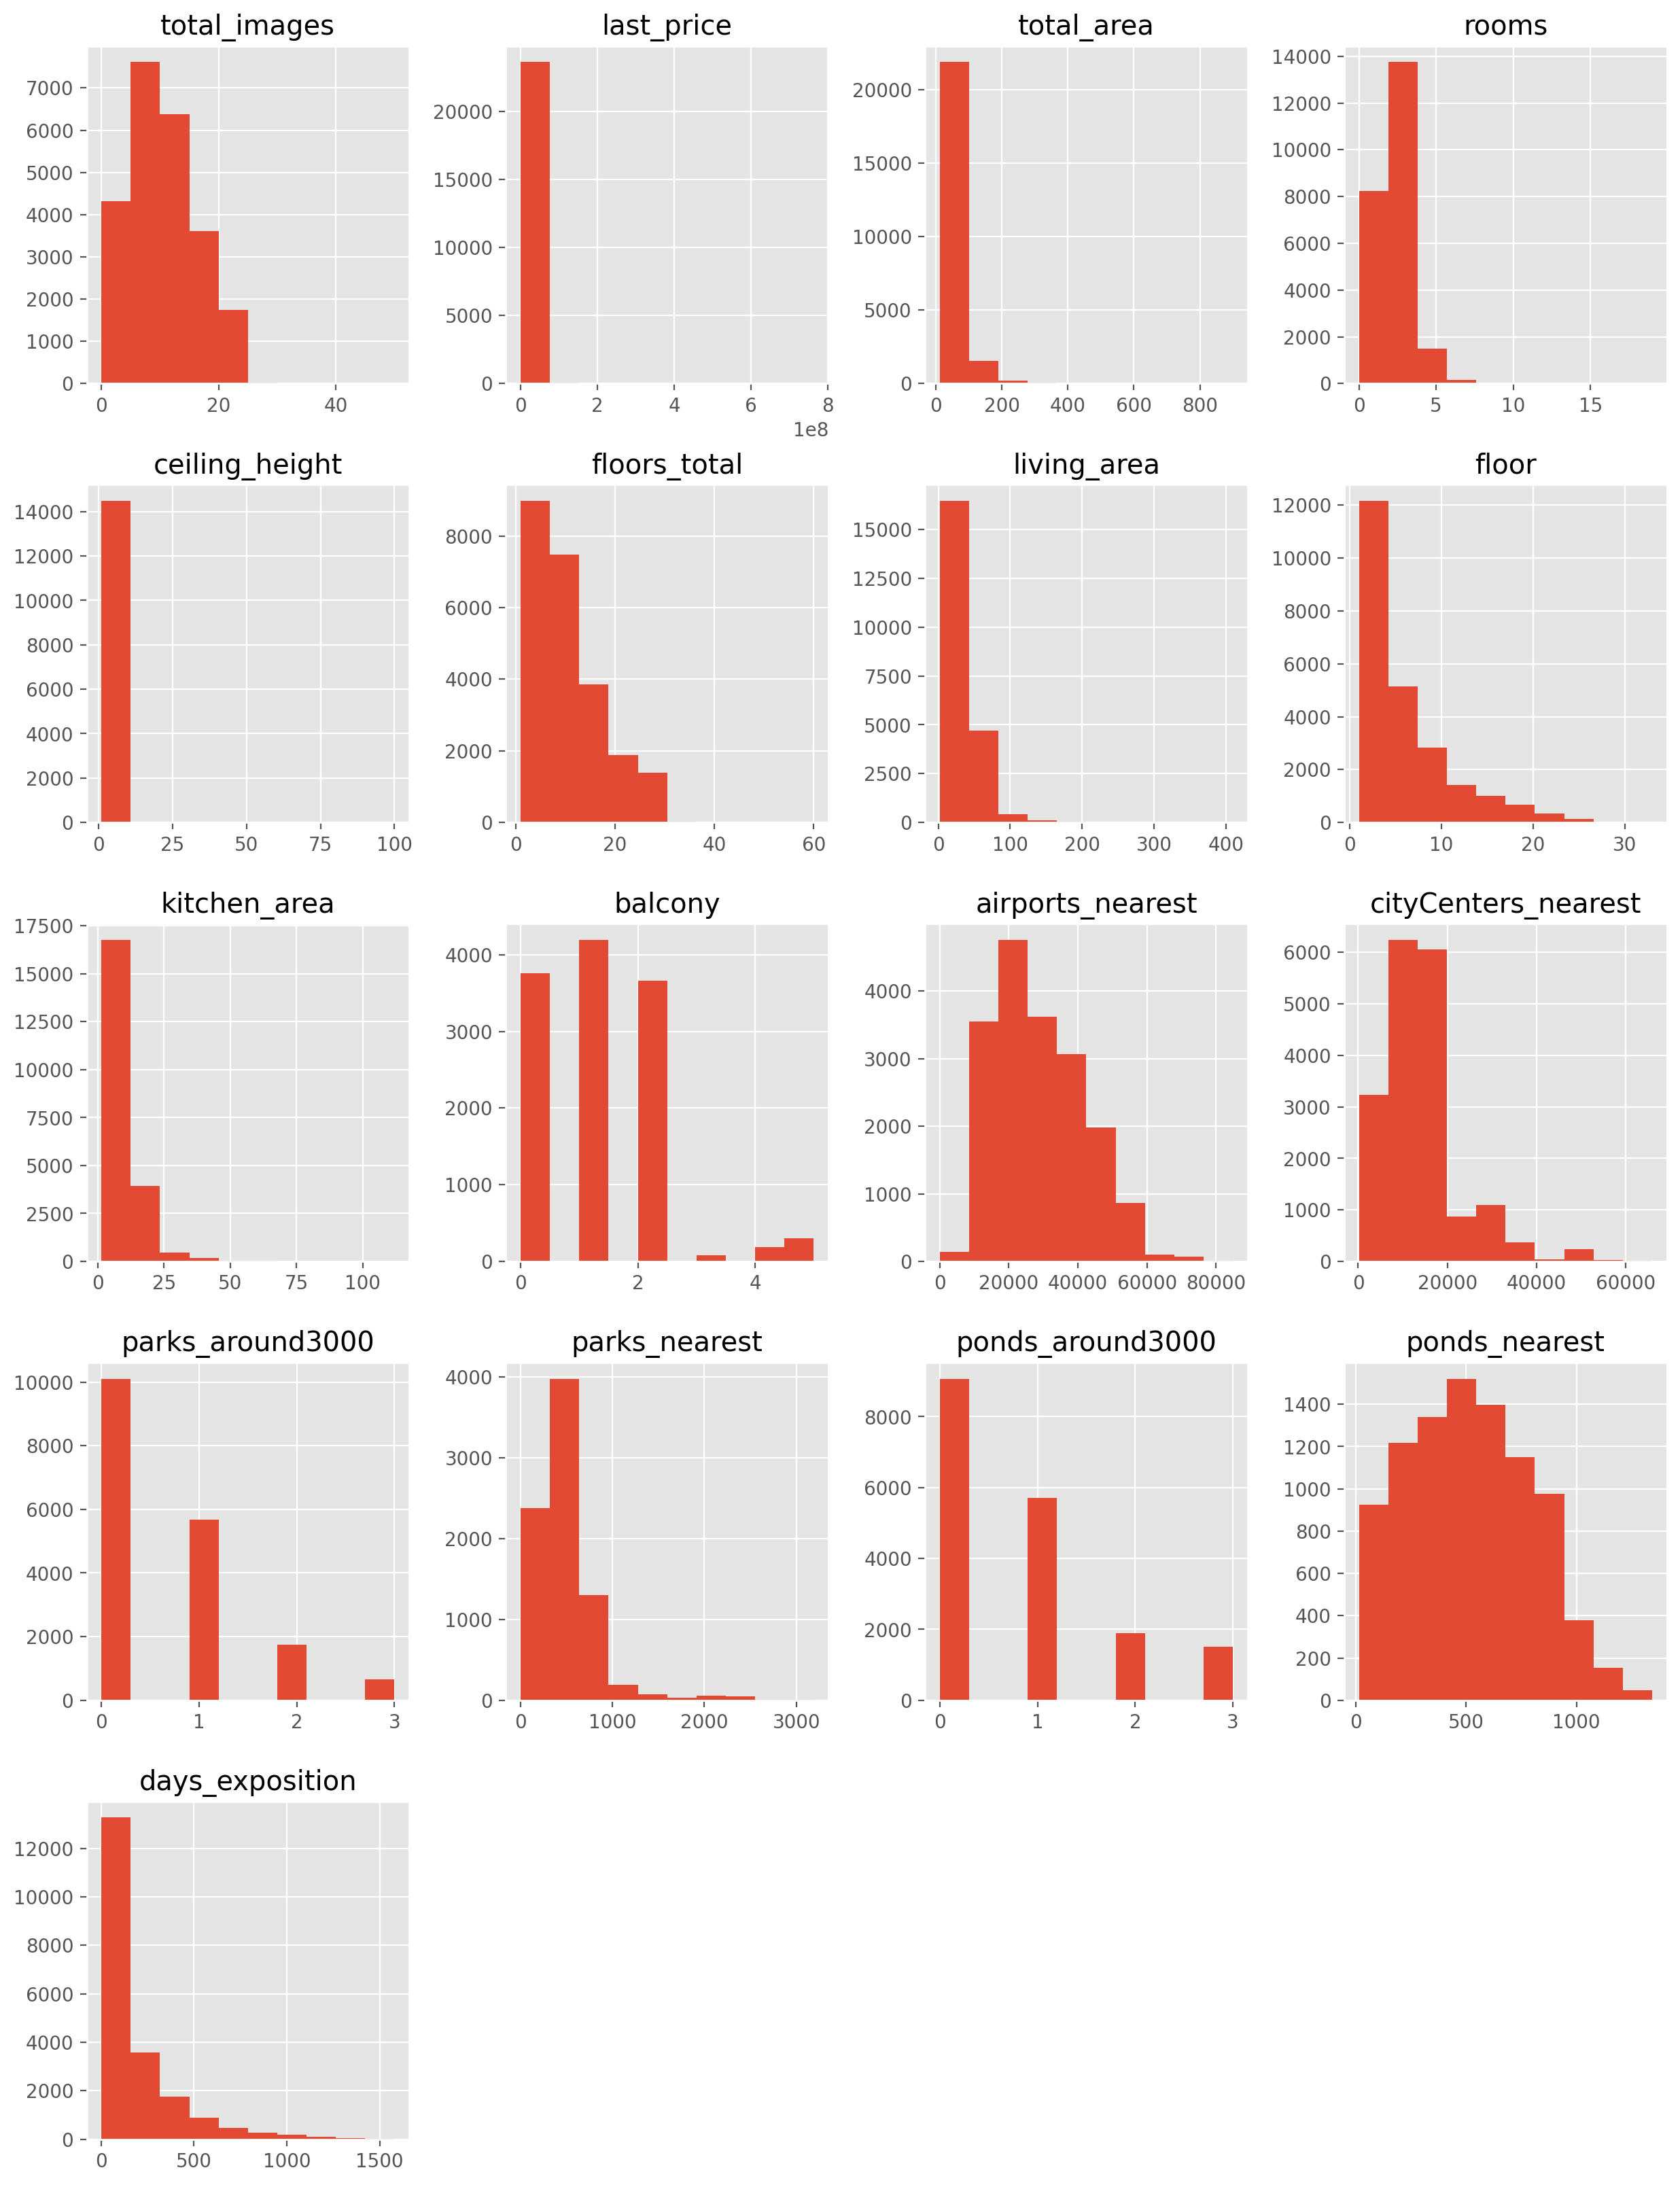

In [2]:
data.hist(figsize=(15, 20))
plt.show()

**Описание диаграмм**

* *total_images* - чаще всего загружают около 10 фото. Есть объявления совсем без фото, редко встречаются объявления с 20 и более фото
* *last_price* - абсолютное большинство значений расположено в пределе 100 млн., остальные значения практически сливаются с нулем. Очевидно встречаются аномально высокие значения
* *total_area* - большинство объектов имеют общую площадь до 100 кв.м., встречается относительно небольшое число объектов с площадью 100-200 кв.м, объекты более 200 кв.м. - редкость
* *rooms* - встречаются нулевые значения, большинство объектов расположено в диапазоне 1-3 комнаты. Есть значения более 10, на гистограмме явно не выражены, очевидно, таких объектов немного
* *ceiling_height* - абсолютное большинство значений расположено в диапазоне 1-5 метров, необходимо рассмотреть более детально значения ниже допустимой нормы. Также есть выбросы - слишком высокие значения
* *floors_total* - гистограмма выглядит нормально, нет нулевых значений, но нужно обратить внимание на выбивающиеся большие значения
* *living_area* - аналогично *total_area*. Отдельно необходимо уделить внимание минимальному значению 2 кв.м., очевидно выброс
* *floor* - гистограмма выглядит нормально
* *kitchen_area* - большинство объектов  имеют площадь кухни до 12.5 кв.м, гистограмма выглядит нормально. Встречаются большие значения - 50-100 кв.м., похоже на аномалии. Минимальный размер 1.3 кв.м тоже выглядит сомнительно, похоже на выбросы
* *balcony* - гистограмма выглядит нормально, больше 3 балконов скорее редкость, но не что-то невозможное
* *airports_nearest* - данные распределены нормально, за исключением минимального значения 0. Нужно посмотреть отдельно на такие объекты
* *cityCenters_nearest* - гистограмма выглядит нормально, большинство объектов на гистограмме расположены в радиусе 20 км от центра города
* *parks_around3000* - у большинства объектов нет парков в радиусе 3км. В целом выглядит нормально
* *parks_nearest* - у большинства объектов ближайшие парки находятся дальше 3км, также есть пиковое значение - около 800м.
* *ponds_around3000* - пиковое значение ~ 400, видимо, большинство объектов не находятся в близи водоемов. Гистограмма выглядит нормально
* *ponds_nearest* - около 1450 объектов находятся в 500 метрах от водоема
* *days_exposition* - большинство объявлений размещены в пределах 200 дней. Есть объявления, "висящие" более трех лет


## Предобработка данных

### Переименование столбцов

Приведем название столбца *'cityCenters_nearest'* к общему для всех виду:

In [3]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)
print('Названия столбцов:')
data.columns

Названия столбцов:


Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Работа с пропусками

Посмотрим на пропуски в каждом столбце:

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В большей части столбцов встречаются пропуски. Для столбцов '*balcony', 'is_apartment', 'parks_around3000' и 'ponds_around3000'* можем предложить логические замены:

In [5]:
# balcony - 48% не указало наличие балкона. Предположим, что балкона нет, заменим значения на 0:
data['balcony'] = data['balcony'].fillna(0.0)

# is_apartment - не указано 88% значений. Заменим на False:
data['is_apartment'] = data['is_apartment'].fillna(False)

# Пропуски в столбцах parks_around3000  и ponds_around3000 логичнее заменить на 0,
# вероятно, имеется в виду, что рядом нет парка или водоема:

data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Остальные пропуски рассмотрим более детально:

- *ceiling_height* - 39% пользователей не указали высоту потолков

Слишком большое число пропусков. Замена на средние или медианные значения в целом допустимы, но в дальнейшем могут исказить общее представление. Оставим пропуски в этом столбце

- *floors_total* - 0,3% не указали количество этажей в доме

Не зная общее число этажей в доме мы не сможем определить тип этажа для объекта - последний он в доме или нет? 
Для объектов на первом этаже можем заменить пропуски в 'floors_total' на 1:

In [6]:
# Функция, заменяющие пропуски в 'floors_total', если для объекта указан первый этаж
for f in data['floor'].unique():
    data.loc[(data['floor']==1) & (data['floors_total'].isna()), 'floors_total'] = 1
    
# вывод на экран уникальных значений 'floor' для строк с пропусками в 'floors_total':    
print('Количество строк с пропусками в "floors_total":', len(data.loc[data['floors_total'].isna()]))
print('Пропуски встречаются в объектах на', data.loc[data['floors_total'].isna()]['floor'].sort_values().unique(), 'этажах')

Количество строк с пропусками в "floors_total": 83
Пропуски встречаются в объектах на [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24] этажах


Осталось 83 пропущенных значения, для которых в дальнейшем мы не сможем определить тип этажа. Удалим эти строки.

In [7]:
data.dropna(subset=['floors_total'], inplace=True)

- *living_area* - 8% не указали жилую площадь
- *kitchen_area* - 9% не указали метраж студии 

Возможно, большинство таких пропусков характерны для объектов с типом "студия" и/или "свободная планировка"?

In [8]:
print('Число студий и объектов со свободной планировкой, для которых не указаны данные о жилой площади и/или площади кухни:',\
      len(data.loc[((data['kitchen_area'].isna()) | (data['living_area'].isna())) & ((data['open_plan']) | (data['studio']))]))

Число студий и объектов со свободной планировкой, для которых не указаны данные о жилой площади и/или площади кухни: 213


Да, у таких объектов действительно встречаются пропуски, но их всего 213. Можно заменить пропуски на средние или медианные значения, но возможно искажение дальнейших выводов. Оставим пропуски в  этих столбцах.

- *locality_name* - 0,02% не указали локацию. Т.к. в этих строках могут быть другие интересующие нас данные, заменим пропуски на 'Unknown'

In [9]:
data['locality_name'] = data['locality_name'].fillna('Unknown')

- *days_exposition* - больше 13% пропущенных значений. Объявления не были опубликованы или все еще не сняты с публикации? Оставим эти пропуски.

Остальные пропуски связаны с картографическими данными:
- *airports_nearest* - 23%        
- *city_centers_nearest* - 23%    
- *parks_nearest* -65%           
- *ponds_nearest* - 61%  

Можем предположить, что все эти локации (аэропорт, центр города, парк, пруд) находятся слишком далеко от объектов с пропущенными значениями. Посмотрим максимальные значения в каждом из этих столбцов:


In [10]:
print('Максимальная отдаленность аэропорта от объекта:', max(data['airports_nearest'])/1000, 'км')
print('Максимальная отдаленность центра города от объекта:', max(data['city_centers_nearest'])/1000, 'км')
print('Максимальная отдаленность парка от объекта:', max(data['parks_nearest'])/1000, 'км')
print('Максимальная отдаленность водоема от объекта:', max(data['ponds_nearest'])/1000, 'км')

Максимальная отдаленность аэропорта от объекта: 84.869 км
Максимальная отдаленность центра города от объекта: 65.968 км
Максимальная отдаленность парка от объекта: 3.19 км
Максимальная отдаленность водоема от объекта: 1.344 км


Видимо, для картографических данных есть некие лимиты - если до ближайшего аэропорта (парка, водоема, центра города) *более Х км*, то расстояние для таких объектов *не указывается*. Объекты с пропусками в этих значениях слишком отдалены от интересующих нас локаций и не будут участвовать в анализе зависимости цены от местоположения, оставим пропуски в этих столбцах

Снова проверим пропуски по всем столбцам:

In [11]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9121
floors_total                0
living_area              1872
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2234
balcony                     0
locality_name               0
airports_nearest         5532
city_centers_nearest     5509
parks_around3000            0
parks_nearest           15571
ponds_around3000            0
ponds_nearest           14554
days_exposition          3172
dtype: int64

**Общий вывод по пропускам**


Из документации  известно, что мы имеем два типа данных: одни заполняли сами пользователи, вторые данные - картографические. Логично предположить, что пропуски в первом типе данных возникли из-за того, что *пользователи не заполняли эти данные*. Стоит учесть и возможность *ошибок при выгрузке* - встречаются пропуски в столбце 'locality_name', вряд ли пользователь смог загрузить объявление без указания локации. Остались необработанными пропуски в столбцах 'ceiling_height', 'living_area' и 'kitchen_area' - замена средними или медианными значениями может *исказить выводы* при дальнейшем анализе.

Картографические пропуски (расстояние до ближайшего аэропорта/парка/водоема, до центра города) *связаны с лимитами* - если расстояние до локации выше определенного значения, то данные не указываются. 

### **Изменение типов данных в столбцах**

- *first_day_exposition* -  нужно изменить на тип datetime64, чтобы Pandas воспринимал эти значения как даты и мы могли проводить с ними операции 
- *last_price, balcony, floors_total, 'ponds_around3000' 'parks_around3000'*- целочисленные значения, лучше хранить их в этом формате для экономии памяти
- *'days_exposition'* - тоже столбец с целочисленными значениями, но прежде, чем изменить тип данных в этом столбце нужно все же избавиться от пропусков. Заменим пропуски на условный маркер 9999, при дальнейшей работе с данными из этого столбца 'снимем' этот маркер

In [12]:
# Изменение типа данных в столбце 'first_day_exposition':
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Изменение типов данных в столбцах 'last_price', 'balcony', 'floors_total':
data['last_price'] = data['last_price'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['ponds_around3000'] = data['floors_total'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)

# Замена пропусков в 'days_exposition' на 9999 и последующее изменение типа данных:

data['days_exposition'] = data['days_exposition'].fillna(9999)
data['days_exposition'] = data['days_exposition'].astype(int)
# Проверяем изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23616 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23616 non-null  int64         
 1   last_price            23616 non-null  int32         
 2   total_area            23616 non-null  float64       
 3   first_day_exposition  23616 non-null  datetime64[ns]
 4   rooms                 23616 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23616 non-null  int32         
 7   living_area           21744 non-null  float64       
 8   floor                 23616 non-null  int64         
 9   is_apartment          23616 non-null  bool          
 10  studio                23616 non-null  bool          
 11  open_plan             23616 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

### **Уникальные значения и дубликаты**

Проверим единственный столбец с типом 'object' - *locality_name*. Данные в него внесены пользователями, могут встречаться разные варианты написания одних и тех же населенных пунктов. Выведем на экран число уникальных значений и их список:

In [13]:
print('Всего уникальных названий:', len(data['locality_name'].unique()))
data['locality_name'].sort_values().unique()

Всего уникальных названий: 365


array(['Unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

Приведем все данные из столбца к *общему виду*: 
- сохраним все названия в нижнем регистре
- все 'ё' заменим на 'е'
- 'городской поселок' и 'поселок городсокого типа' - одно и то же, оставим везде более привычный вариант 'поселок городского типа'
- аналогично 'садоводческое некоммерческое товарищество' заменим на 'садовое товарищество'

In [14]:
# перевод всех значений к нижнему регистру: 
data['locality_name'] = data['locality_name'].str.lower()
# замена 'ё' на 'е':
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
# замена 'городской поселок' на 'поселок городского типа' и 
#'садоводческое некоммерческое товарищество' на 'садовое товарищество':
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество','садовое товарищество')

print('Всего уникальных названий:', len(data['locality_name'].unique()))
data['locality_name'].sort_values().unique()

Всего уникальных названий: 324


array(['unknown', 'бокситогорск', 'волосово', 'волхов', 'всеволожск',
       'выборг', 'высоцк', 'гатчина', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка',
       'деревня горбунки', 'деревня гостилицы', 'деревня заклинье',
       'деревня заневка', 'деревня зимитицы', 'деревня извара',
       'деревня иссад', 'деревня калитино', 'деревня кальтино',
       'деревня камышовка', 'деревня каськово', 'деревня келози',
       'деревня кипень', 'деревня кисельня', 'деревня колтуши',
       'деревня коркино', 'деревня котлы', 'деревня кривко',
       'деревня кудрово', 'деревня кузьмолово', 'деревня курковицы',


Сократили число уникальных названий до 324. Есть вероятность, что одни и те же населенные пункты могут быть указаны и как 'поселок', и как 'поселок городского типа'. Посмотрим списки с такими типами населенных пунктов:

In [15]:
# создаем пустые списки, poselki - для поселков,  pgt для поселков городского типа:
poselki = []
pgt = []

# цикл, добавляющий поселки и поселки городского типа в соответствующие списки:
for name in data['locality_name'].unique():
    if 'поселок' in name and 'городского типа' not in name:
        poselki.append(name)
    elif 'городского типа' in name:
        pgt.append(name)
# вывод отсортированных списков на экран:        
poselki.sort()
pgt.sort()
print(poselki)
print('------')
print(pgt)

['коттеджный поселок кивеннапа север', 'коттеджный поселок лесное', 'коттеджный поселок счастье', 'поселок александровская', 'поселок алексеевка', 'поселок аннино', 'поселок барышево', 'поселок белоостров', 'поселок бугры', 'поселок возрождение', 'поселок войсковицы', 'поселок войскорово', 'поселок володарское', 'поселок высокоключевой', 'поселок гаврилово', 'поселок гарболово', 'поселок гладкое', 'поселок глажево', 'поселок глебычево', 'поселок гончарово', 'поселок громово', 'поселок дзержинского', 'поселок дружноселье', 'поселок елизаветино', 'поселок жилгородок', 'поселок жилпоселок', 'поселок житково', 'поселок заводской', 'поселок запорожское', 'поселок зимитицы', 'поселок ильичево', 'поселок калитино', 'поселок каложицы', 'поселок кикерино', 'поселок кингисеппский', 'поселок кирпичное', 'поселок кобралово', 'поселок кобринское', 'поселок коммунары', 'поселок коробицыно', 'поселок котельский', 'поселок красная долина', 'поселок красносельское', 'поселок левашово', 'поселок ленинск

В обоих списках встречается "*Рябово*". По данным Яндекс.Карт - это разные населенные пункты в разных районах Ленобласти. Других дубликатов нет.

Проверим наличие явных дубликатов:

In [16]:
print('Число строк-дубликатов:', data.duplicated().sum())

Число строк-дубликатов: 0


**Вывод по уникальным значениям и дубликатам**

В данных встречались дубликаты в столбце с названиями локаций. Столбец обработан, все значения приведены к нижнему регистру, 'ё' заменены на 'е', дублирующиеся типы населенных пунктов приведены к одному виду. *Дублирующихся строк нет*.

### Редкие и аномальные значения. Выбросы

Продолжим изучать данные: выявим редкие и аномальные значения. Снова вызовем описание таблицы и рассмотрим каждый столбец отдельно:

In [17]:
data.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  23616.000000  2.361600e+04  23616.000000  23616.000000    14495.000000   
mean       9.873518  6.540071e+06     60.338373      2.071096        2.771495   
std        5.681896  1.090112e+07     35.648245      1.078373        1.261445   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.799000e+06     69.800000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23616.000000  21744.000000  23616.000000  21382.000000  23616.000000   
mean      10.672595     34.462151      5.876694     10.564128      0.592988   
std        6.597655     22.037122      4.873539      5.904316      0.960269   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     18.600000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.100000      0.000000   
75%       16.000000     42.300000      8.000000     12.000000      1.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   

       airports_nearest  city_centers_nearest  parks_around3000  \
count      18084.000000          18107.000000       23616.00000   
mean       28789.278202          14187.166345           0.46875   
std        12627.689733           8615.405626           0.74846   
min            0.000000            181.000000           0.00000   
25%        18575.750000           9234.000000           0.00000   
50%        26726.000000          13094.000000           0.00000   
75%        37242.500000          16293.000000           1.00000   
max        84869.000000          65968.000000           3.00000   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  
count    8045.000000      23616.000000    9062.000000     23616.000000  
mean      490.554630         10.672595     518.193556      1499.618733  
std       341.336698          6.597655     277.876284      3354.192351  
min         1.000000          1.000000      13.000000         1.000000  
25%       288.000000          5.000000     294.000000        45.000000  
50%       455.000000          9.000000     503.000000       124.000000  
75%       612.000000         16.000000     730.000000       390.000000  
max      3190.000000         60.000000    1344.000000      9999.000000

- **total_images** - есть объявления без фото, есть объявления, где загружено 50 фото. Такое большое число фото скорее аномалия, но в целом допустимо

- **last_price** - разброс значений от 12.190 до 763.000.000. Это самый важный столбец для анализа. Судя по размаху, в данных встречаются выбросы и аномалии.

Посмотрим на диаграмму размаха для этого столбца:

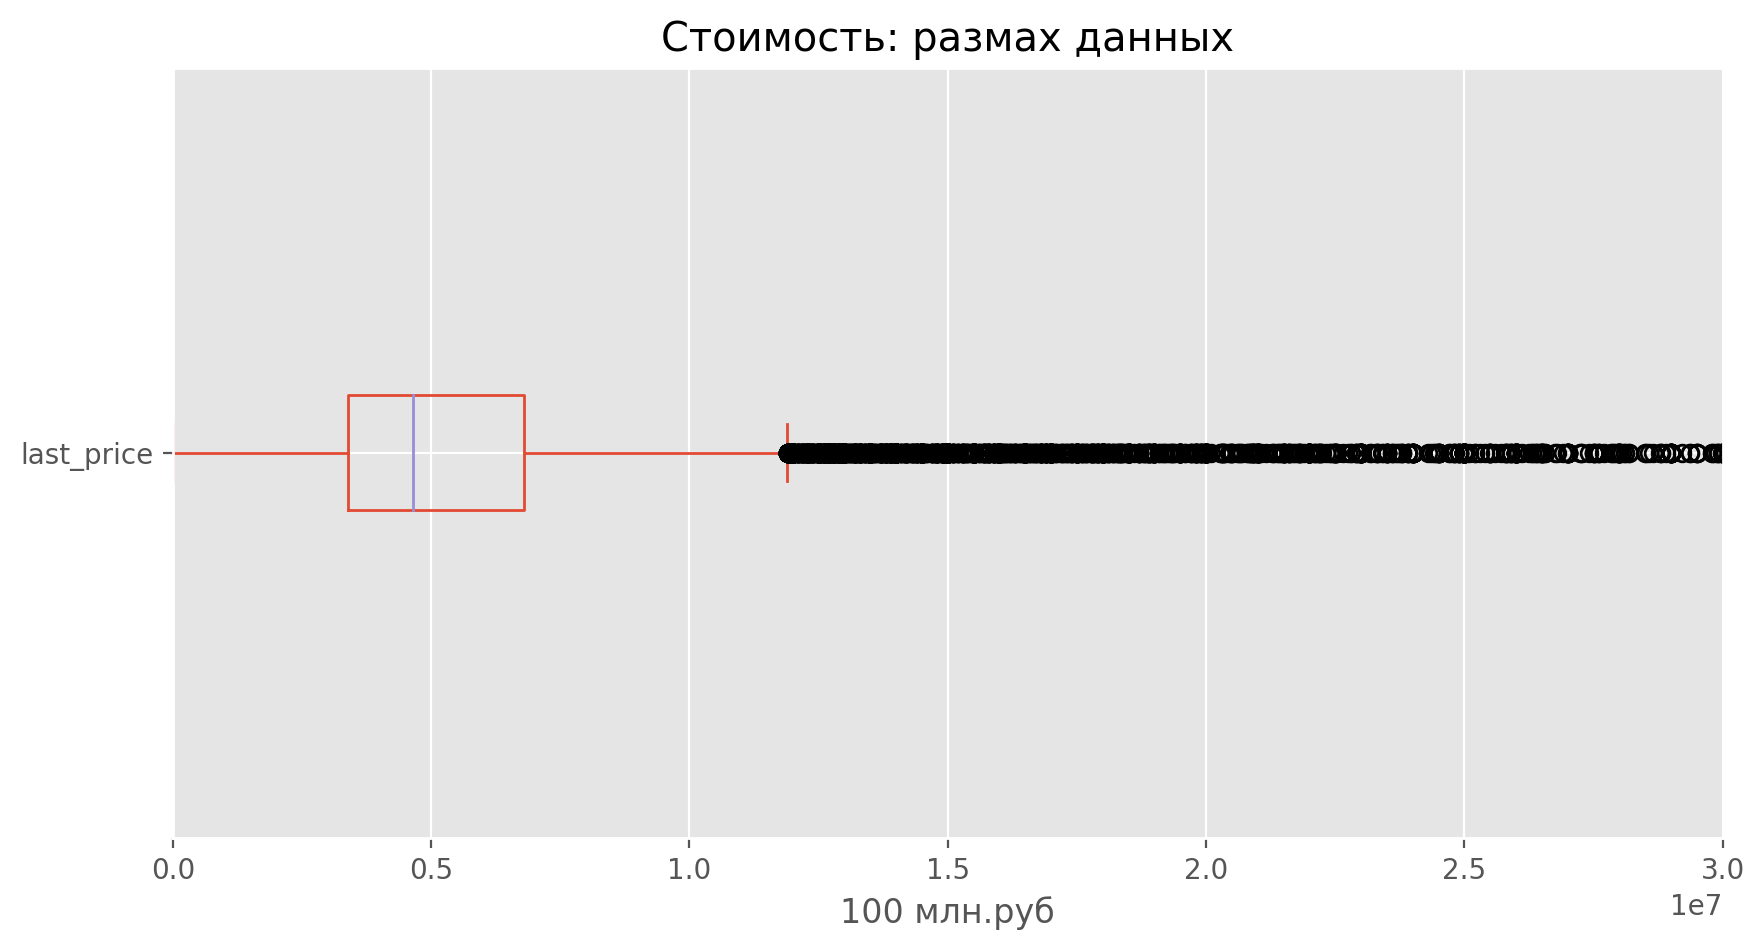

In [18]:
data['last_price'].T.plot(kind='box', vert=False, figsize=(10,5)) 
plt.xlim(0,30000000)
plt.title('Стоимость: размах данных')
plt.xlabel('100 млн.руб')
plt.ylabel('')
plt.show()

Имеем большое число значений, *лежащих за границами "ящика с усами"* - данных настолько много, что точки сливаются в единую жирную линию. На самом деле, это неудивительно, мы действительно имеем в наборе данных много объектов с высокой стоимостью.

Из диаграммы видно, что объекты дороже 100 млн.руб встречаются реже, *удалим серхдорогие объекты* и посмотрим на обновленную диаграмму размаха:

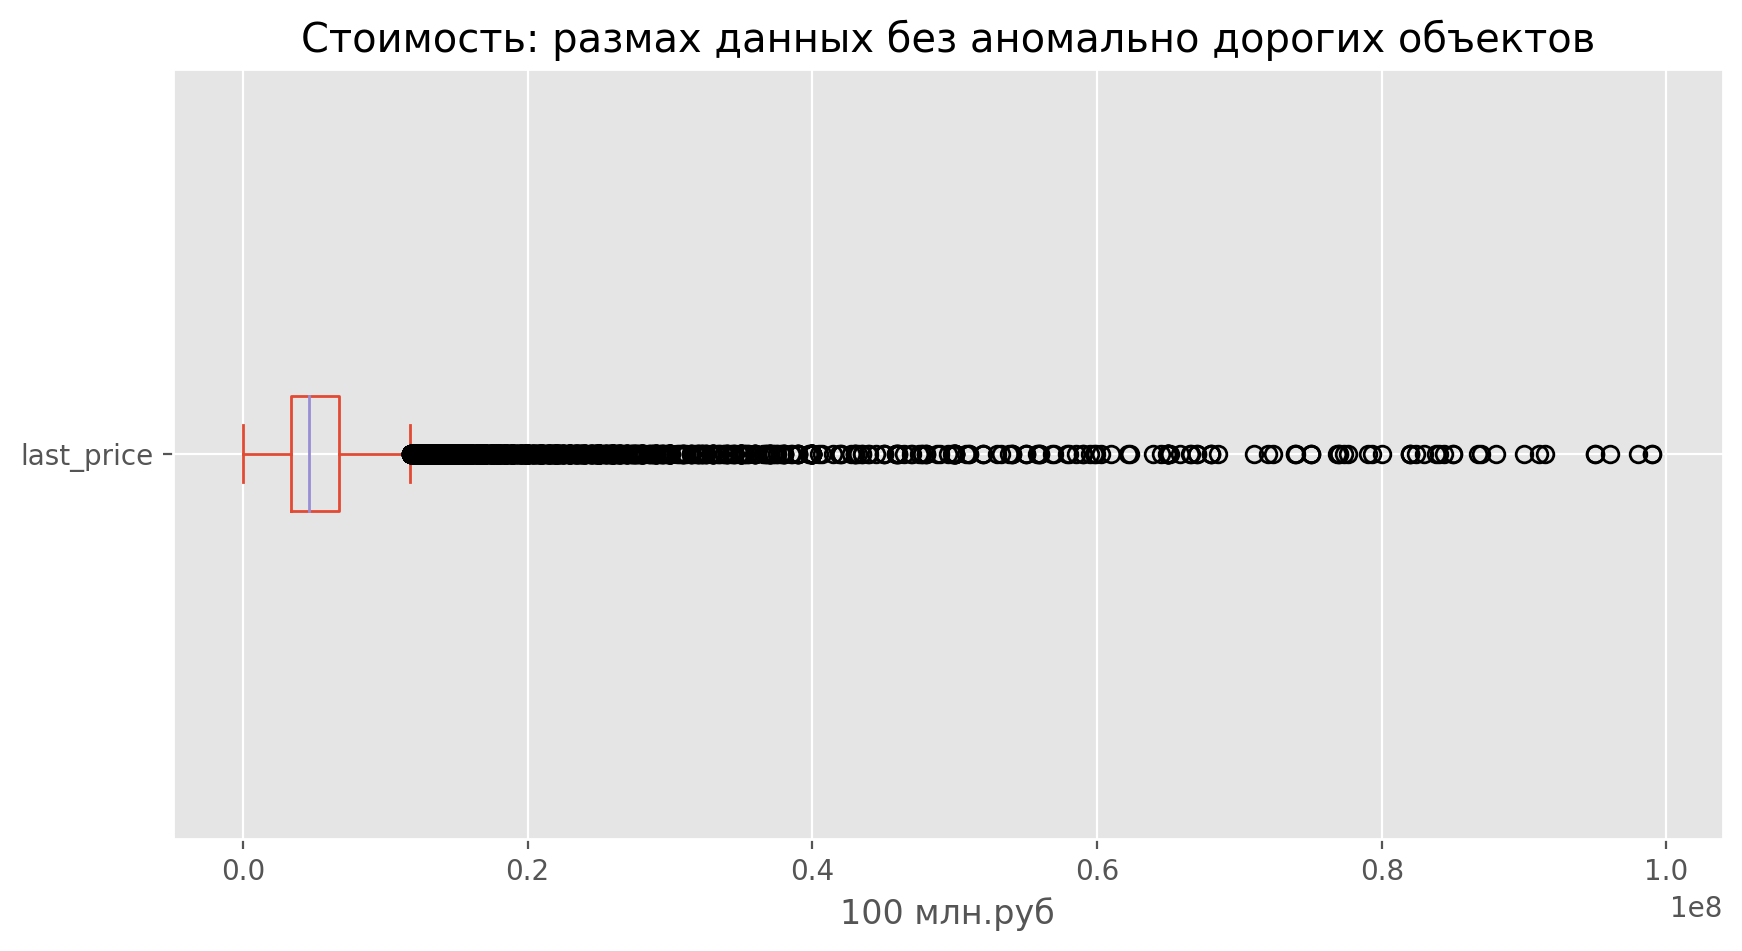

In [19]:
data.drop(index=data.query('last_price > 100_000_000').index,inplace=True)
data['last_price'].T.plot(kind='box', vert=False, figsize=(10,5)) 
plt.title('Стоимость: размах данных без аномально дорогих объектов')
plt.xlabel('100 млн.руб')
plt.ylabel('')
plt.show()

В обновленном наборе данных по-прежнему много значений за пределами третьего квартиля, видим, что начиная со стоимости ~75 млн.руб точки становятся различимыми, соответсвенно, таких значений намного меньше относительно остальных. *Слишком дорогие объекты в дальнейшем будут 'перетягивать' на себя средние значения и могу исказить проценты корреляции.* Как много таких значений в наборе данных?

In [20]:
print('Объектов дороже 75 млн.руб.:', len(data.query('last_price > 75_000_000')))

Объектов дороже 75 млн.руб.: 30


Удалим эти 30 объектов, чтобы при дальнейшем анализе не допустить некорректных выводов

In [21]:
data.drop(index=data.query('last_price > 75_000_000').index,inplace=True)
print('Максимальная стоимость объекта:', data['last_price'].max(), 'руб')

Максимальная стоимость объекта: 75000000 руб


Вспомним про *минимальное значение в столбце - 12 190*. На диаграмме размаха мы не видим этой точки. т.к. она входит в 'левый ус', т.е. считается нормальной, однако логически понимаем, что такая стоимость - аномалия. Много ли у нас таких объектов? Увидеть их мы сможем построим *гистограмму* для объектов стоимостью до значения Q1:

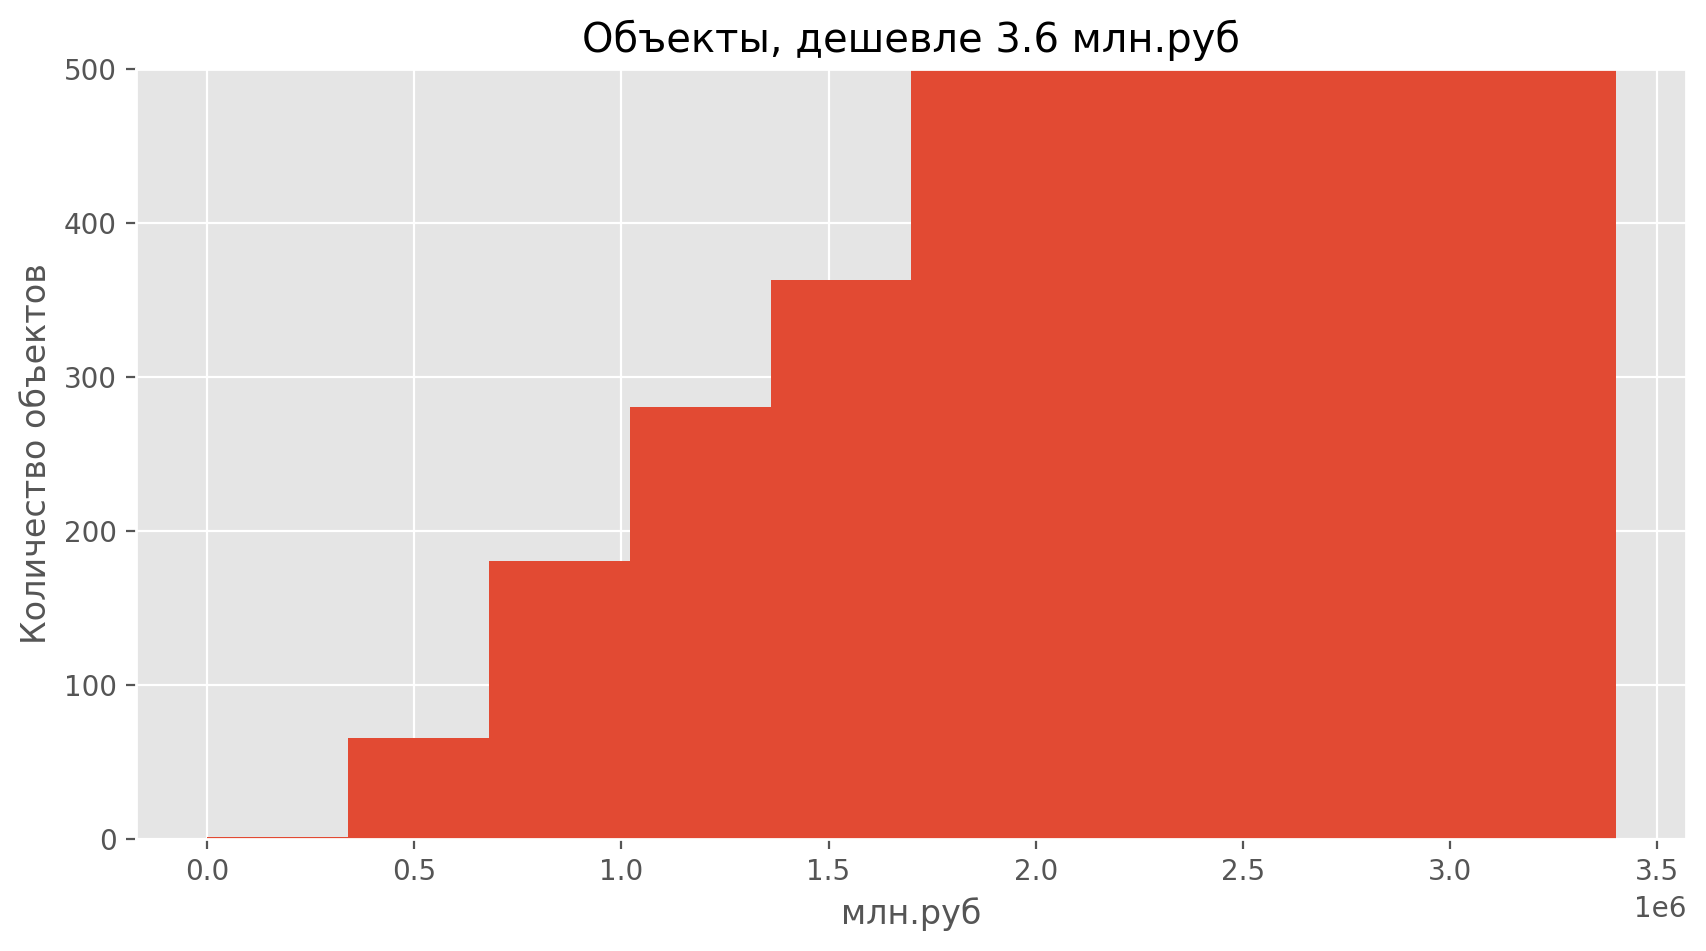

In [22]:
data.plot(
    kind='hist',
    y='last_price',
    range=(0, 3.400000e+06),
    ylim=(0,500),
    grid=True,
    figsize=(10,5),
    legend=False)
plt.xlabel('млн.руб')
plt.ylabel('Количество объектов')
plt.title('Объекты, дешевле 3.6 млн.руб')

plt.show()

In [23]:
print('Минимальная стоимость объекта: Топ-10')
data['last_price'].sort_values().head(10)

Минимальная стоимость объекта: Топ-10


8793      12190
17456    430000
14911    430000
16274    440000
17676    450000
16219    450000
5698     450000
9581     450000
18867    470000
21912    470000
Name: last_price, dtype: int32

Встречается только один объект стоимостью < 430.000, ограничим данные этим минимальным значением.

In [24]:
data.drop(index=data.query('last_price < 400_000').index,inplace=True)
print('Минимальная стоимость объекта:', data['last_price'].min(), 'руб')

Минимальная стоимость объекта: 430000 руб


- **total_area** - минимальное значение столбца 12 кв.м., что допустимо, но максимальное значение 631 кв.м. выглядит странно. Посмотрим на гистограмму:

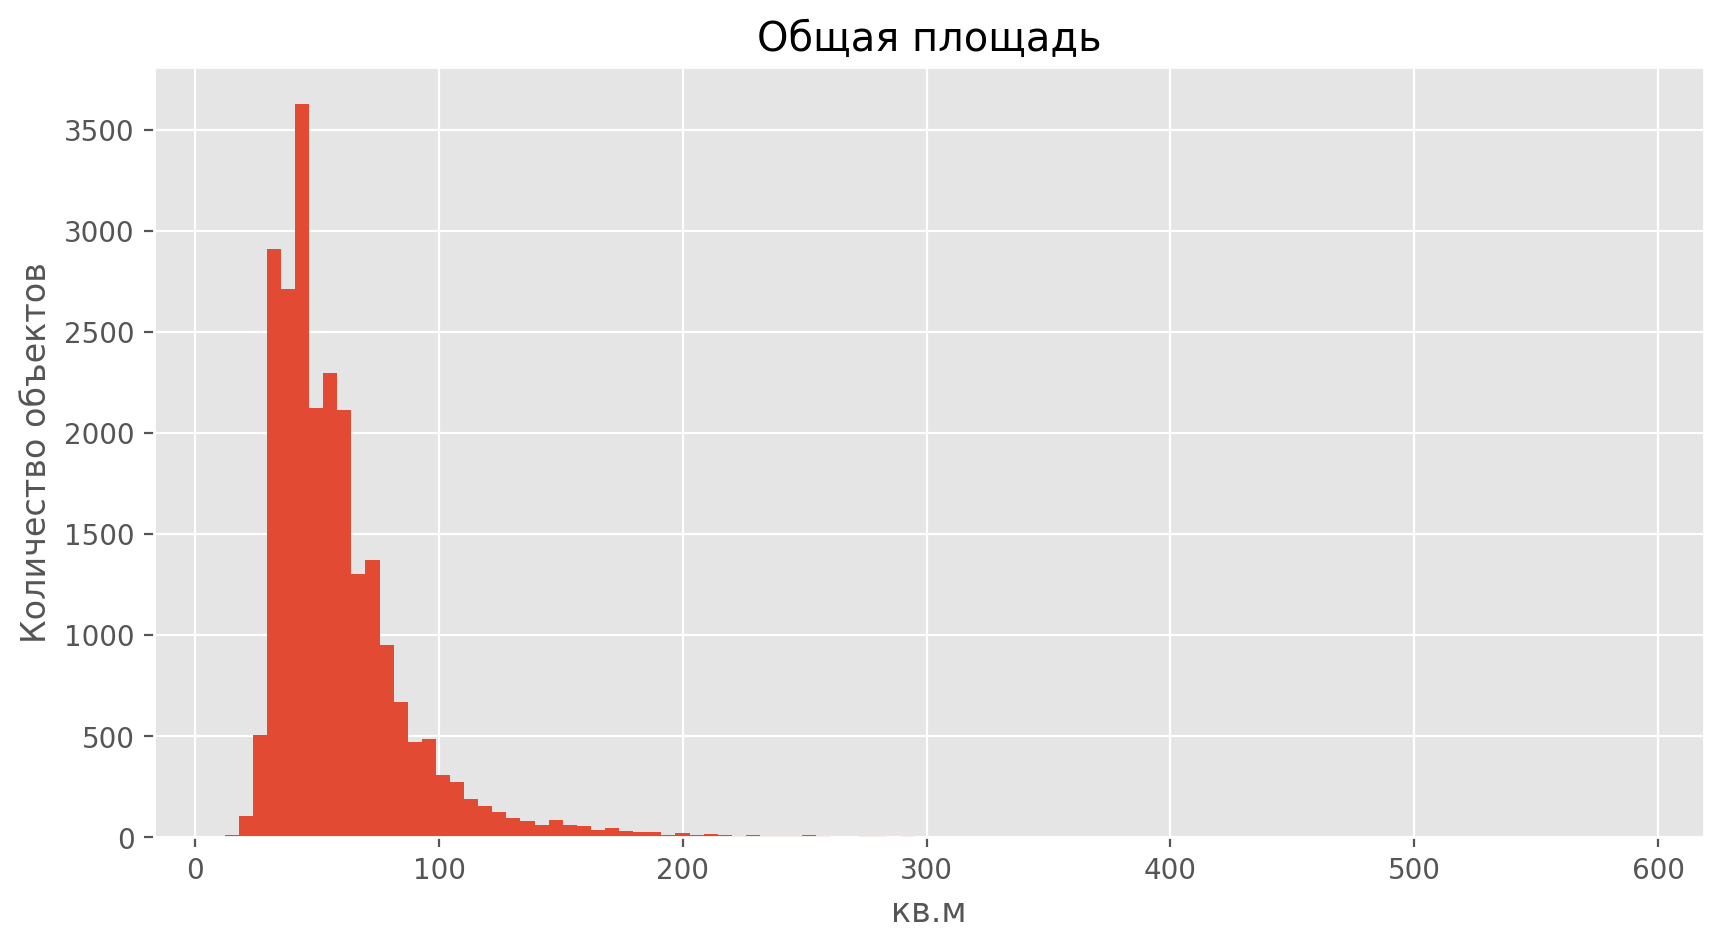

In [25]:
data.hist('total_area', bins=100, figsize=(10,5))
plt.xlabel('кв.м')
plt.ylabel('Количество объектов')
plt.title('Общая площадь')
plt.show()

Квартиры площадью *более 200 кв.м*. встречаются заметно *реже*, значения практически сливаются с нулем, посмотрим на них прицельно:

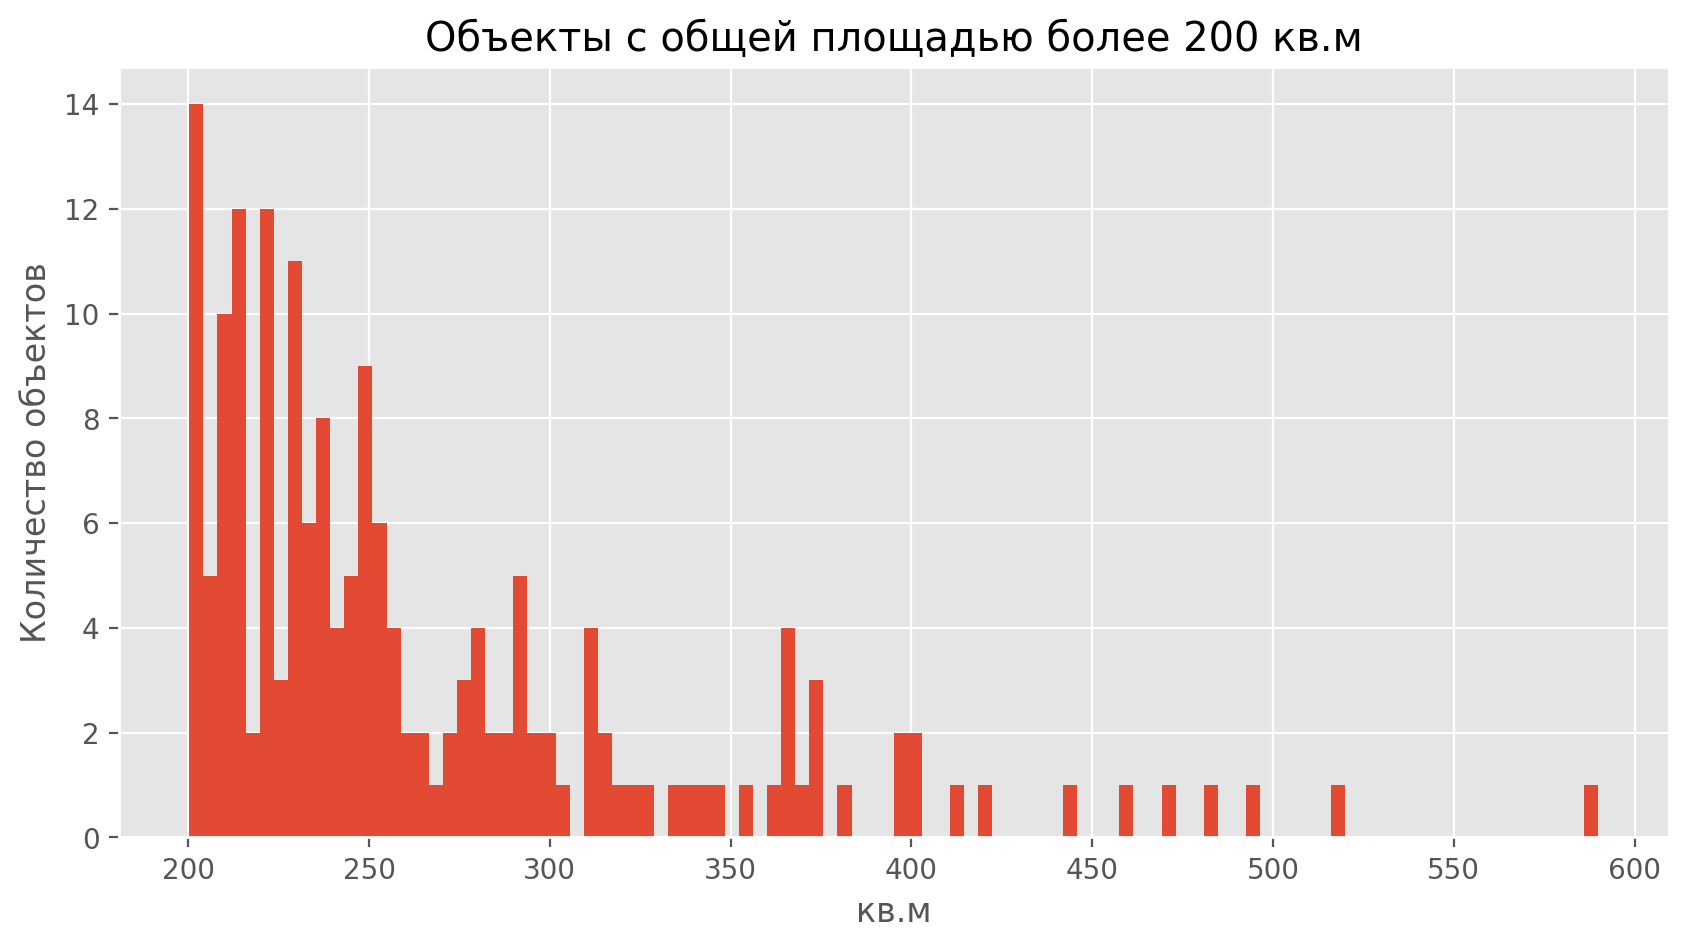

Число объектов с общей площадью более 200 кв.м: 176
Максимальная общая площадь: 590.0 кв.м


In [26]:
data.query('total_area > 200').hist('total_area', bins=100, figsize=(10,5))   
plt.xlabel('кв.м')
plt.ylabel('Количество объектов')
plt.title('Объекты с общей площадью более 200 кв.м')
plt.show()
print('Число объектов с общей площадью более 200 кв.м:', len(data.query('total_area > 200')))
print('Максимальная общая площадь:', data['total_area'].max(), 'кв.м')

Объекты с площадью более 300 кв.м встречаются еще реже, ограничимся *максимальным значением в 300 кв.м* и удалим превышающие это значение объекты:

In [27]:
data.drop(index=data.query('total_area > 300').index,inplace=True)
print('Максимальная общая площадь:', data['total_area'].max(), 'кв.м')

Максимальная общая площадь: 300.0 кв.м


- **rooms** - имеет нулевые значения. Предположим, отсутствие комнат характерно для студий или объектов со свободной планировкой. Также подозрительно выглядит максимальное значение - 19 комнат. Проверим, какая общая площадь и стоимость у объектов c десятью комнатами и более:

In [28]:
print('Всего объектов без комнат:', len(data.query('rooms == 0')))
print('Студии или объекты со свободной планировкой без комнат:', len(data.query('rooms == 0 and (studio or open_plan)')))
print()
print('Максимальное число комнат:', data['rooms'].max())
print('Медианная площадь объектов с числом комнат 10 и более:', data.query('rooms > 10')['total_area'].median(), 'кв.м')
print('Медианная стоимость объектов с числом комнат больше 10:', data.query('rooms > 10')['last_price'].median(), 'руб')

Всего объектов без комнат: 193
Студии или объекты со свободной планировкой без комнат: 193

Максимальное число комнат: 16
Медианная площадь объектов с числом комнат 10 и более: 219.75 кв.м
Медианная стоимость объектов с числом комнат больше 10: 28579500.0 руб


Гипотеза подтвердилась. **Нулевые значения характерны только для студий или объектов со свободной планировкой**. Большое число комнат характерно для объектов с достаточно большой общей площадью и высокой стоимостью, что также выглядит логично. Удалив ранее сверхдорогие объекты снизили максимальное число комнат до 16

- **ceiling_height** -  очевидно содержит выбросы и аномалии: минимальное значение - 1 метр, максимальное - 100. По нормам СНиП, *минимальная допустимая* высота потолка - 2,5 м. Удалим строки со значениями ниже установленной нормы:

In [29]:
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)

Потолок выше 4.5 м скорее *аномалия*. Рассмотрим объекты с потолками выше 4.5 метров

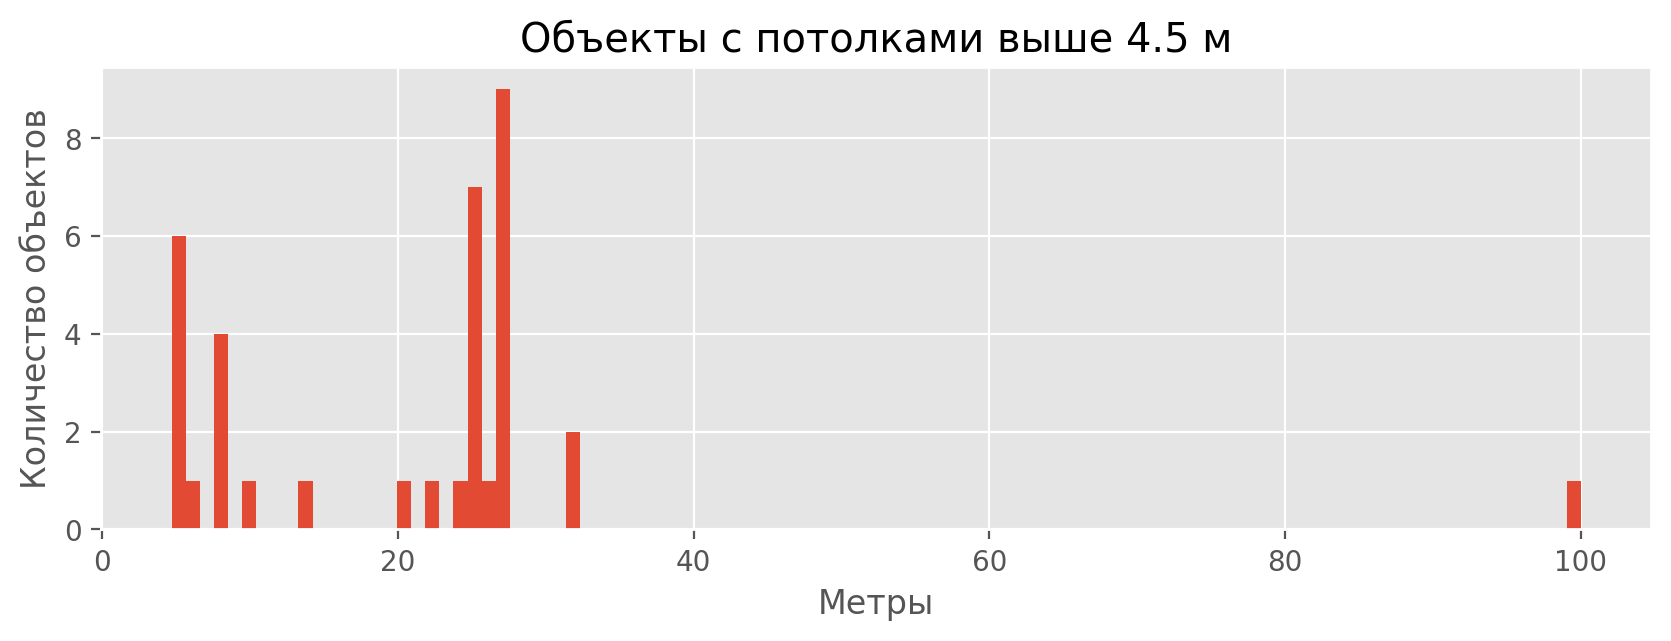

In [30]:
data.query('ceiling_height > 4.5').hist('ceiling_height', bins=100, figsize=(10,3))
plt.xlabel('Метры')
plt.ylabel('Количество объектов')
plt.title('Объекты с потолками выше 4.5 м')
plt.show()

Высоту от 4.5 до 25 метров считаем выбросами: 4.5-5м - аномально высокий потолок, 5-25м - скорее ошибка в заполнении данных. Потолки выше 40м тоже следует удалить. А вот значения 25-40 метров уже более интересны - очевидно, имелось в виду 2.5-4 метра, заменим эти значения. 

In [31]:
# удаление строк со значениями потолка от 4.5 до 25 и более 40:
data.drop(index=data.query('4.5 < ceiling_height < 25 or ceiling_height > 40').index,inplace=True)

# цикл, заменяющий высоту потолка 25-40 на 2.5-4 соответственно:
for height in data['ceiling_height'].unique():
    if 25<=height<=50:  
        data.loc[data['ceiling_height']==height, 'ceiling_height'] = height/10
print('Минимальное значение высоты потолка:', data['ceiling_height'].min())
print('Максимальное значение высоты потолка:', data['ceiling_height'].max())


Минимальное значение высоты потолка: 2.5
Максимальное значение высоты потолка: 4.5


* **floors_total** - нулевых значений нет, минимальное значение: 1 этаж, что допустимо, смущает максимальное значение 60. На сегодняшний день известно, что самое многоэтажное многоквартирное здание в Ленобласти - 37 этажей. Удалим выбросы, превышающие это значение

In [32]:
data.drop(index=data.query('floors_total>37').index,inplace=True)
print('Максимальный этаж здания:', data['floors_total'].max())

Максимальный этаж здания: 36


* **living_area** - очевидно содержит выбросы - недопустимое минимальное значение 2 кв.м. Снова обратимся к нормам СНиП: минимальный размер жилой площади - 9 кв.м. Отбросим неподходящие значения:

In [33]:
data.drop(index=data.query('living_area<9').index,inplace=True)
print('Минимальная жилая площадь:', data['living_area'].min())

Минимальная жилая площадь: 9.0


Прицельно посмотрим на объекты с жилой площадью более 100 кв.м:

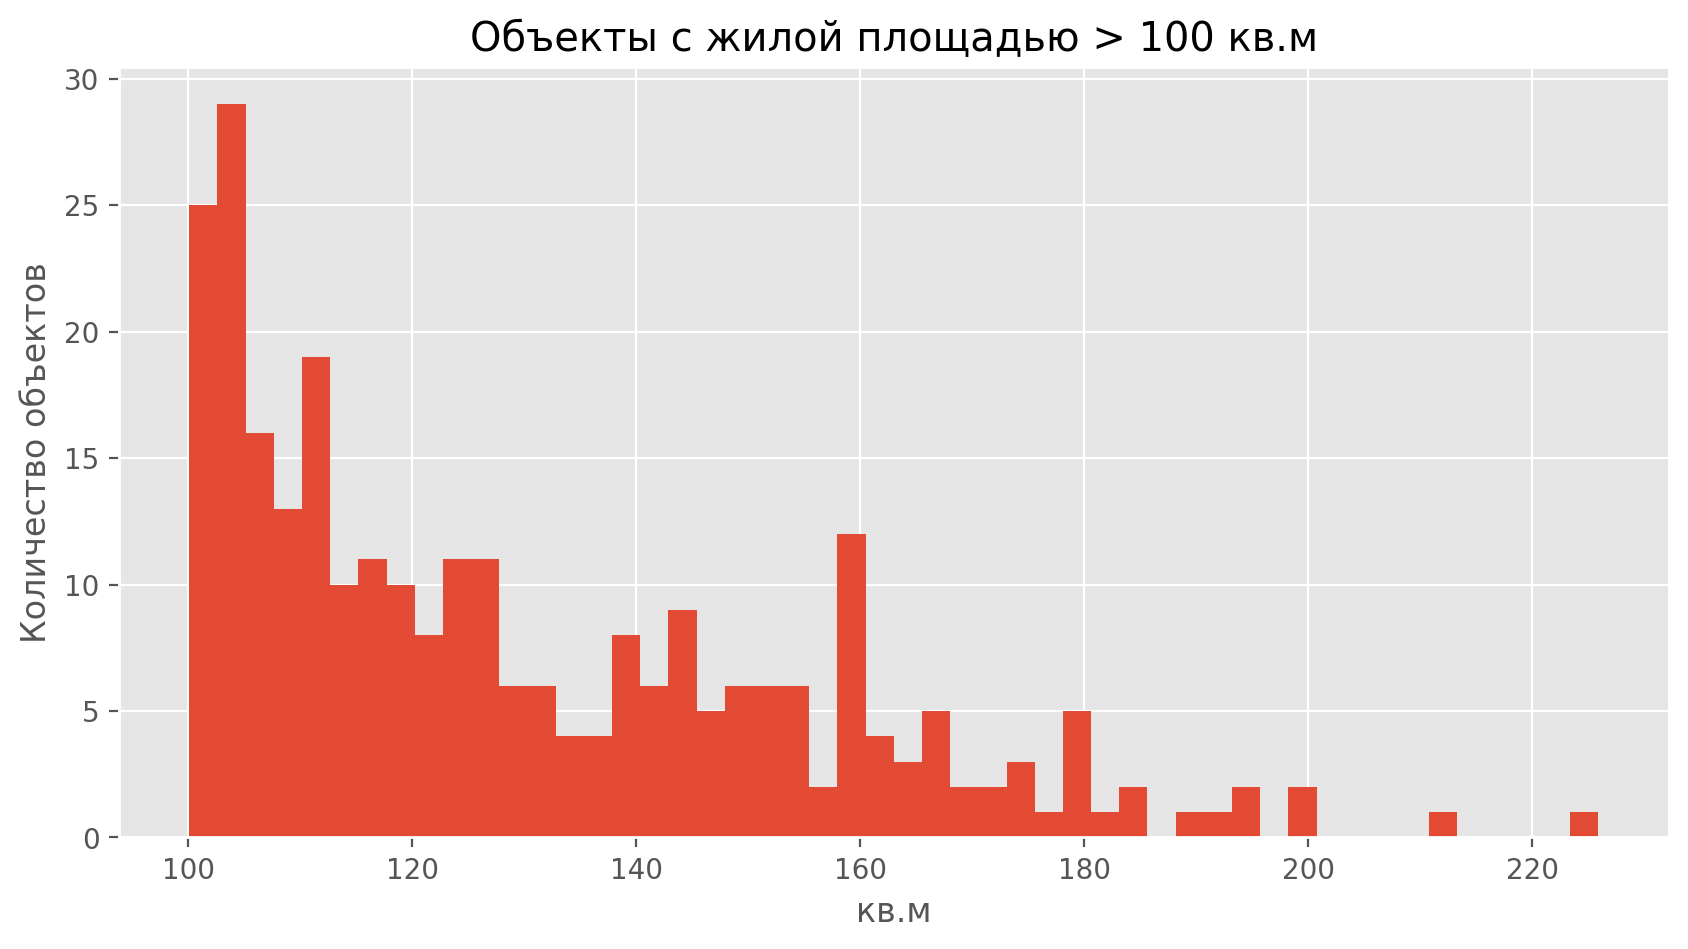

Максимальная жилая площадь: 225.9


In [34]:
data.query('living_area>100').hist('living_area', bins=50, figsize=(10,5))
plt.xlabel('кв.м')
plt.ylabel('Количество объектов')
plt.title('Объекты с жилой площадью > 100 кв.м')
plt.show()
print('Максимальная жилая площадь:', data['living_area'].max())

Ранее мы допустили максимальную общую площадь в 300 кв.м. Максимальная жилая площадь теперь составляет 225.9 кв.м., что допустимо

* **kitchen_area** - площадь кухни так же содержит экстримально низкие значения. Удалим объекты с кухнями менее 3 кв.м

In [35]:
data.drop(index=data.query('kitchen_area<3').index,inplace=True)
print('Минимальная  площадь кухни:', data['kitchen_area'].min())

Минимальная  площадь кухни: 3.0


Теперь прицельно посмотрим на кухни больше 20 кв.м.:

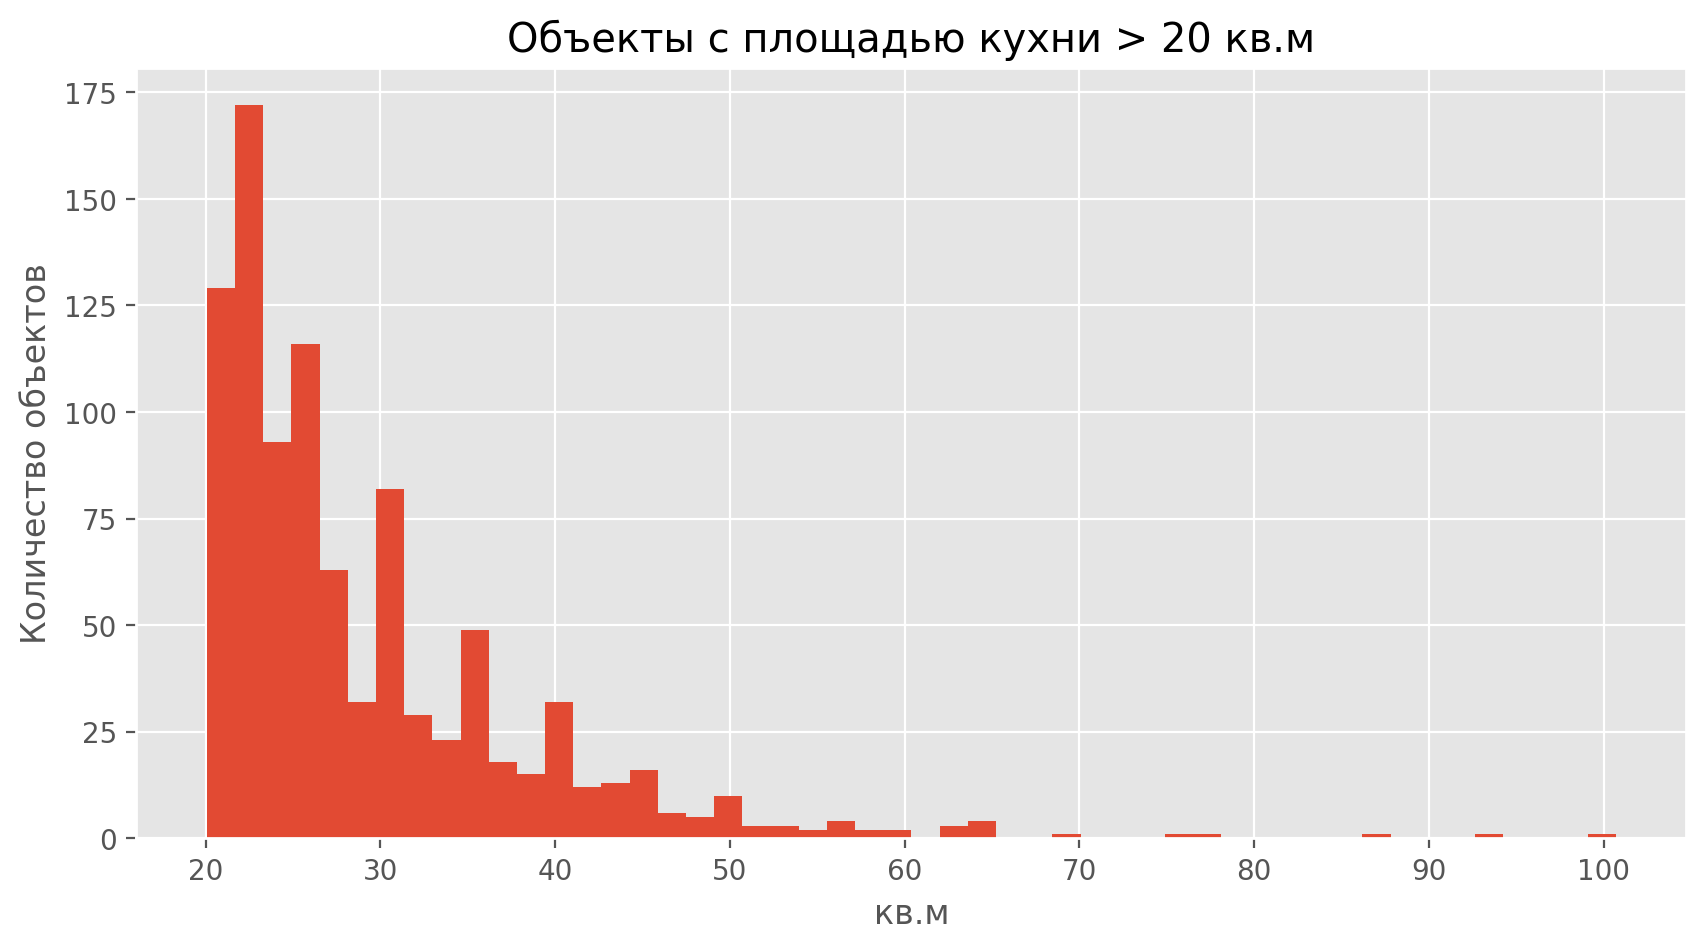

In [36]:
data.query('kitchen_area > 20').hist('kitchen_area', bins=50, figsize=(10,5))
plt.xlabel('кв.м')
plt.ylabel('Количество объектов')
plt.title('Объекты с площадью кухни > 20 кв.м')
plt.show()

Удалим малочисленные максимальные значения - кухни, площадью более 60 кв.м:

In [37]:
data.drop(index=data.query('kitchen_area >60').index,inplace=True)
print('Максимальная  площадь кухни:', data['kitchen_area'].max(), 'кв.м')

Максимальная  площадь кухни: 60.0 кв.м


* **balcony** - значения от 0 до 5. Построим на гистограмму:

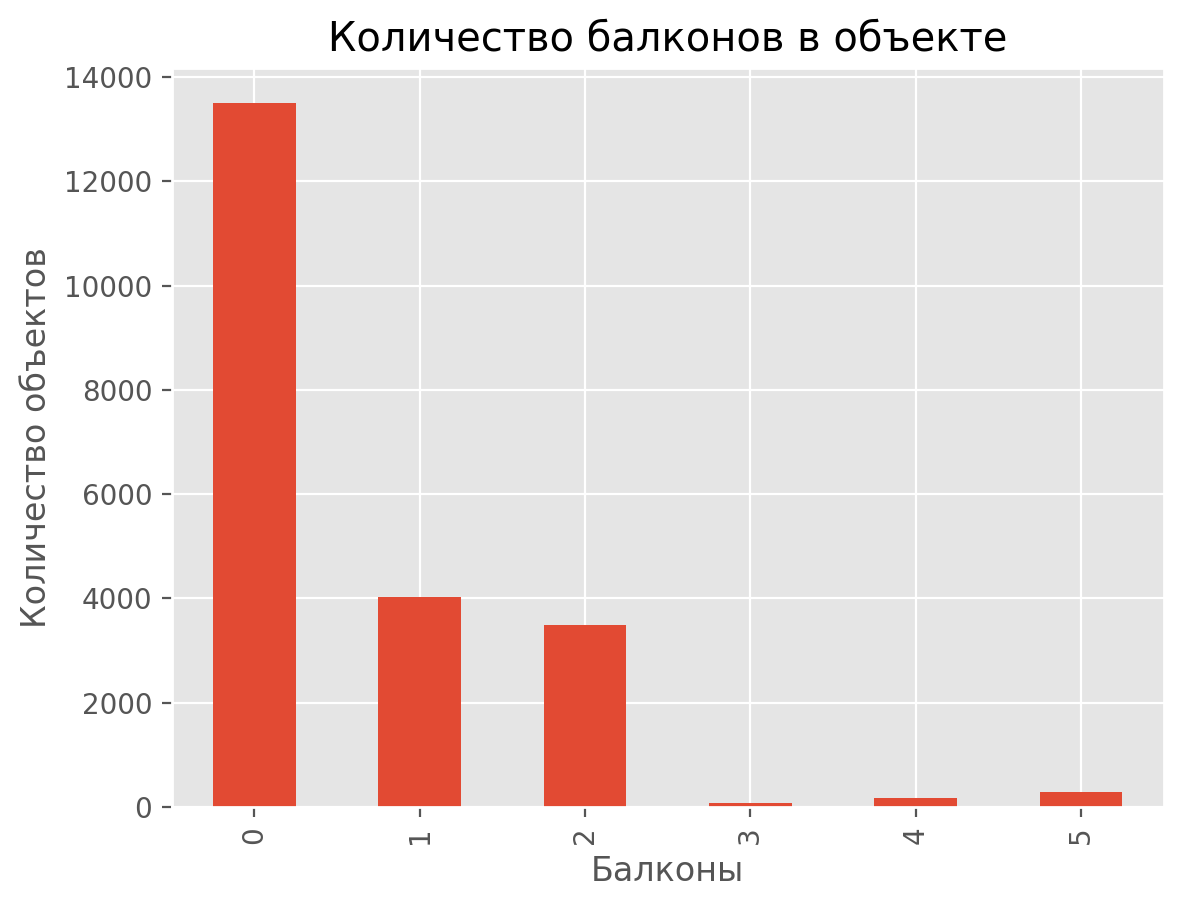

In [85]:
data.groupby('balcony')['living_area'].count().plot(kind='bar')
plt.xlabel('Балконы')
plt.ylabel('Количество объектов')
plt.title('Количество балконов в объекте')
plt.show()

Распределение похоже на нормальное, больше трех балконов, конечно, редкость, но тоже встречается

**Картографические данные:**

- **city_centers_nearest, parks_nearest, ponds_nearest, parks_around3000, ponds_around3000** - не наблюдается аномалий, все значения в порядке
-**airports_nearest** - смущает минимальное значение - 0. Объект(ы) находятся в самом аэропорту?
Сколько таких объектов в радиусе 5км?

In [86]:
print('Число объектов в радиусе 5 км от аэропорта:', len(data.query('airports_nearest<5000')))

Число объектов в радиусе 5 км от аэропорта: 0


Удалим этот объект и снова посмотрим на данные:

In [87]:
data.drop(index=data.query('airports_nearest<5000').index,inplace=True)
data.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  23379.000000  2.337900e+04  23379.000000  23379.000000    14311.000000   
mean       9.865135  6.078909e+06     59.127776      2.055905        2.723239   
std        5.673412  5.478119e+06     29.560220      1.040499        0.263457   
min        0.000000  4.300000e+05     12.000000      0.000000        2.500000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.600000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.700000e+06     69.195000      3.000000        2.800000   
max       50.000000  7.500000e+07    300.000000     16.000000        4.500000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23379.000000  21531.000000  23379.000000  21177.000000  23379.000000   
mean      10.697207     33.871575      5.881304     10.424313      0.593096   
std        6.588979     19.312483      4.877460      5.268661      0.958951   
min        1.000000      9.000000      1.000000      3.000000      0.000000   
25%        5.000000     18.600000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.100000      0.000000   
75%       16.000000     42.100000      8.000000     12.000000      1.000000   
max       36.000000    225.900000     33.000000     60.000000      5.000000   

       ...  parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
count  ...      23379.000000    7912.000000      23379.000000    8931.000000   
mean   ...          0.463664     490.784125         10.697207     520.153958   
std    ...          0.743233     341.564876          6.588979     277.832239   
min    ...          0.000000       1.000000          1.000000      13.000000   
25%    ...          0.000000     288.000000          5.000000     297.000000   
50%    ...          0.000000     455.000000          9.000000     505.000000   
75%    ...          1.000000     612.000000         16.000000     733.000000   
max    ...          3.000000    3190.000000         36.000000    1344.000000   

       days_exposition  per_square_price      week_day         month  \
count     23379.000000      23379.000000  23379.000000  23379.000000   
mean       1496.749134      98083.973574      2.567347      6.400231   
std        3351.527151      41150.362439      1.787743      3.493648   
min           1.000000       7962.960000      0.000000      1.000000   
25%          45.000000      76530.610000      1.000000      3.000000   
50%         124.000000      94878.050000      3.000000      6.000000   
75%         389.000000     113888.890000      4.000000     10.000000   
max        9999.000000     848484.850000      6.000000     12.000000   

               year  city_centers_nearest_km  
count  23379.000000             17908.000000  
mean    2017.369220                14.227161  
std        1.038997                 8.611824  
min     2014.000000                 0.000000  
25%     2017.000000                 9.000000  
50%     2017.000000                13.000000  
75%     2018.000000                16.000000  
max     2019.000000                66.000000  

[8 rows x 22 columns]

**Вывод по выбросам и аномальным значениям**

Проверены и обработаны выбросы в каждом столбце. Данные о стоимости, площадях, высоте потолков приведены к нормальным значениям максимумов и минимумов, удалены невозможные значения общего числа этажей, удален объект, находящийся в аэропорту, проверена допустимость нулевых значений числа комнат


## Добавление новых столбцов в таблицу

Для дальнейшего анализа необходимо добавить новые столбцы:

- *per_square_price* - цена одного кв.м.
- *week_day* - день недели публикации (0 - понедельник, 1- вторник, ..., 6 - воскресенье)
- *month* - месяц публикации объявления (значения от 1 до 12)
- *year* - год публикации объявления
- *city_centers_nearest_km* - расстояние до центра города в километрах
- *floor_type* - тип этажа объекта: 'первый', 'последний' или 'другой'


In [88]:
# добавление столбца с ценой 1кв.м, рассчитывается как стоимость объекта поделенная на его общую площадь:
data['per_square_price'] = data['last_price'] / data['total_area']
data['per_square_price'] = data['per_square_price'].round(2)

# добавление столбцов с днем, месяцем и годом публикации, извлекаются соответствующие данные из столбца с датой:
data['week_day'] = data['first_day_exposition'].dt.dayofweek
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# добавление столбца с расстоянием в км до центра города: переводим в км и окгругляем имеющиеся данные в метрах:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

# функция для определения типа этажа. Если этаж первый, то и тип этажа 'первый', если этаж равен общему 
# числу этажей в доме, присвоим тип 'последний', остальные этажи получат тип 'другой':
def floor_type(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        return 'другой'
    except:
        print('Ошибка')
# добавление результатов работы функции в столбец с типом этажа
data['floor_type'] = data.apply(floor_type, axis=1)

# вывод информации для проверки
display(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23379 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23379 non-null  int64         
 1   last_price               23379 non-null  int32         
 2   total_area               23379 non-null  float64       
 3   first_day_exposition     23379 non-null  datetime64[ns]
 4   rooms                    23379 non-null  int64         
 5   ceiling_height           14311 non-null  float64       
 6   floors_total             23379 non-null  int32         
 7   living_area              21531 non-null  float64       
 8   floor                    23379 non-null  int64         
 9   is_apartment             23379 non-null  bool          
 10  studio                   23379 non-null  bool          
 11  open_plan                23379 non-null  bool          
 12  kitchen_area             21177 n

None

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000      108.00           2019-03-07      3   
1             7     3350000       40.40           2018-12-04      1   
2            10     5196000       56.00           2015-08-20      2   
3             0    64900000      159.00           2015-07-24      3   
4             2    10000000      100.00           2018-06-19      2   
5            10     2890000       30.40           2018-09-10      1   
6             6     3700000       37.30           2017-11-02      1   
7             5     7915000       71.60           2019-04-18      2   
8            20     2900000       33.16           2018-05-23      1   
9            18     5400000       61.00           2017-02-26      3   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16        51.00      8         False  ...   
1             NaN            11        18.60      1         False  ...   
2             NaN             5        34.30      4         False  ...   
3             NaN            14          NaN      9         False  ...   
4            3.03            14        32.00     13         False  ...   
5             NaN            12        14.40      5         False  ...   
6             NaN            26        10.60      6         False  ...   
7             NaN            24          NaN     22         False  ...   
8             NaN            27        15.43     26         False  ...   
9            2.50             9        43.60      7         False  ...   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0          482.0                16          755.0             9999   
1            NaN                11            NaN               81   
2           90.0                 5          574.0              558   
3           84.0                14          234.0              424   
4          112.0                14           48.0              121   
5            NaN                12            NaN               55   
6            NaN                26            NaN              155   
7            NaN                24            NaN             9999   
8            NaN                27            NaN              189   
9            NaN                 9            NaN              289   

  per_square_price  week_day  month  year  city_centers_nearest_km  floor_type  
0        120370.37         3      3  2019                     16.0      другой  
1         82920.79         1     12  2018                     19.0      первый  
2         92785.71         3      8  2015                     14.0      другой  
3        408176.10         4      7  2015                      7.0      другой  
4        100000.00         1      6  2018                      8.0      другой  
5         95065.79         0      9  2018                      NaN      другой  
6         99195.71         3     11  2017                     19.0      другой  
7        110544.69         3      4  2019                     12.0      другой  
8         87454.76         2      5  2018                      NaN      другой  
9         88524.59         6      2  2017                     15.0      другой  

[10 rows x 28 columns]

**Вывод**

Необходимые для дальнейшего анализа столбцы добавлены. Встречаются ожидаемые пропуски в новом столбце 'city_centers_nearest_km' - связаны с пропусками в столбце 'city_centers_nearest'

## Исследовательский анализ данных

### Построение гистограмм по интересующим параметрам


#### **Площади: общая, жилая, площадь кухни**

##### Общая площадь

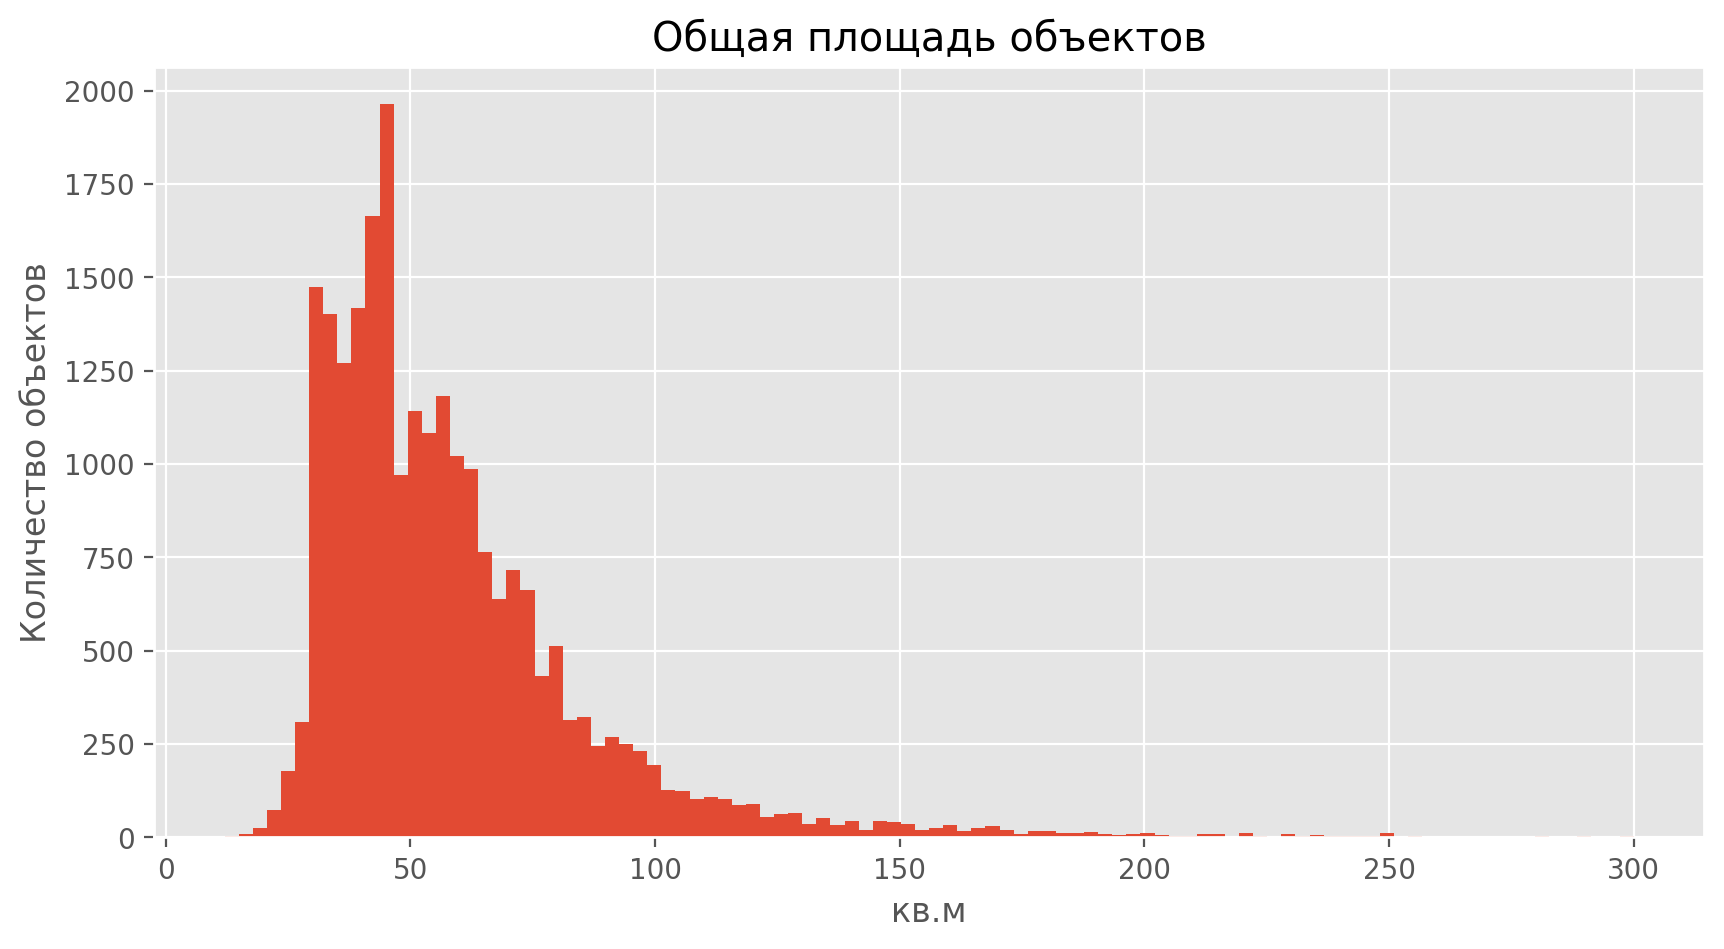

Наибольшие значения площади:
20919    300.0
8038     300.0
23005    297.5
10181    295.0
15017    293.6
Name: total_area, dtype: float64

Наименьшие значения площади:
19904    12.0
19546    13.0
17961    13.0
19807    13.0
19558    13.2
Name: total_area, dtype: float64

Медианный размер площади: 52.0 кв.м


In [92]:
data.plot(kind='hist', y='total_area', bins=100, grid=True, figsize=(10,5), legend=False)
plt.title('Общая площадь объектов')
plt.xlabel('кв.м')
plt.ylabel('Количество объектов')
plt.show()
print('Наибольшие значения площади:') 
print(data['total_area'].sort_values(ascending=False).head())
print()
print('Наименьшие значения площади:') 
print(data['total_area'].sort_values().head())
print()
print('Медианный размер площади:', data['total_area'].median(), 'кв.м')

В целом распределение выглядит нормальным. **Больше всего квартир имеют площадь чуть менее 50 кв.м** при этом **медианное значение площади - 52 кв.м**, объекты менее 2 5кв.м встречаются уже значительно реже. Много больших квартир - площадью 50-100 кв.м, объектов площадью 100-150 кв.м уже меньше, а объкты более 200 кв.м. - редкость, таких значений немного.

##### Жилая площадь

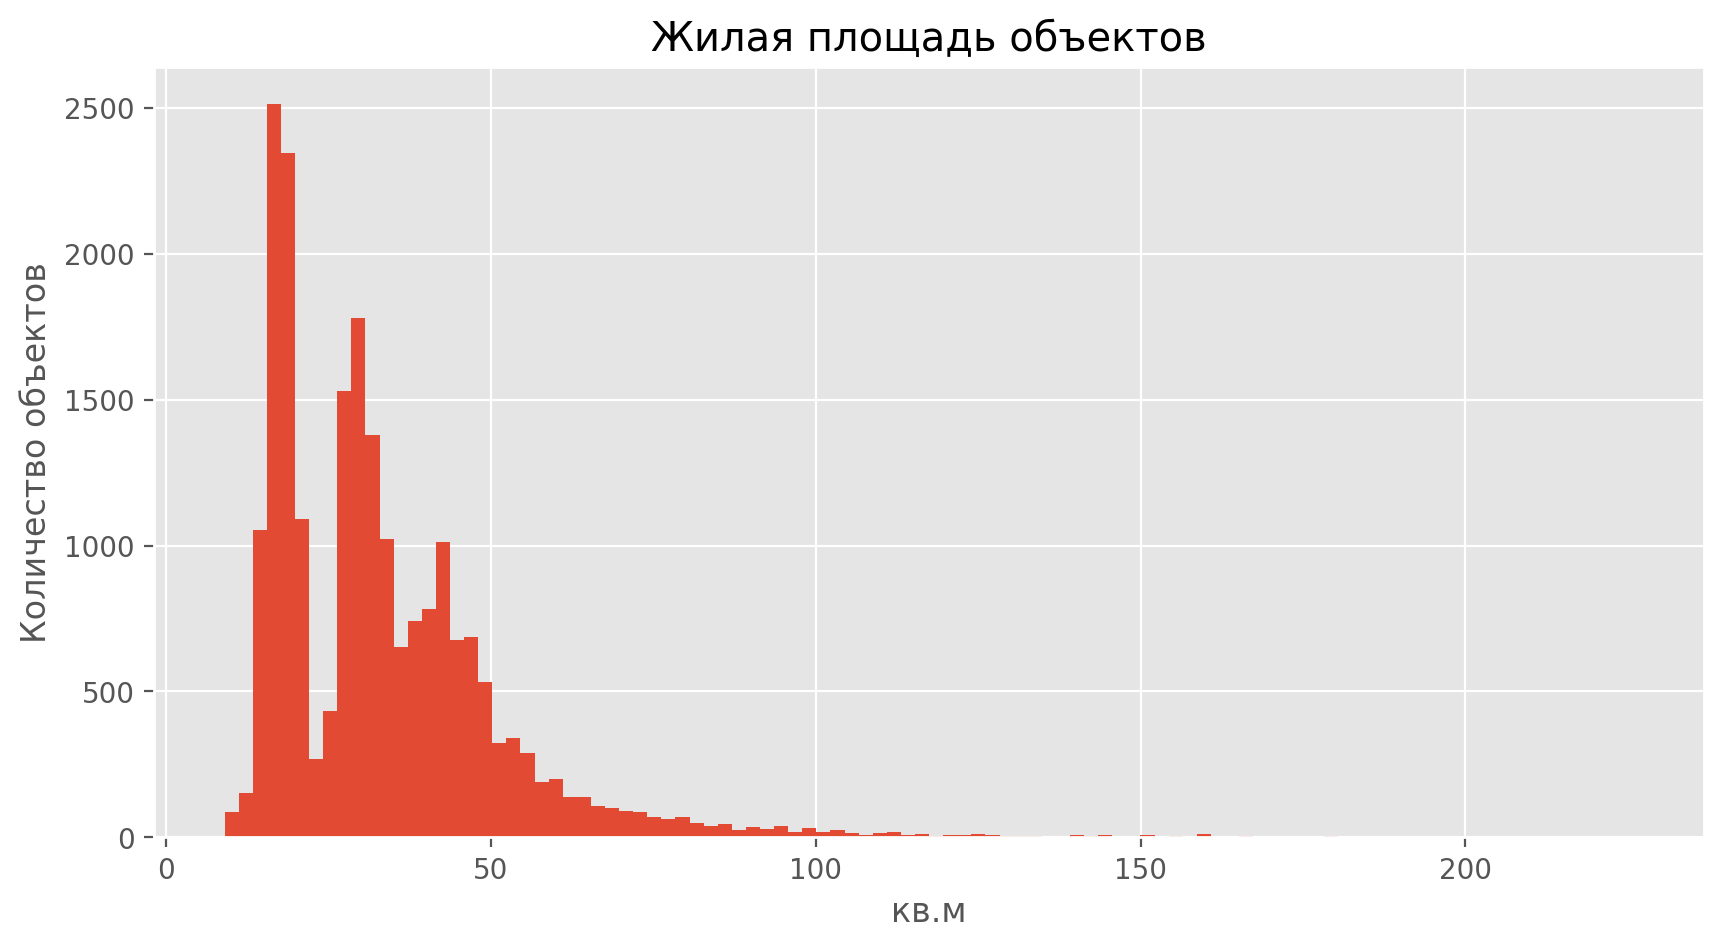

Наибольшие значения жилой площади:
16915    225.9
21685    211.0
22907    200.0
10246    200.0
6728     195.0
Name: living_area, dtype: float64

Наименьшие значения жилой площади:
19620    9.0
8325     9.0
4100     9.0
15833    9.0
680      9.0
Name: living_area, dtype: float64

Медианный размер площади: 30.0 кв.м


In [94]:
data.plot(
    kind='hist',
    y='living_area',
    bins=100,
    grid=True,
    figsize=(10,5),
    legend=False
)
plt.title('Жилая площадь объектов')
plt.xlabel('кв.м')
plt.ylabel('Количество объектов')
plt.show()
print('Наибольшие значения жилой площади:') 
print(data['living_area'].sort_values(ascending=False).head())
print()
print('Наименьшие значения жилой площади:') 
print(data['living_area'].sort_values().head())
print()
print('Медианный размер площади:', data['living_area'].median(), 'кв.м')

Из гистограммы видим, что **чаще всего в наборе данных встречаются объекты с площадью 10-50 кв.м.** Посмотрим отдельно на такие объекты и выявим пиковые значения:

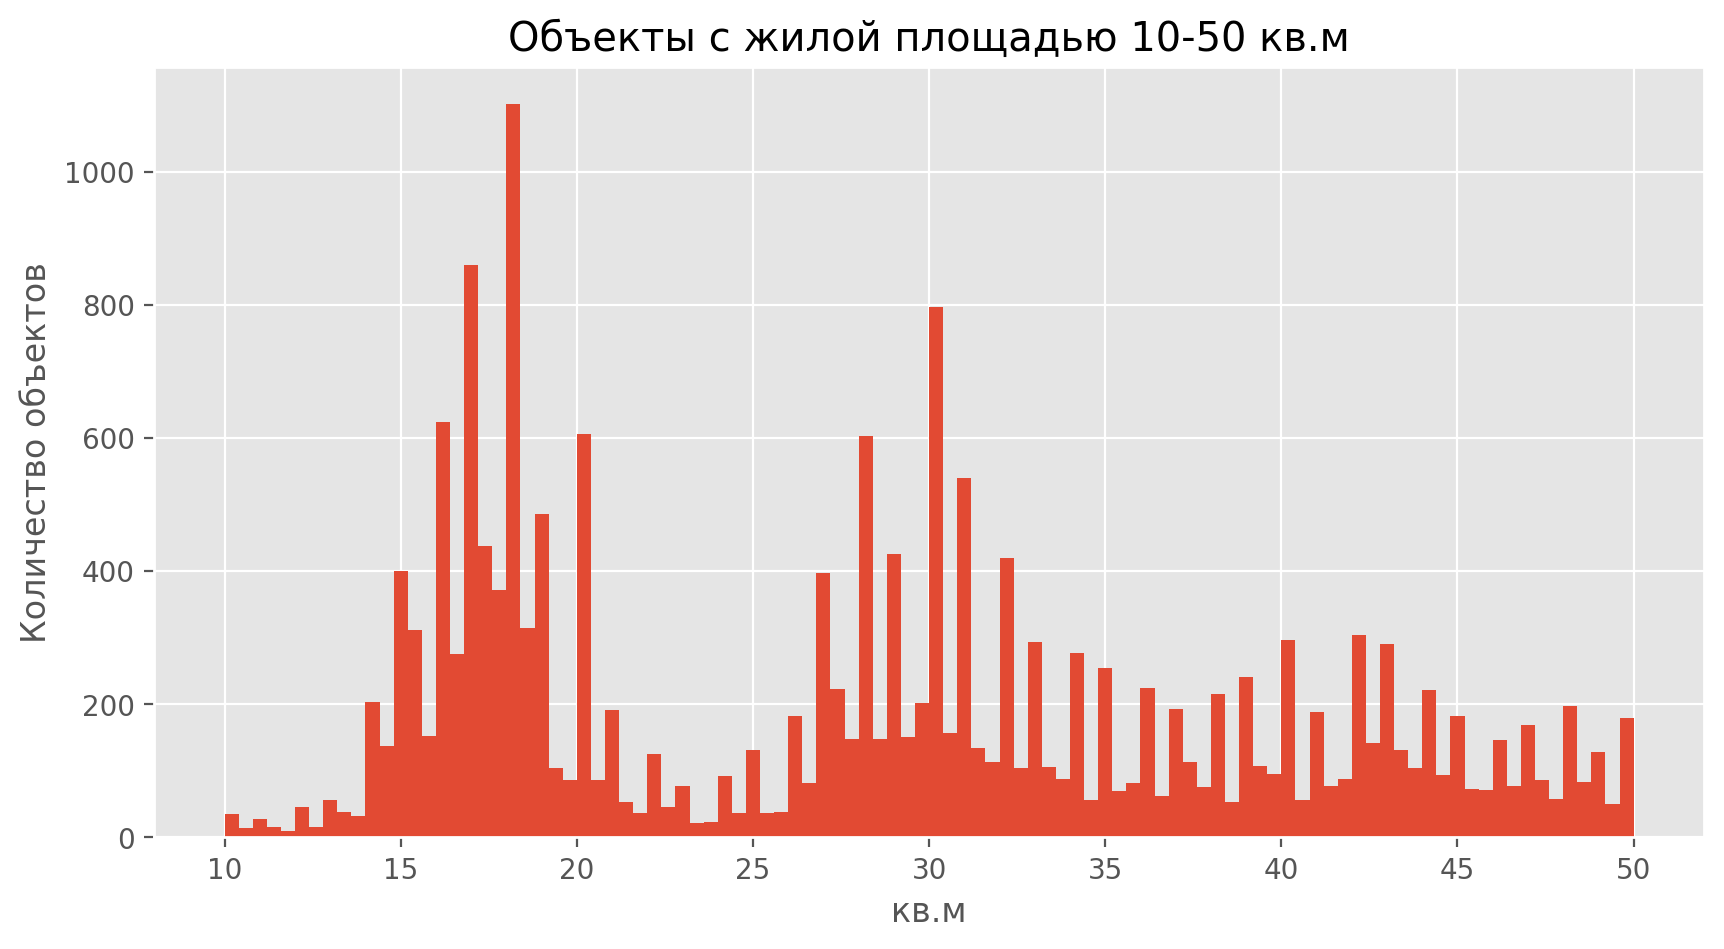

Самые частые размеры площади:
18.0    879
17.0    672
30.0    596
16.0    481
20.0    479
Name: living_area, dtype: int64


In [95]:
data.plot(
    kind='hist',
    y='living_area',
    range=(10,50),
    bins=100,
    grid=True,
    figsize=(10,5),
    legend=False
)
plt.title('Объекты с жилой площадью 10-50 кв.м')
plt.xlabel('кв.м')
plt.ylabel('Количество объектов')
plt.show()
print('Самые частые размеры площади:')
print(data['living_area'].value_counts().head(5))

Чаще всего наши объекты имеют жилую площадь 18, 17 и 30 кв.м. **Медианный размер площади: 30 кв.м.**  Минимальное значение 9 кв.м. ранее определили как допустимое, судя по гистограмме, таких объектов немного. Объекты с жилой площадью > 150 кв.м. очень редкие, их частота не противоречит количеству объектов с большой общей площадью.

##### Площадь кухни

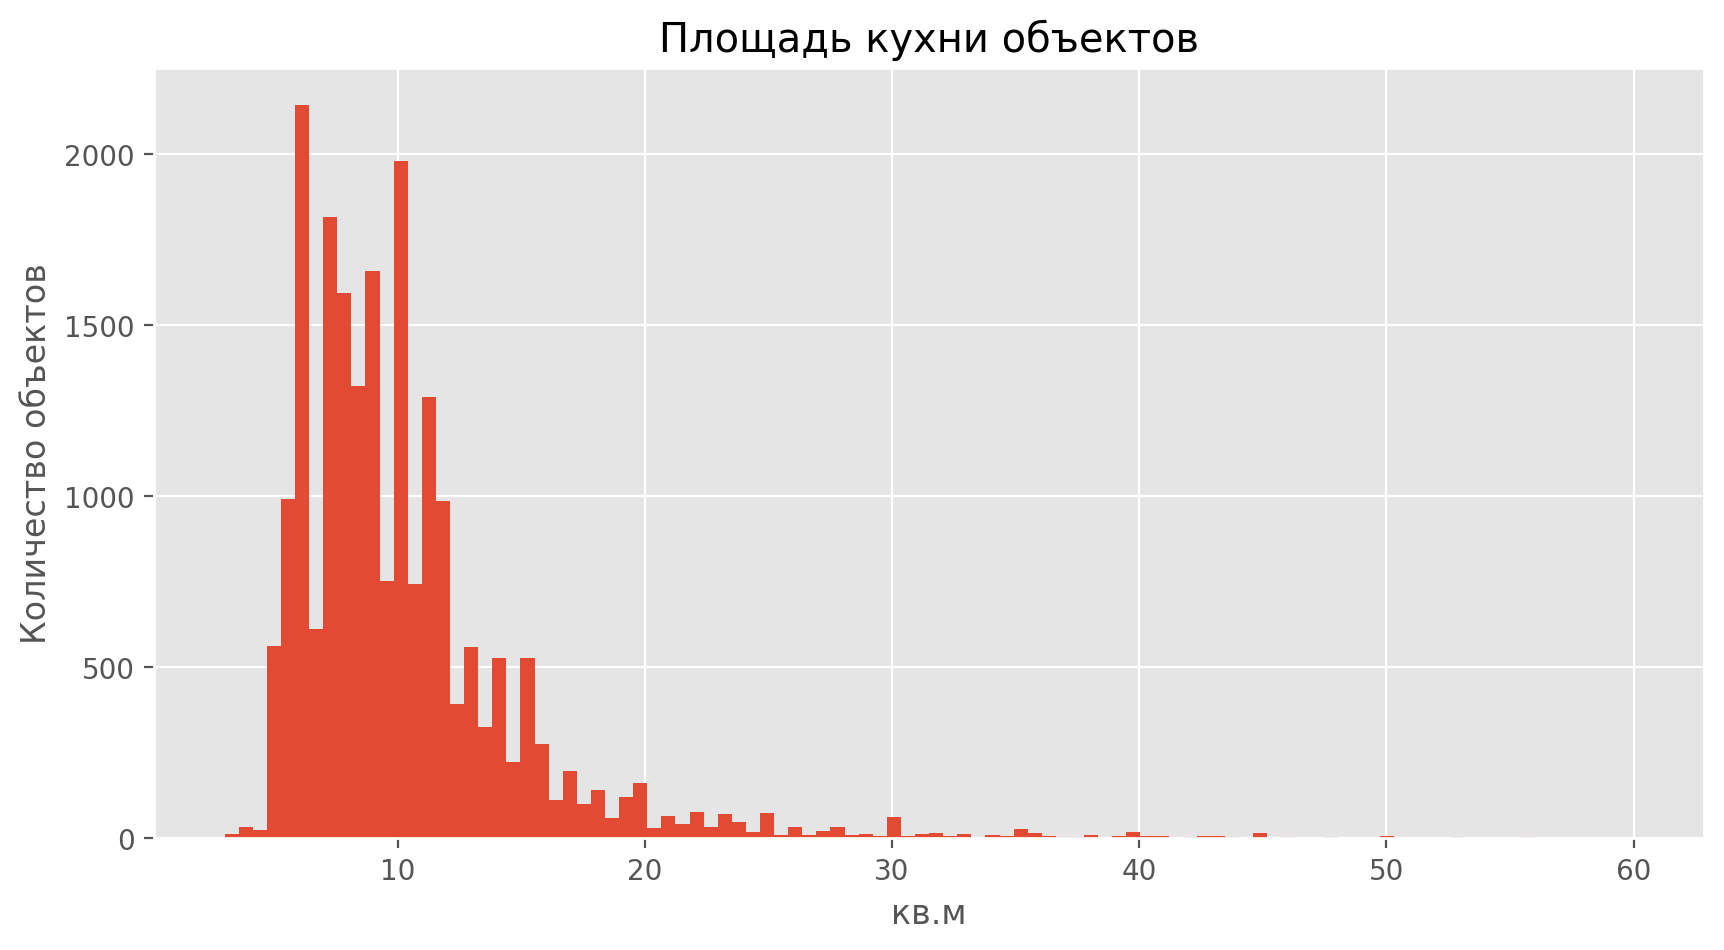

Наибольшие значения площади кухни:
3561     60.0
13845    60.0
8261     58.4
20871    58.0
4320     56.2
Name: kitchen_area, dtype: float64

Наименьшие значения площади кухни:
17424    3.0
15014    3.0
13814    3.0
6084     3.0
18066    3.0
Name: kitchen_area, dtype: float64

Медианный размер площади: 9.1 кв.м


In [96]:
data.plot(
    kind='hist',
    y='kitchen_area',
    bins=100,
    grid=True,
    figsize=(10,5),
    legend=False
)
plt.title('Площадь кухни объектов')
plt.xlabel('кв.м')
plt.ylabel('Количество объектов')
plt.show()
print('Наибольшие значения площади кухни:') 
print(data['kitchen_area'].sort_values(ascending=False).head())
print()
print('Наименьшие значения площади кухни:') 
print(data['kitchen_area'].sort_values().head())
print()
print('Медианный размер площади:', data['kitchen_area'].median(), 'кв.м')

Больше всего значений располагаются в диапазоне **6-10 кв.м., медианный размер: 9.1 кв.м,** встречается небольшое число объектов с кухнями менее 5 кв.м. Аномально большие площади ранее удалили, макимальное значение - 60 кв.м. В целом, кухни более 30 кв.м. встречаются редко

#### Стоимость объекта

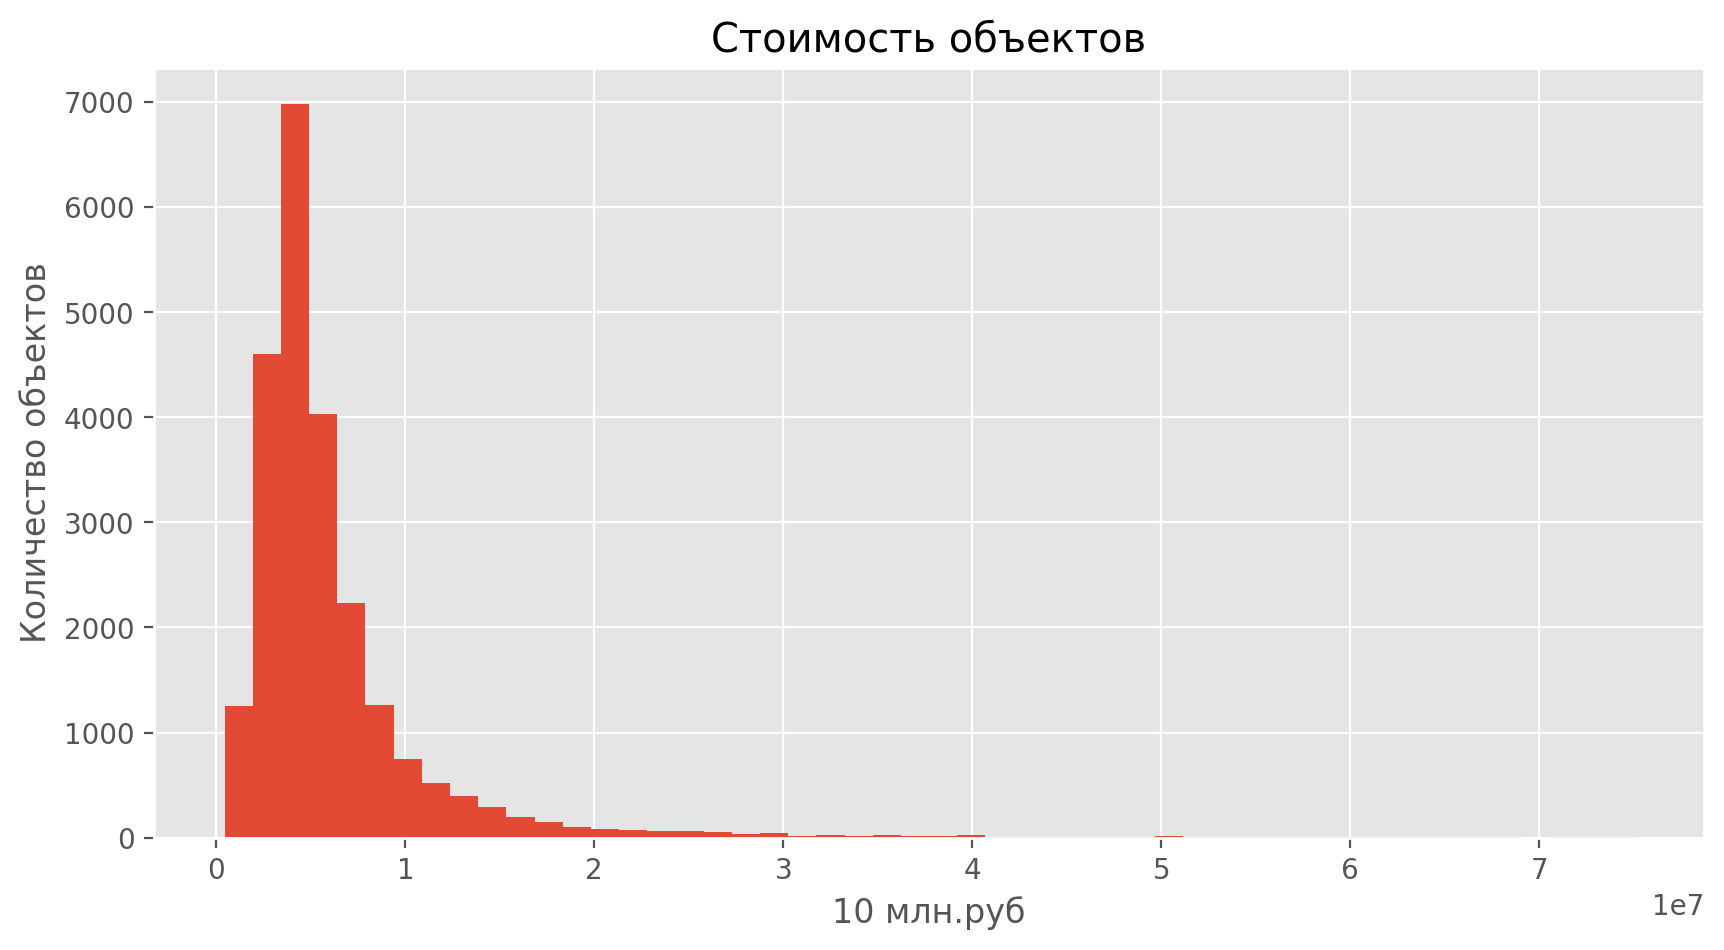

Наибольшее значение стоимости:
12865    75000000
6020     75000000
19267    74000000
14668    73884056
11336    72375000
Name: last_price, dtype: int32

Наименьшее значение стоимости:
14911    430000
17456    430000
16274    440000
5698     450000
17676    450000
Name: last_price, dtype: int32

Медианная стоимость: 4600000.0
Средняя стоимость: 6078908.543693058


In [98]:
data.plot(
    kind='hist',
    y='last_price',
    bins=50,
    grid=True,
    figsize=(10,5),
    legend=False
)
plt.title('Стоимость объектов')
plt.xlabel('10 млн.руб')
plt.ylabel('Количество объектов')
plt.show()
print('Наибольшее значение стоимости:') 
print(data['last_price'].sort_values(ascending=False).head())
print()
print('Наименьшее значение стоимости:') 
print(data['last_price'].sort_values().head())
print()
print('Медианная стоимость:', data['last_price'].median())
print('Средняя стоимость:', data['last_price'].mean())

Общая гистограмма по стоимости дает мало информации из-за большого размаха значений. Больше всего значений приходится на стоимость до 25 млн.руб. Медианная стоимость составляет **4.6 млн.руб**, средняя имеет более высокое значения за счет дорогих объектов - **6.08 млн.руб**. Начиная со стоимости от 10 млн частота объявлений видимо сокращается. Дорогих объектов значительно меньше. **Число объектов дороже 40 млн.руб практически сливается с нулем**

#### Количество комнат

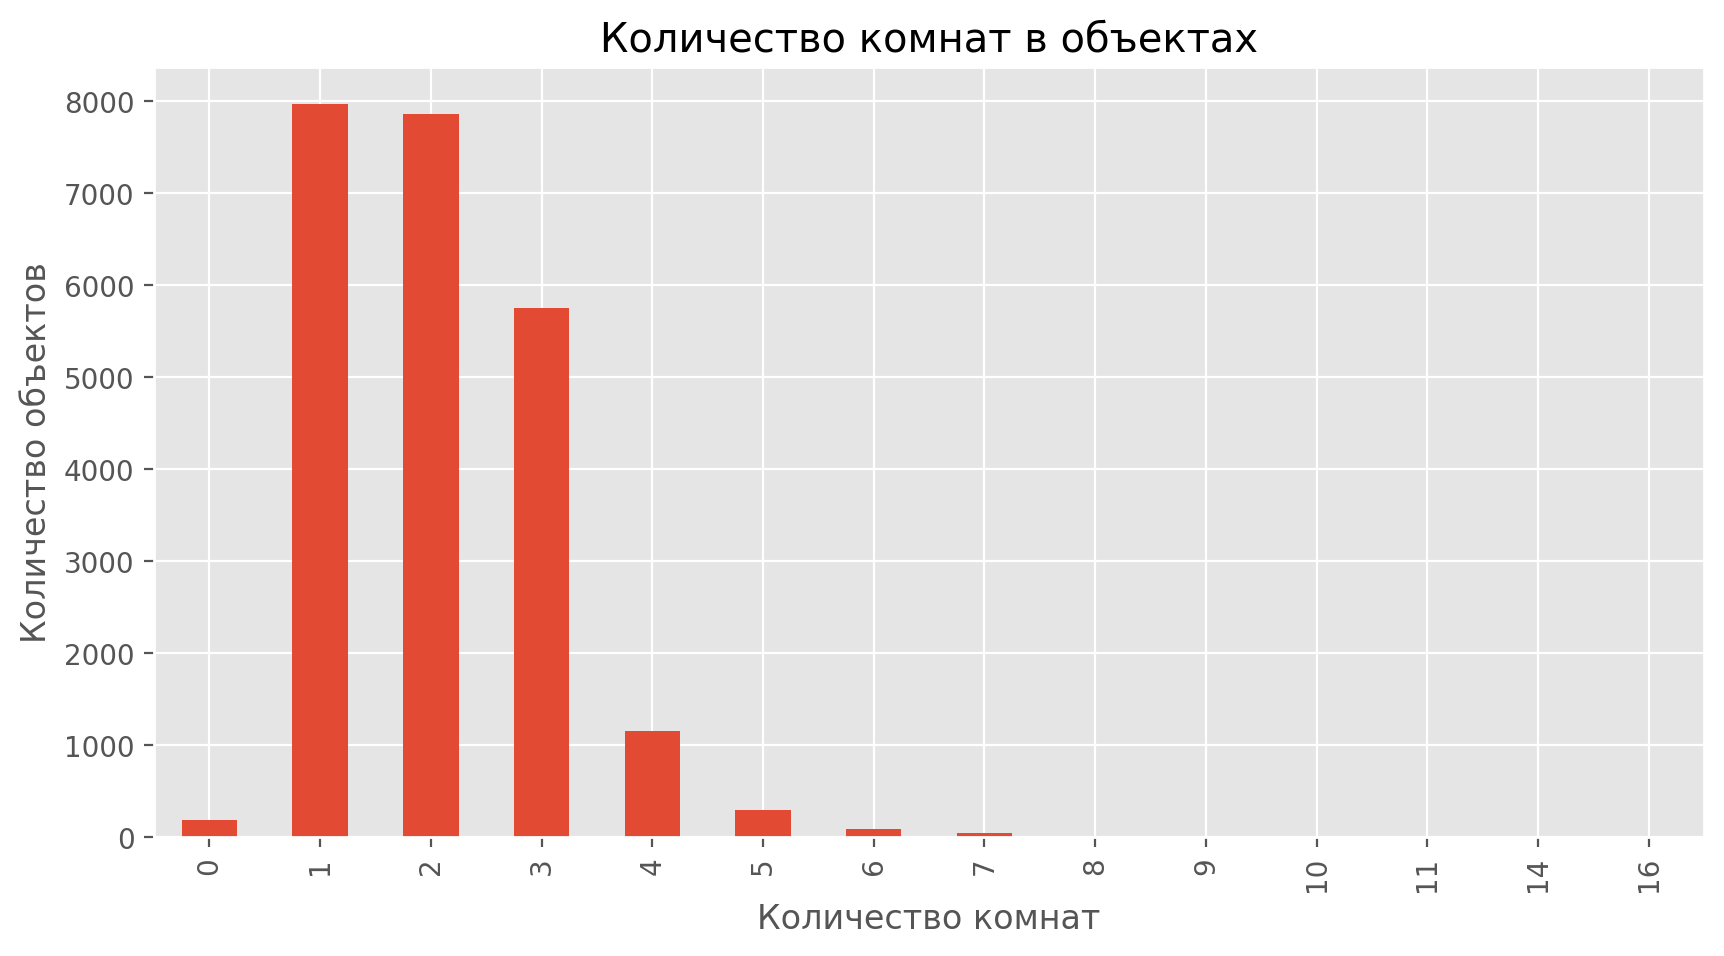

In [105]:
data.groupby(by='rooms')['rooms'].count()\
    .plot(kind='bar', figsize=(10,5), xlabel='Количество комнат', 
          ylabel = 'Количество объектов', 
          title='Количество комнат в объектах');

Больше всего объектов с **одной или двумя комнатами**. Видим ожидаемый минимум - 0, ранее мы определили, что значения характерны для студий и объектов со свободной планировкой. Шесть и более комнат встречаются редко.

#### Высота потолков

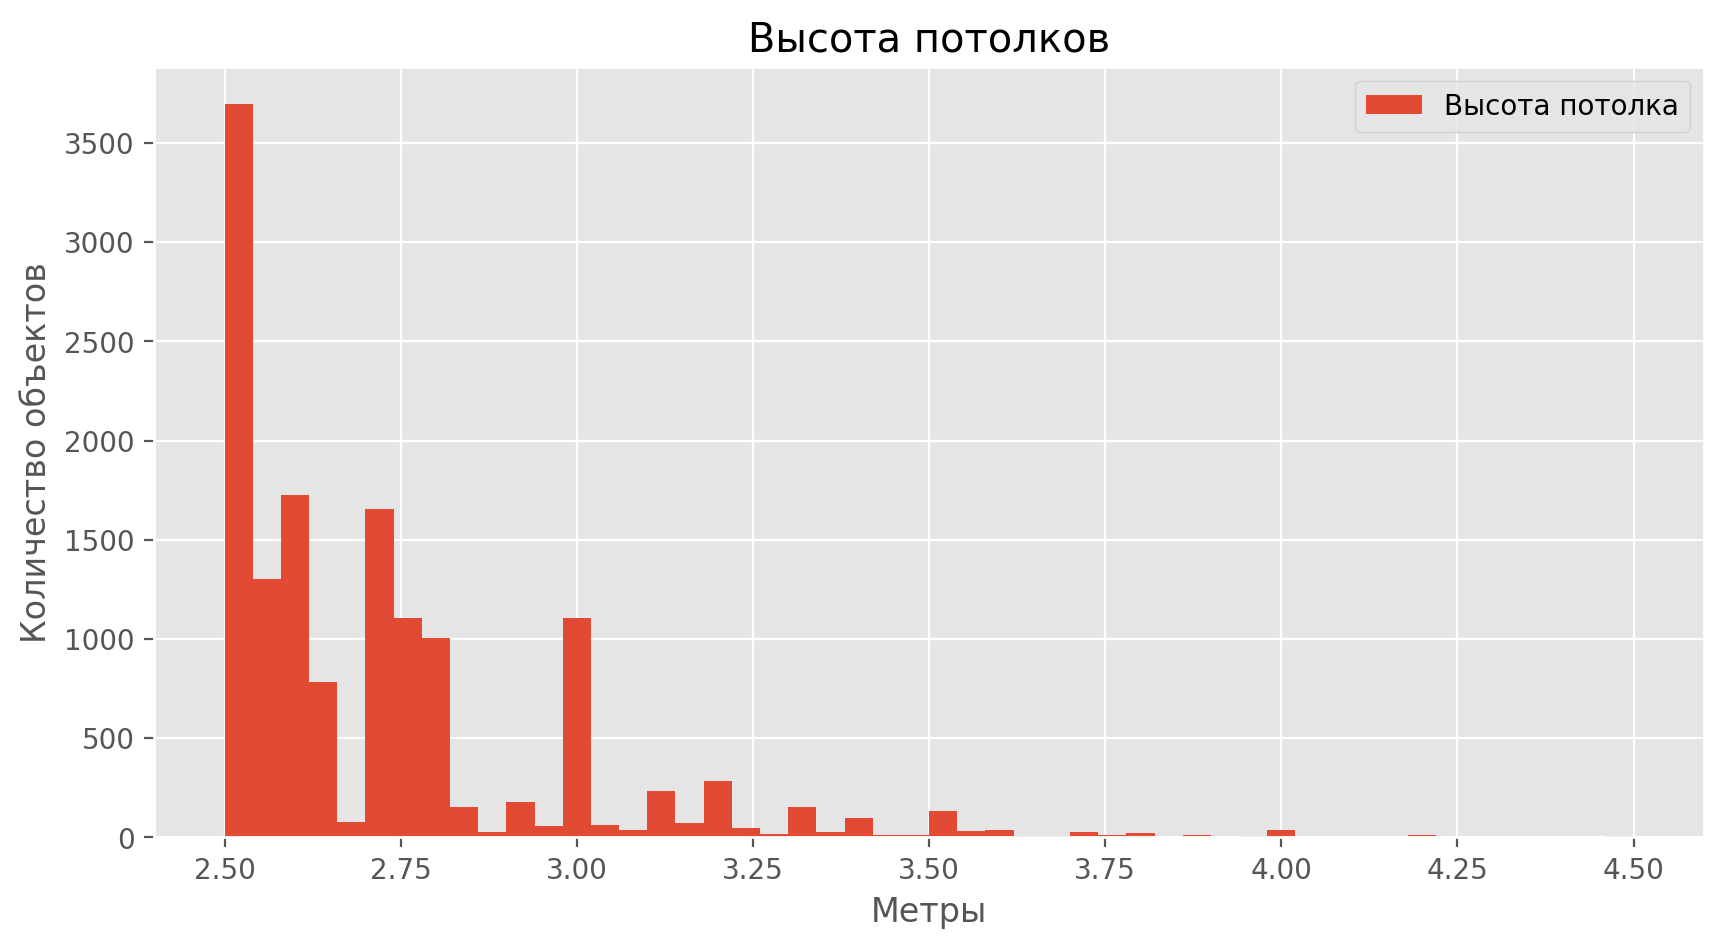

Медианное значение высоты потолка: 2.65 м


In [108]:
data.plot(
    kind='hist',
    y='ceiling_height',
    bins=50,
    grid=True,
    figsize=(10,5),
    label='Высота потолка',
)
plt.xlabel('Метры')
plt.ylabel('Количество объектов')
plt.title('Высота потолков')
plt.show()
print('Медианное значение высоты потолка:', data['ceiling_height'].median(), 'м')

**Больше всего объектов с минимальной высотой потолка - 2.5м.** Большинство значений расположено в диапазоне 2.5-3м, что ожидаемо. Встречаются объекты с потолками 3-3,5м, более высокий потолок - редкость

#### **Этажи: этаж объекта, тип этажа, общее число этажей в здании**

##### Этаж объекта

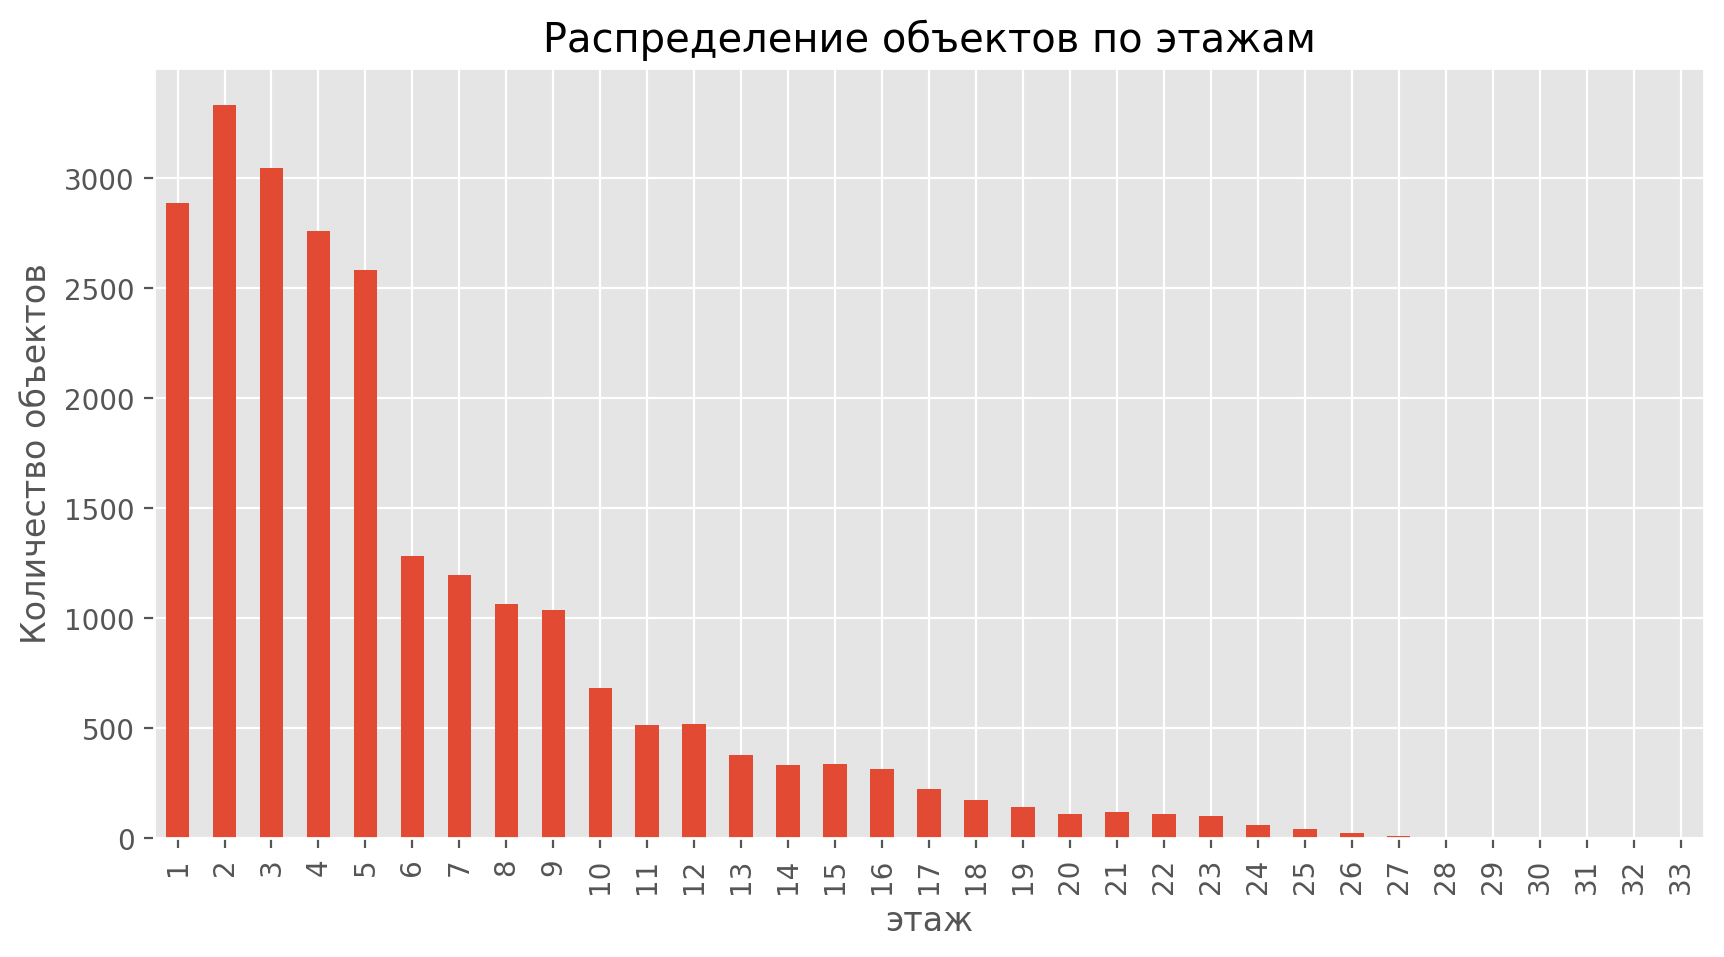

In [112]:
data.groupby(by='floor')['floor'].count()\
    .plot(kind='bar',figsize=(10,5), xlabel='этаж', ylabel='Количество объектов', title='Распределение объектов по этажам');

В наших данных чаще всего встречается **второй этаж**, большинство объектов расположены на 1-5 этаже. Более 2700 объектов располагается на первом этаже.

##### Тип этажа

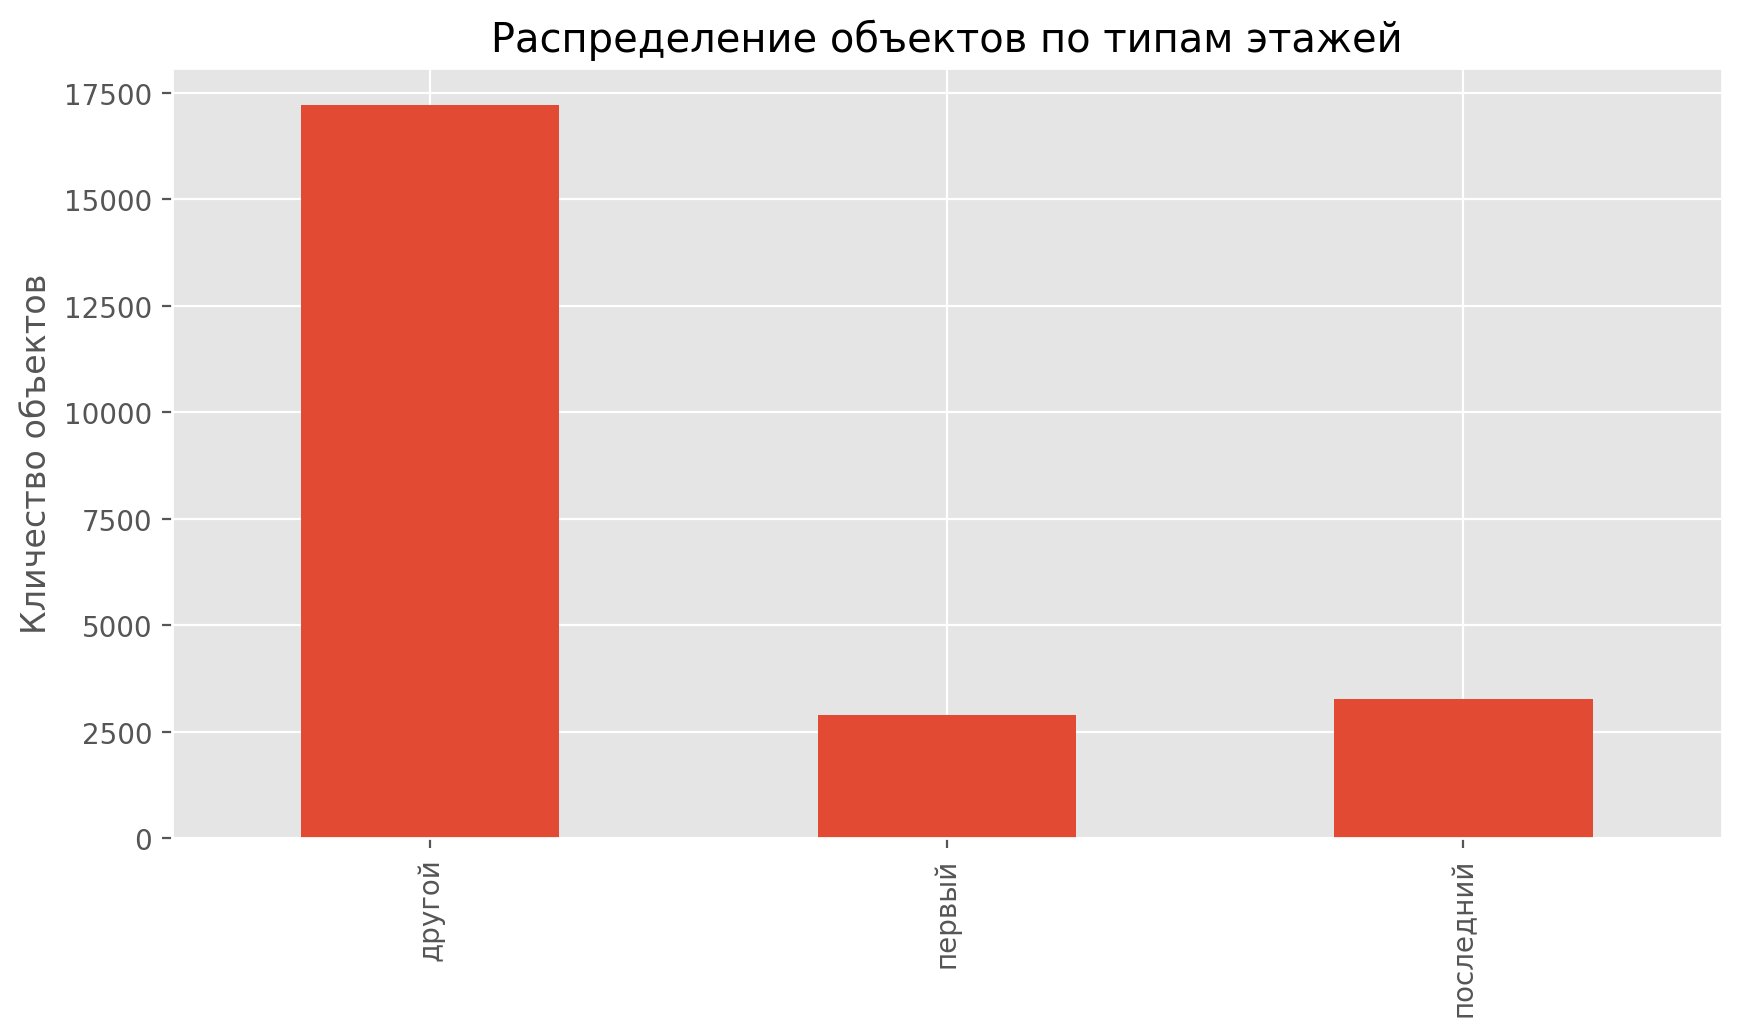

In [114]:
data.groupby(by='floor_type')['floor_type'].count()\
    .plot(kind='bar', figsize=(10,5), ylabel='Кличество объектов', xlabel='',
          title='Распределение объектов по типам этажей');


Меньше всего объектов на первом этаже - около 2700, чуть больше объектов расположено на последнем этаже. **Все остальные объекты  не относятся ни к первому, ни к последнему этажу.**

##### Общее число этажей в здании

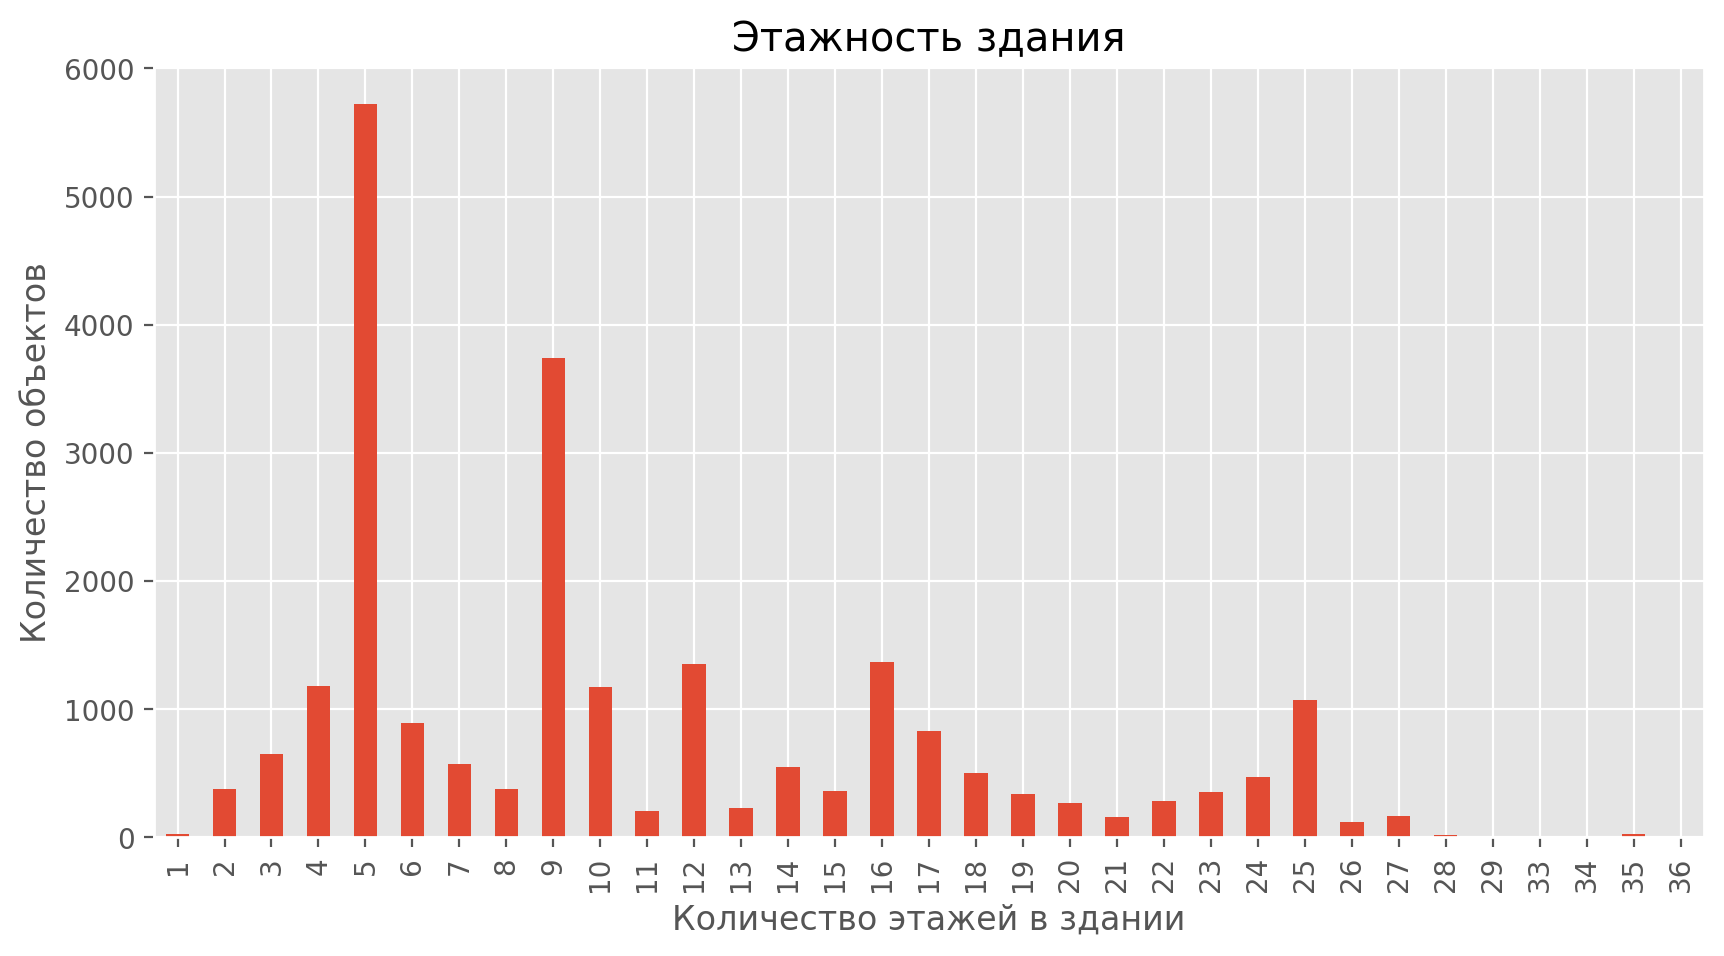

In [117]:
data.groupby(by='floors_total')['floors_total'].count()\
        .plot(kind='bar', figsize=(10,5), ylabel='Количество объектов', xlabel='Количество этажей в здании',
              title='Этажность здания');


Преимущественно наши объекты находятся в **пятиэтажках**, достаточно часто встречаются девятиэтажные здания. Есть небольшое число одноэтажных домов и 36-этажных высоток

#### Картографические данные

##### Расстояние до центра города

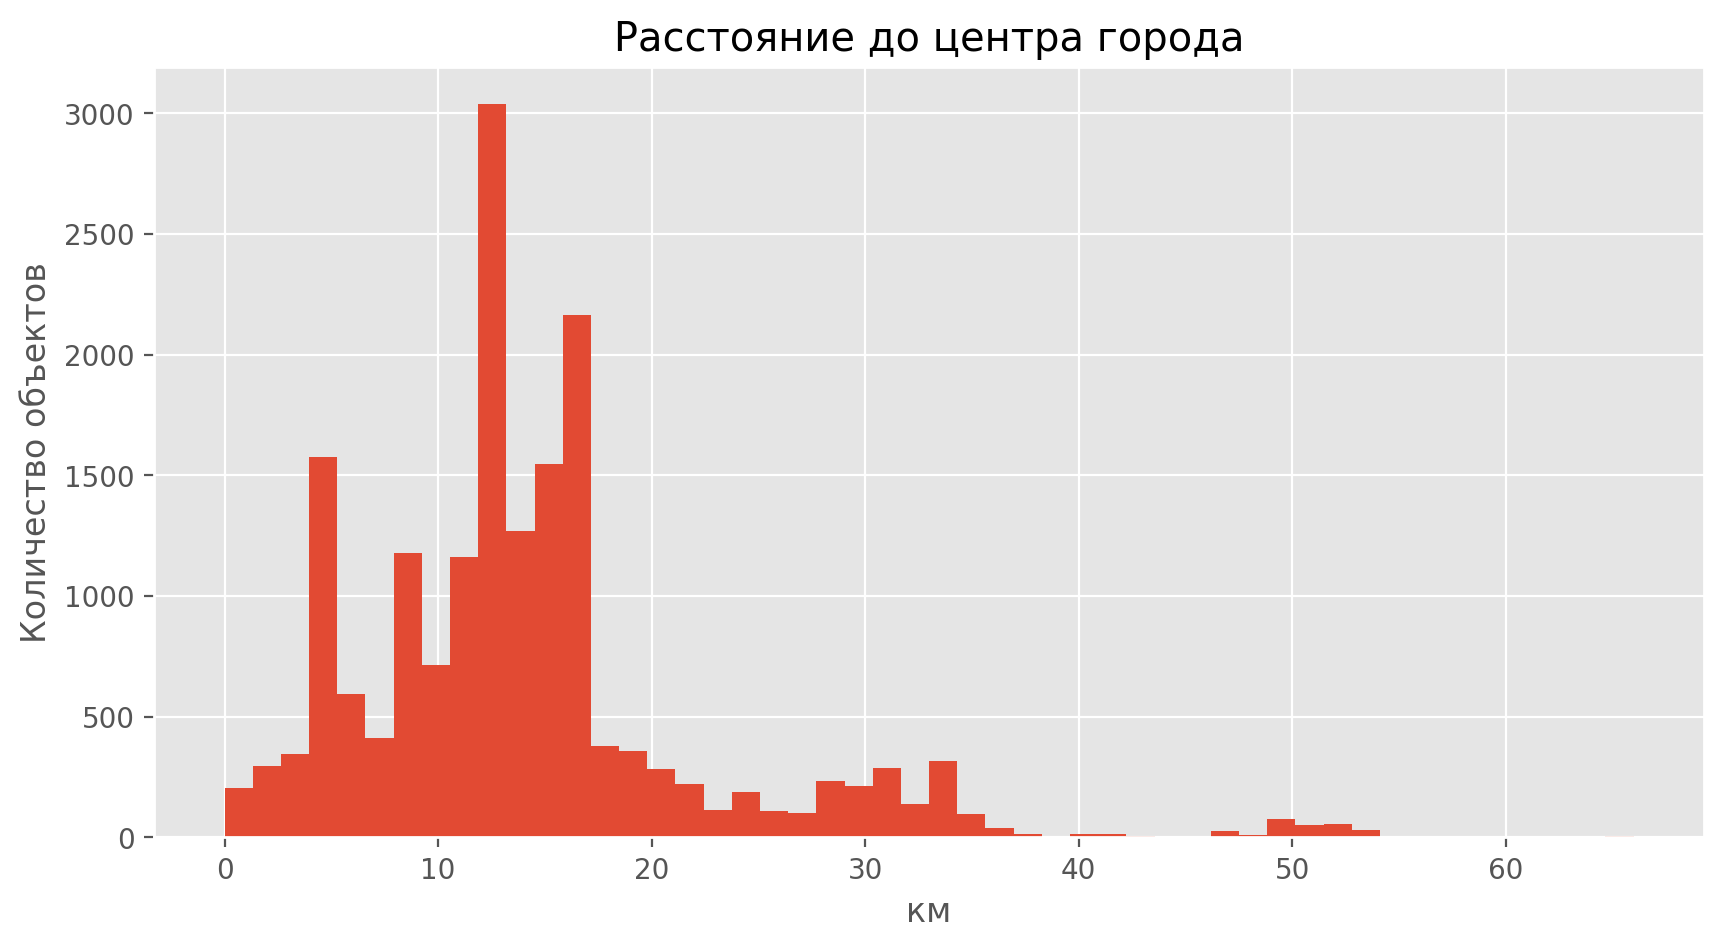

Всего учитываемых объектов: 17884
Максимальное учитываемое расстояние: 66.0
Минимальное расстояние: 0.0
Медианное расстояние: 13.0


In [124]:
data.plot(
    kind='hist',
    y='city_centers_nearest_km',
    bins=50,
    grid=True,
    figsize=(10,5),
    title='Расстояние до центра города',
    legend=False
)
plt.xlabel('км')
plt.ylabel('Количество объектов')
plt.show()
print('Всего учитываемых объектов:', len(data.query('city_centers_nearest_km > 0')))
print('Максимальное учитываемое расстояние:', data['city_centers_nearest_km'].max()) 
print('Минимальное расстояние:', data['city_centers_nearest_km'].min()) 
print('Медианное расстояние:', data['city_centers_nearest_km'].median())


**Больше всего объектов распалагается в радиусе 10-20 км от центра города**, пиковое значение ~12км. Не мало объектов расположены в пределах 10 км от центра, есть квартиры, находящиеся в самом центре. Максимальная отдаленность от центра - 66 км, объекты расположенные далее здесь не рассматриваются. **Медианное расстояние для рассматриваемых объектов: 13 км.**

##### Расстояние до ближайшего аэропорта

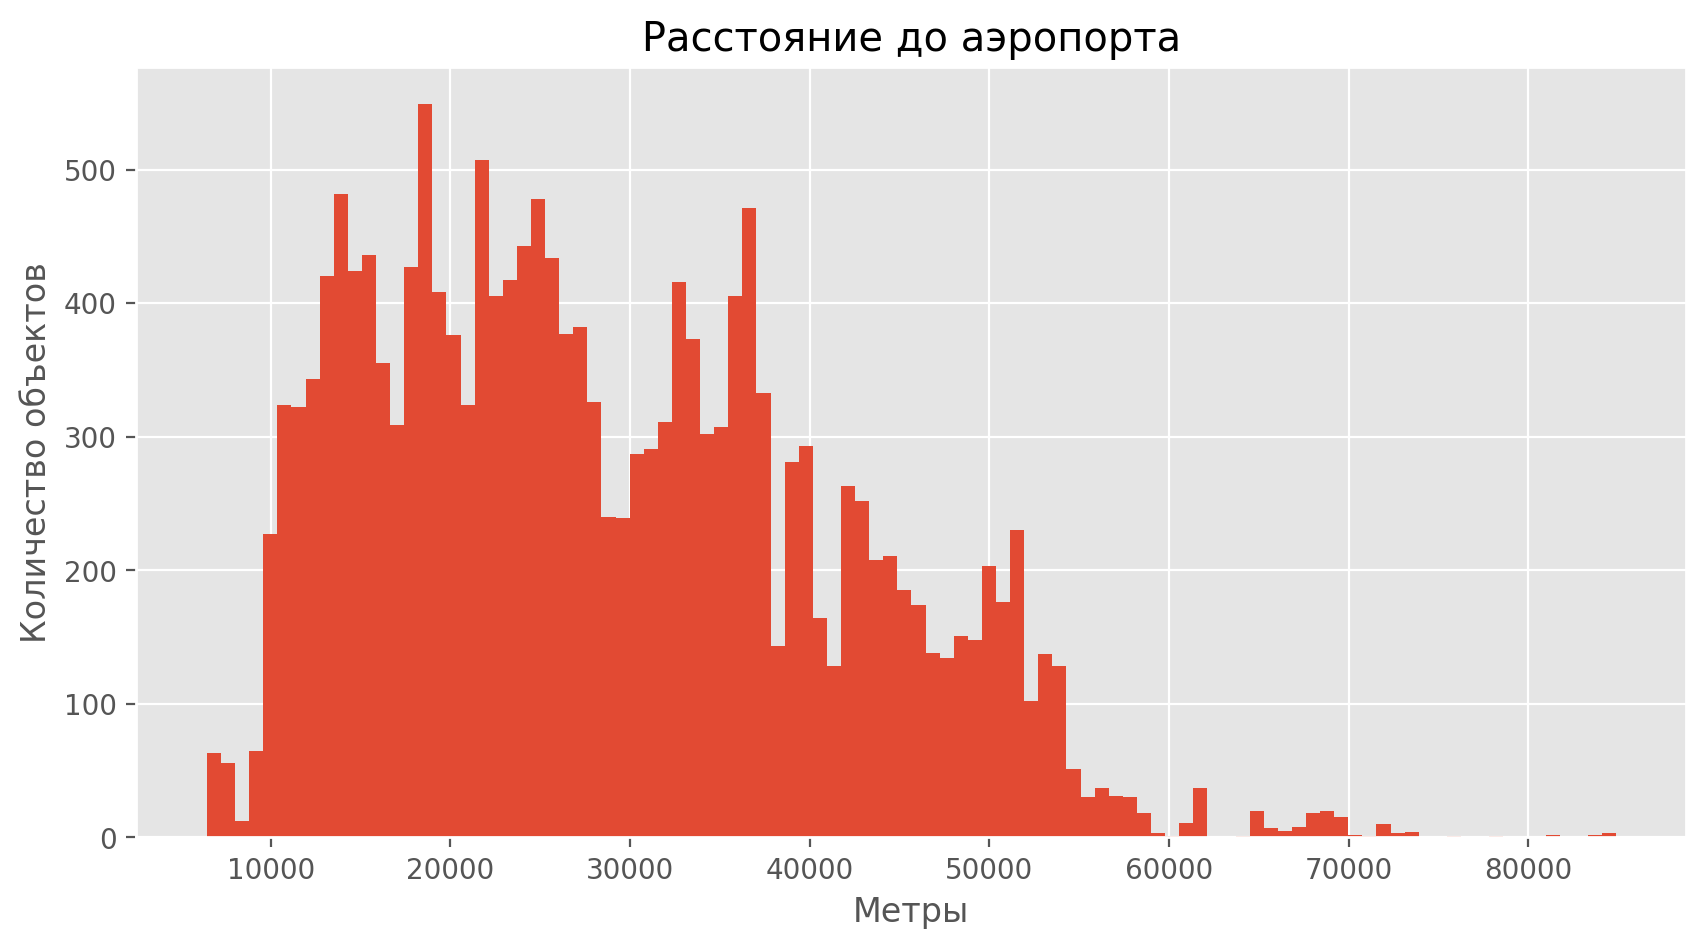

Всего учитываемых объектов: 17887
Максимальное учитываемое расстояние: 84869.0
Минимальное расстояние: 6450.0
Медианное расстояние: 26767.0


In [129]:
data.plot(
    kind='hist',
    y='airports_nearest',
    bins=100,
    grid=True,
    title='Расстояние до аэропорта',
    figsize=(10,5),
    legend=False
)
plt.xlabel('Метры')
plt.ylabel('Количество объектов')
plt.show()
print('Всего учитываемых объектов:', len(data.query('airports_nearest > 0')))
print('Максимальное учитываемое расстояние:', data['airports_nearest'].max())
print('Минимальное расстояние:', data['airports_nearest'].min()) 
print('Медианное расстояние:', data['airports_nearest'].median())


Небольшое число объектов находятся в радиусе 10 км от аэропорта. Почти тысяча объектов находятся на расстоянии 19 км. от аэропорта. Учитываем, что в диаграмме представлены далеко не все объекты - многие находятся дальше, чем 90 км. от аэропорта. **Медианное расстояние для рассматриваемых объектов: 26,7 км.**

##### Расстояние до ближайшего парка

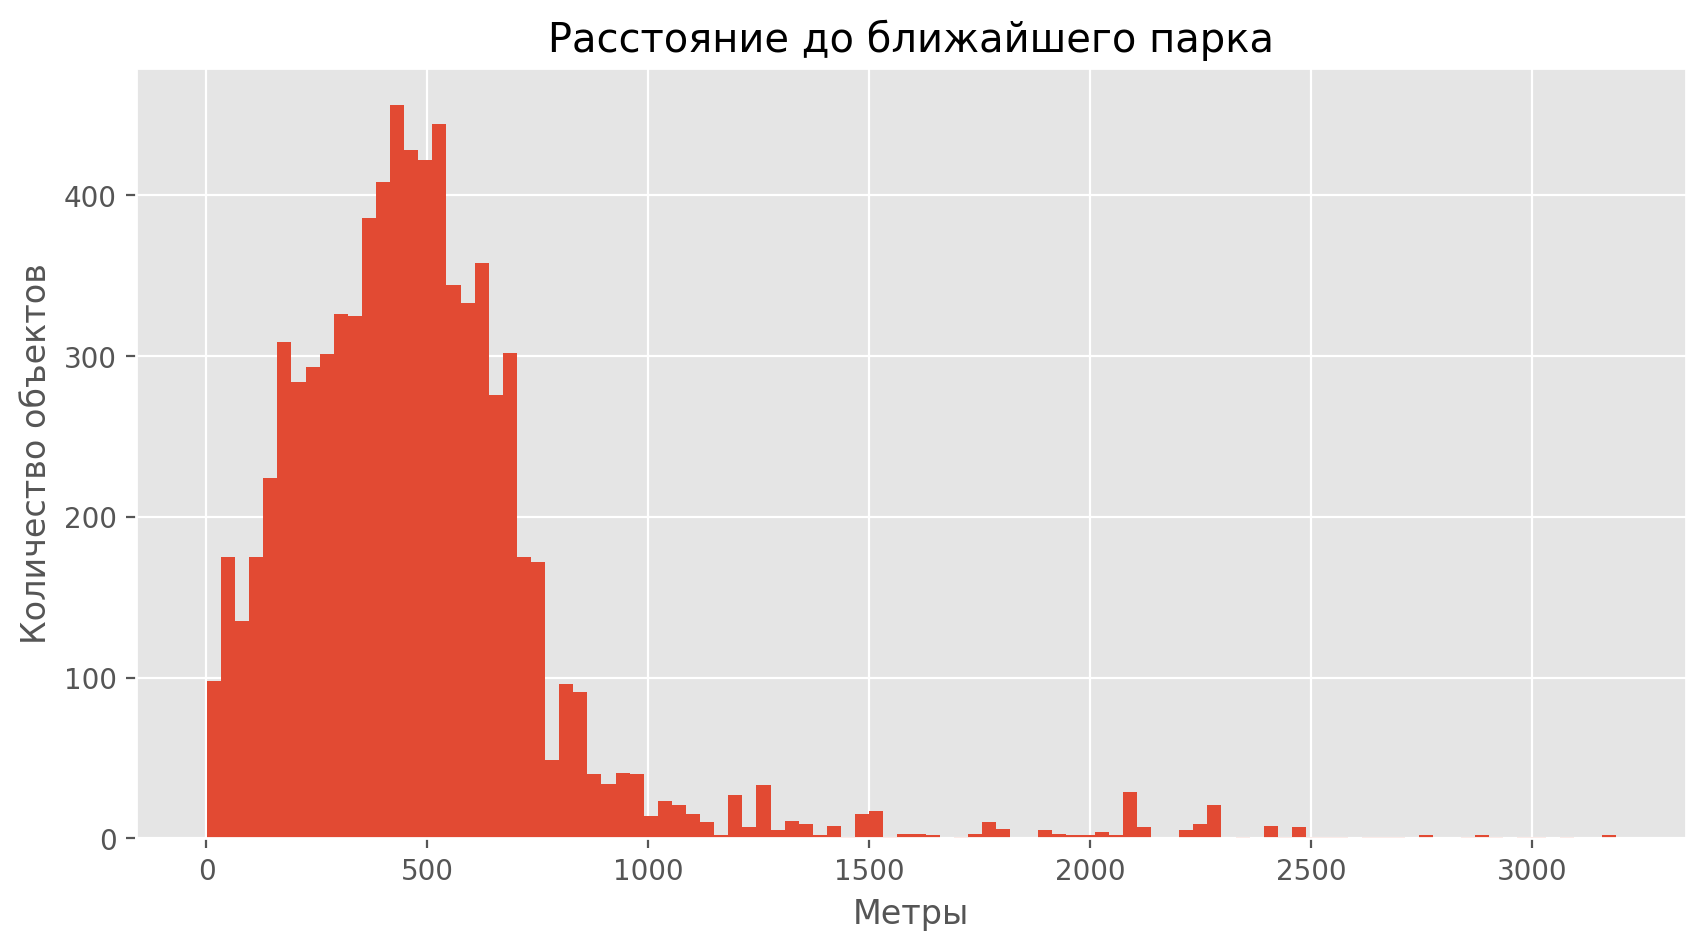

Всего учитываемых объектов: 7912
Максимальное учитываемое расстояние: 3190.0
Минимальное расстояние: 1.0
Медианное расстояние: 455.0


In [133]:
data.plot(
    kind='hist',
    y='parks_nearest',
    bins=100,
    grid=True,
    title='Расстояние до ближайшего парка',
    legend=False,
    figsize=(10,5)
)
plt.xlabel('Метры')
plt.ylabel('Количество объектов')
plt.show()
print('Всего учитываемых объектов:', len(data.query('parks_nearest > 0')))
print('Максимальное учитываемое расстояние:', data['parks_nearest'].max())
print('Минимальное расстояние:', data['parks_nearest']. min()) 
print('Медианное расстояние:', data['parks_nearest'].median())


У большинства рассматриваемых объектов парк располагается в радиусе ~400 метров, также помним, что многие объекты не учтены в диаграмме (те, для которых ближайший парк находится далее 3.2 км). **Медианное расстояние для рассматриваемых объектов: 455 м.**

##### Расстояние до ближайшего водоема

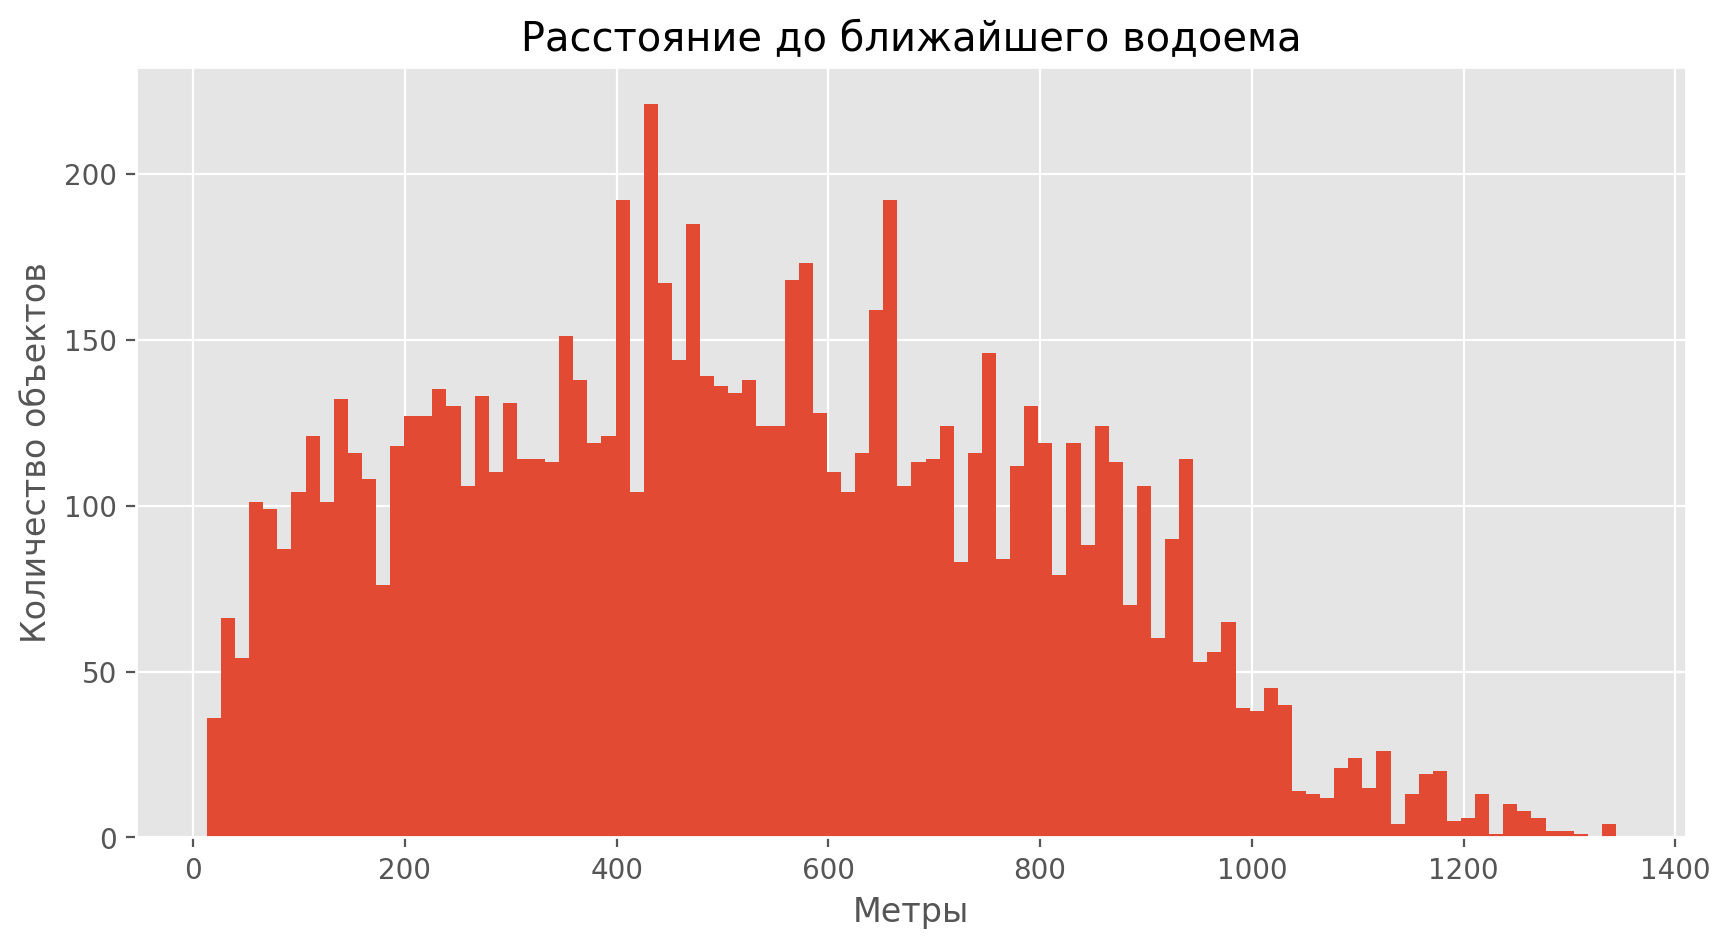

Всего учитываемых объектов: 8931
Максимальное учитываемое расстояние: 1344.0
Минимальное расстояние: 13.0
Медианное расстояние: 505.0


In [136]:
data.plot(
    kind='hist',
    y='ponds_nearest',
    bins=100,
    grid=True,
    figsize=(10,5),
    title='Расстояние до ближайшего водоема',
    legend=False
)
plt.xlabel('Метры')
plt.ylabel('Количество объектов')
plt.show()
print('Всего учитываемых объектов:', len(data.query('ponds_nearest > 0')))
print('Максимальное учитываемое расстояние:', data['ponds_nearest'].max()) 
print('Минимальное расстояние:', data['ponds_nearest'].min()) 
print('Медианное расстояние:', data['ponds_nearest'].median())


Снова вспоминаем, что не учтены объекты, не имеющие водоема в радиусе 1.5 км. Объекты рядом с водоемами чаще находятся в радиусе 400-600 метров. **Медианное расстояние для рассматриваемых объектов: 505м.**

#### **День и месяц публикации объявления**

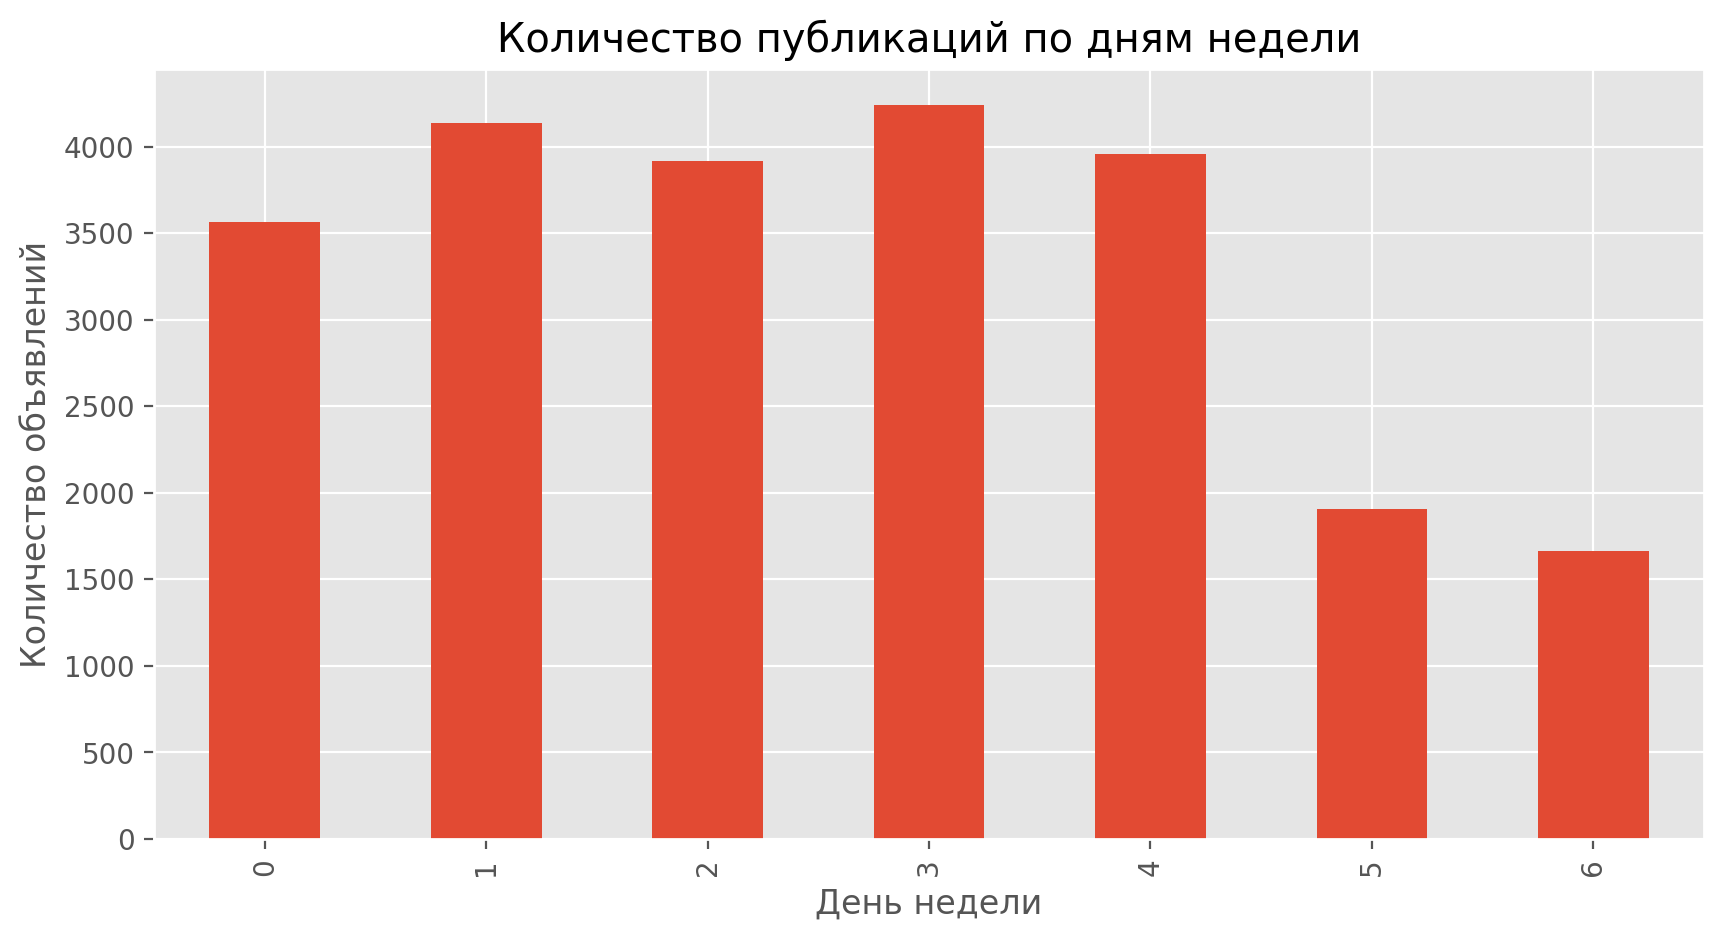

In [145]:
data.groupby(by='week_day')['week_day'].count().plot(kind='bar', 
                                                     figsize=(10,5),
                                                     ylabel='Количество объявлений', 
                                                     xlabel='День недели',
                                                    title= 'Количество публикаций по дням недели')
plt.show()

Чаще всего объявления публикуют **во вторник и четверг**, реже всего - в выходные

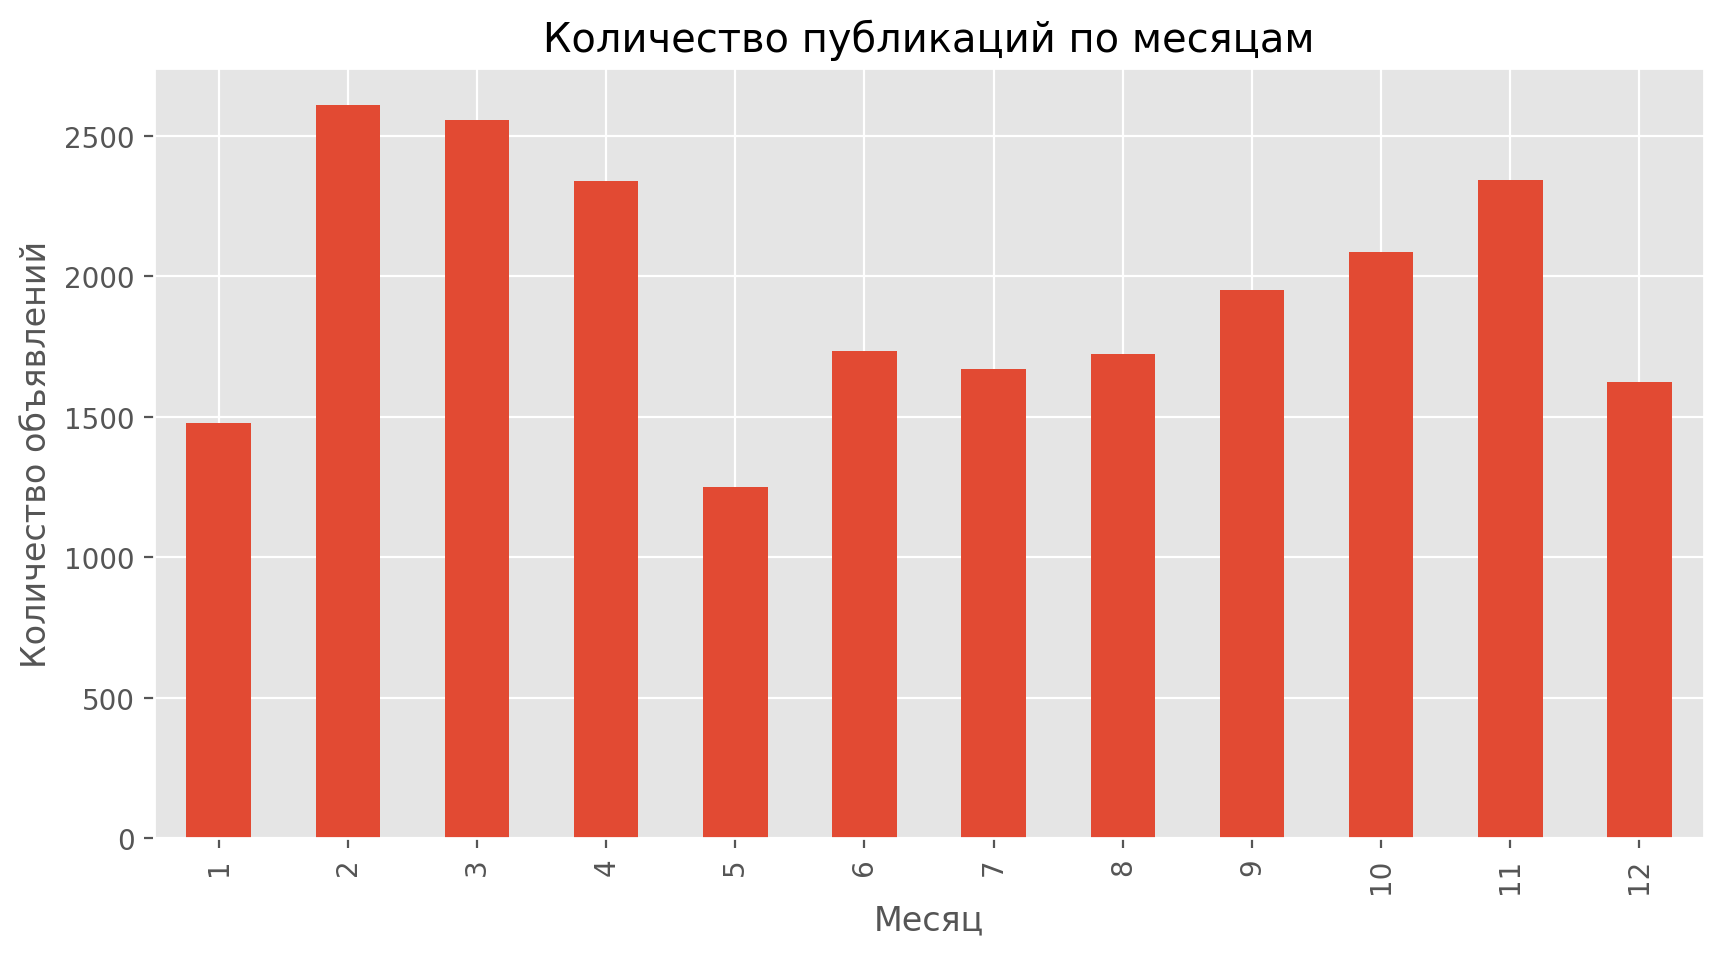

In [146]:
data.groupby(by='month')['month'].count().plot(kind='bar', 
                                               figsize=(10,5),
                                               ylabel='Количество объявлений', 
                                               xlabel='Месяц',
                                              title='Количество публикаций по месяцам')
plt.show()

Активнее всего публикуют объявления в **феврале и марте**, реже всего - в январе и мае, возможно, связано с большим количество выходных в этих месяцах

### Как быстро продаются объекты?

Посмотрим на гистограмму:

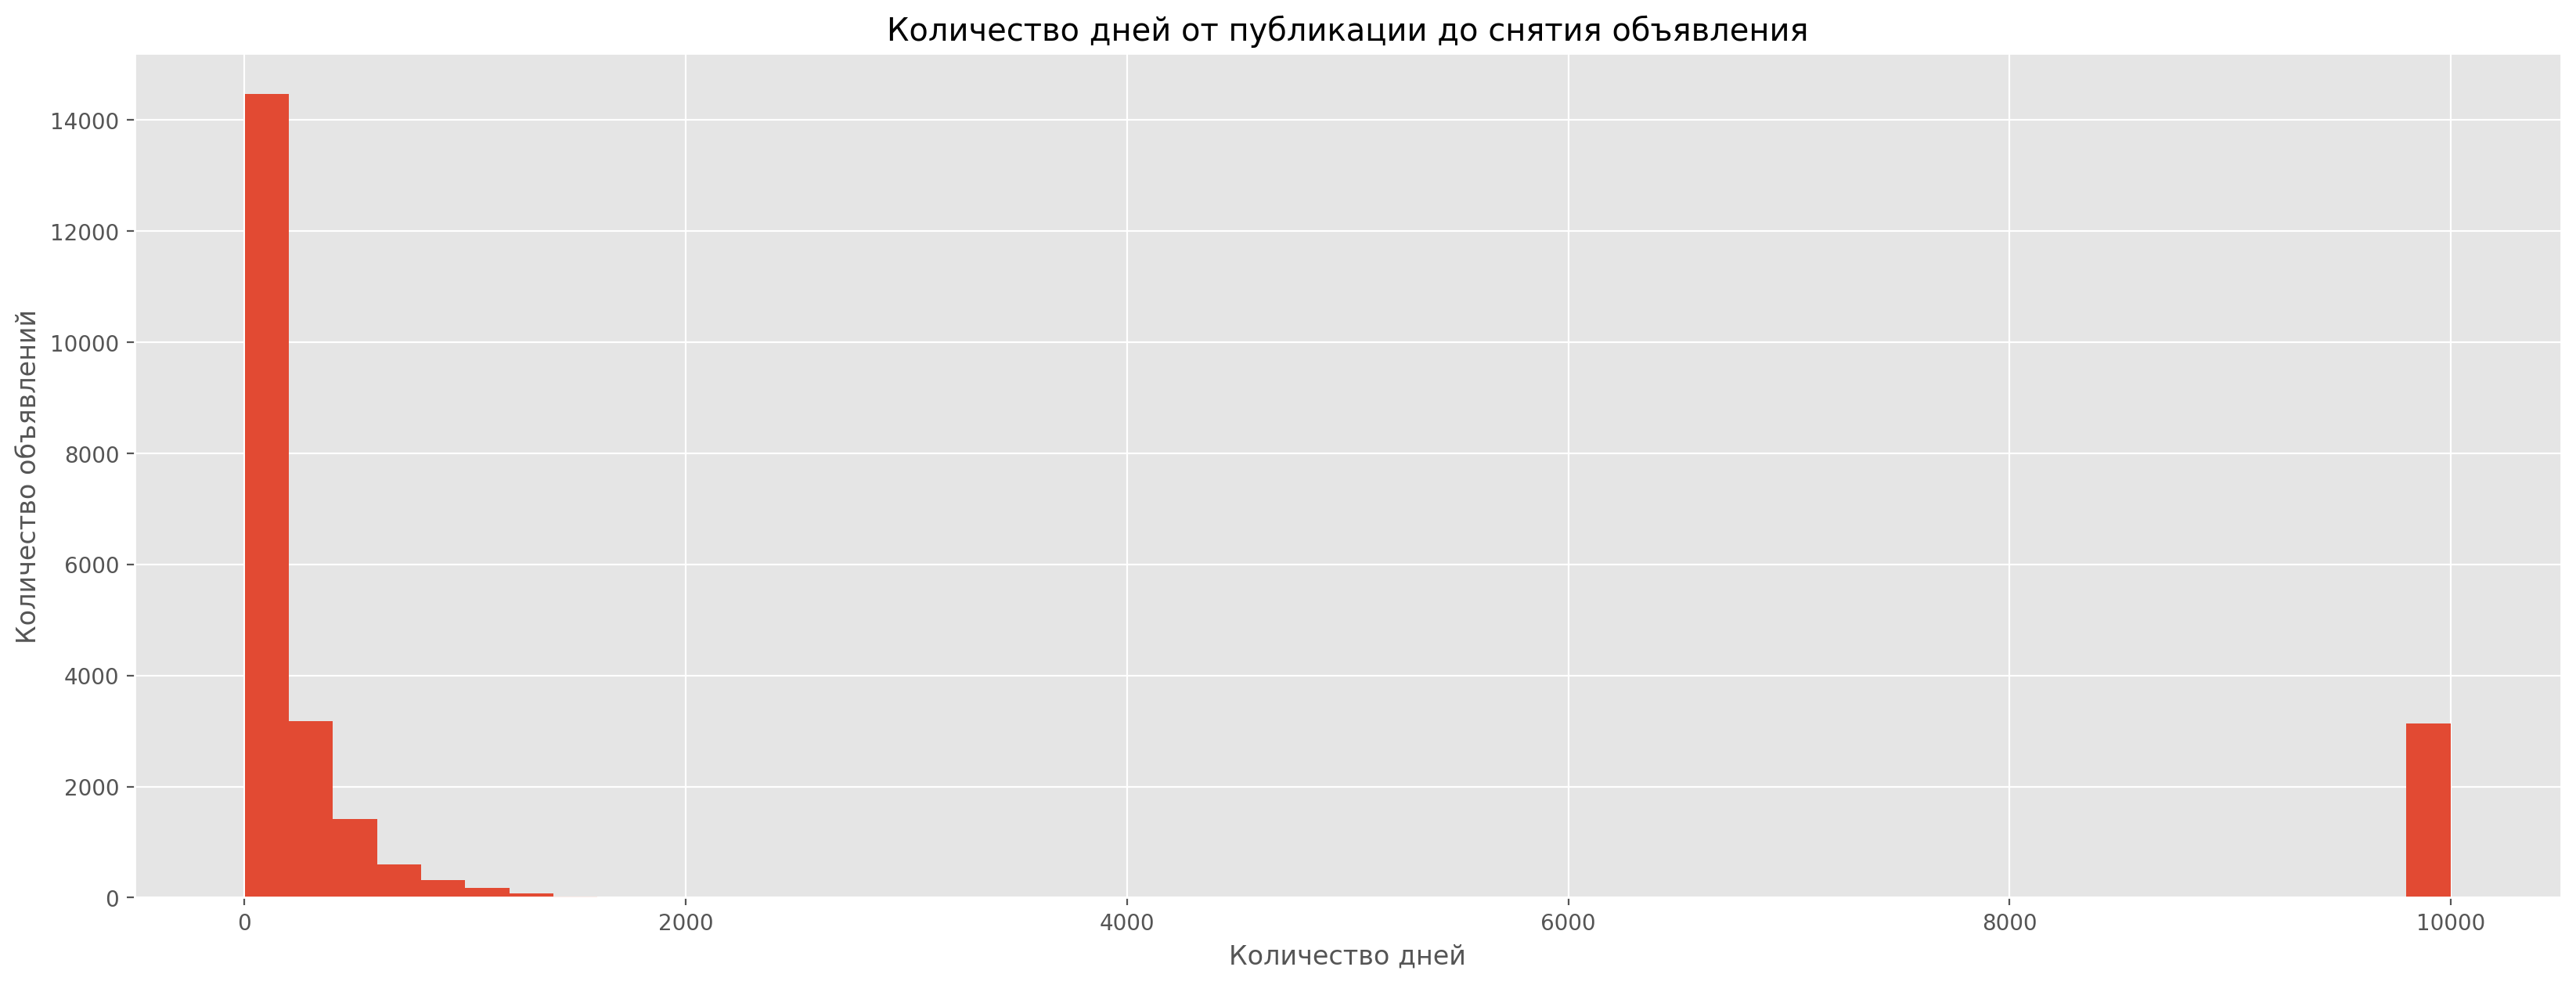

count    23379.000000
mean      1496.749134
std       3351.527151
min          1.000000
25%         45.000000
50%        124.000000
75%        389.000000
max       9999.000000
Name: days_exposition, dtype: float64

In [154]:
data['days_exposition'].plot(kind='hist', figsize=(20,7), grid=True,bins=50)
plt.title('Количество дней от публикации до снятия объявления')
plt.ylabel('Количество объявлений')
plt.xlabel('Количество дней')
plt.show()
data['days_exposition'].describe()

Основной объем значений расположен в диапазоне 1-100 дней.

Минимальный срок публикации - 1 день, макисимальный - 1580 дней.

**Медианное значение: 95 дней, среднее: 180 дней** (очевидно, экстримальные максимальные значения 'тянут наверх' среднее значение)

Начиная с 250-го дня, частота объявлений не достигает 500 и практически постоянно снижается. На 700-й день значения не достигают 200. *Ограничимся максимальным сроком публикации в 730 дней (два года)*, сохраним такие данные в переменной 'data_optimal_exposition' и посмотрим как изменятся средние показатели:

Число объявлений, снятых с публикации через два года и более: 3873


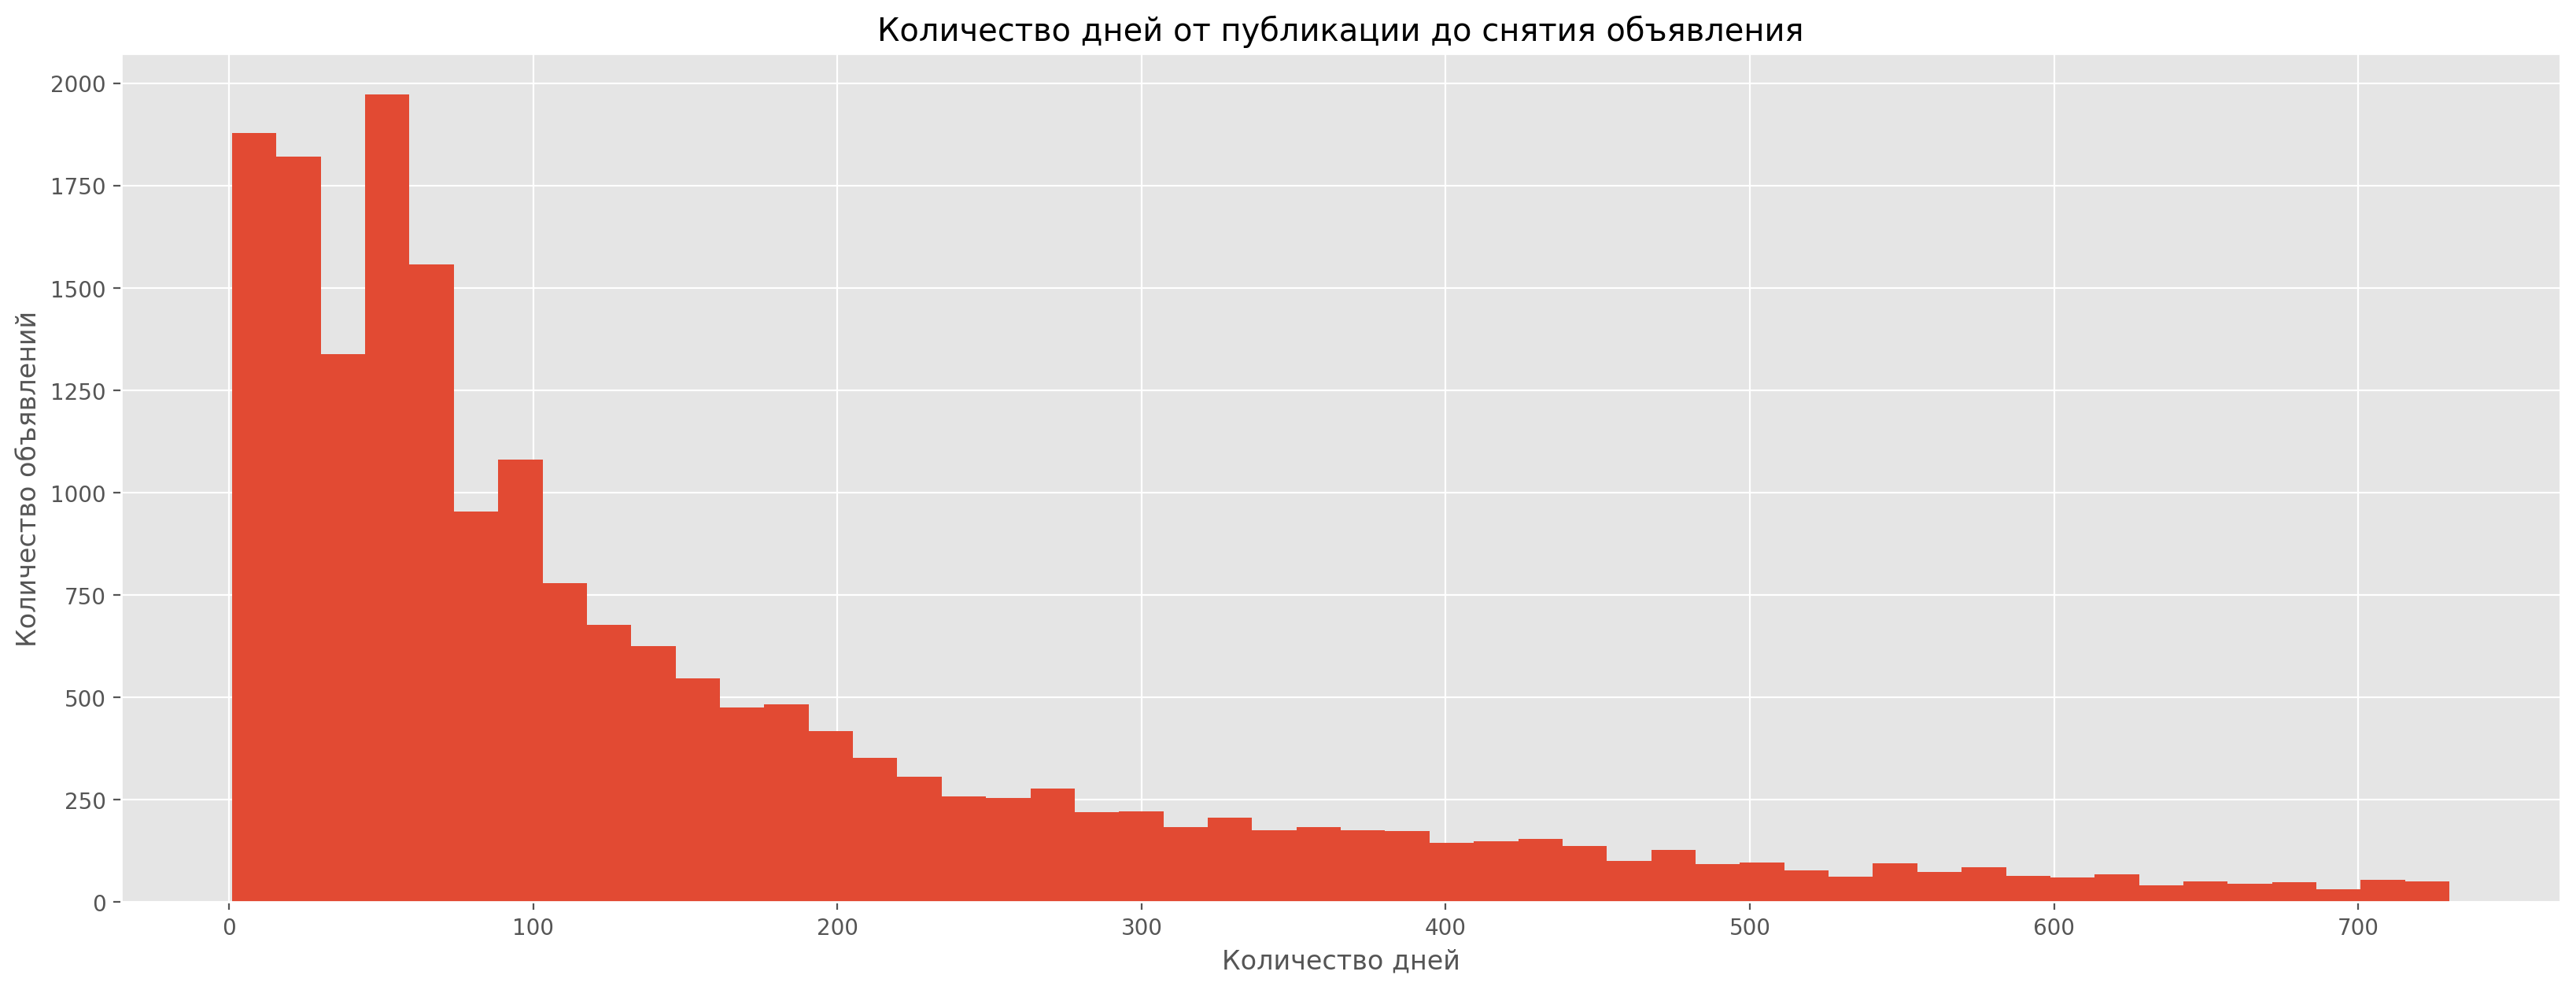

Характеристики столбца "days_exposition":


count    19506.000000
mean       150.747975
std        156.232051
min          1.000000
25%         43.000000
50%         90.000000
75%        207.000000
max        730.000000
Name: days_exposition, dtype: float64

In [159]:
print('Число объявлений, снятых с публикации через два года и более:', len(data.query('days_exposition >730')))
data_optimal_exposition = data.query('days_exposition <= 730')
data_optimal_exposition['days_exposition'].plot(kind='hist', figsize=(20,7), grid=True,bins=50)
plt.title('Количество дней от публикации до снятия объявления')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.show()
print('Характеристики столбца "days_exposition":')
data_optimal_exposition['days_exposition'].describe()

Среднее и медиана изменились - опустились до **150.7 и 90** соответственно. Основной объем значений по прежнему располагается в диапазоне 1-100. Посмотрим на пиковые значения в этом диапазоне.

In [156]:
data_optimal_exposition.groupby(by='days_exposition')['days_exposition'].count().sort_values(ascending=False).head(10)

days_exposition
45    870
60    536
7     232
30    207
90    198
4     175
3     157
5     151
14    143
9     142
Name: days_exposition, dtype: int64

Предполагаю, что выбивающиеся значения в 45 и 60 дней связаны с условиями размещения на платформе (например, истекает бесплатное размещение или наоборот, заканчивается срок платного). Опираясь на это предположение, считаем медианное значение типичной длительностью продажи. 

Итого:
* **чаще всего** объекты продаются за 90 дней
* **быстрые продажи** - до 90 дней
* **долгие продажи** - от 90 дней до двух лет
* **сверхдолгие продажи** - более двух лет

### Какие факторы больше всего влияют на общую стоимость объекта?

Пронализируем, как зависит цена от следующих факторов:
* общей площади
* жилой площади
* площади кухни
* количества комнат
* этажа, на котором расположена квартира (первый, последний, другой)
* даты размещения (день недели, месяц, год)

#### Зависимость от метража

##### Общая площадь

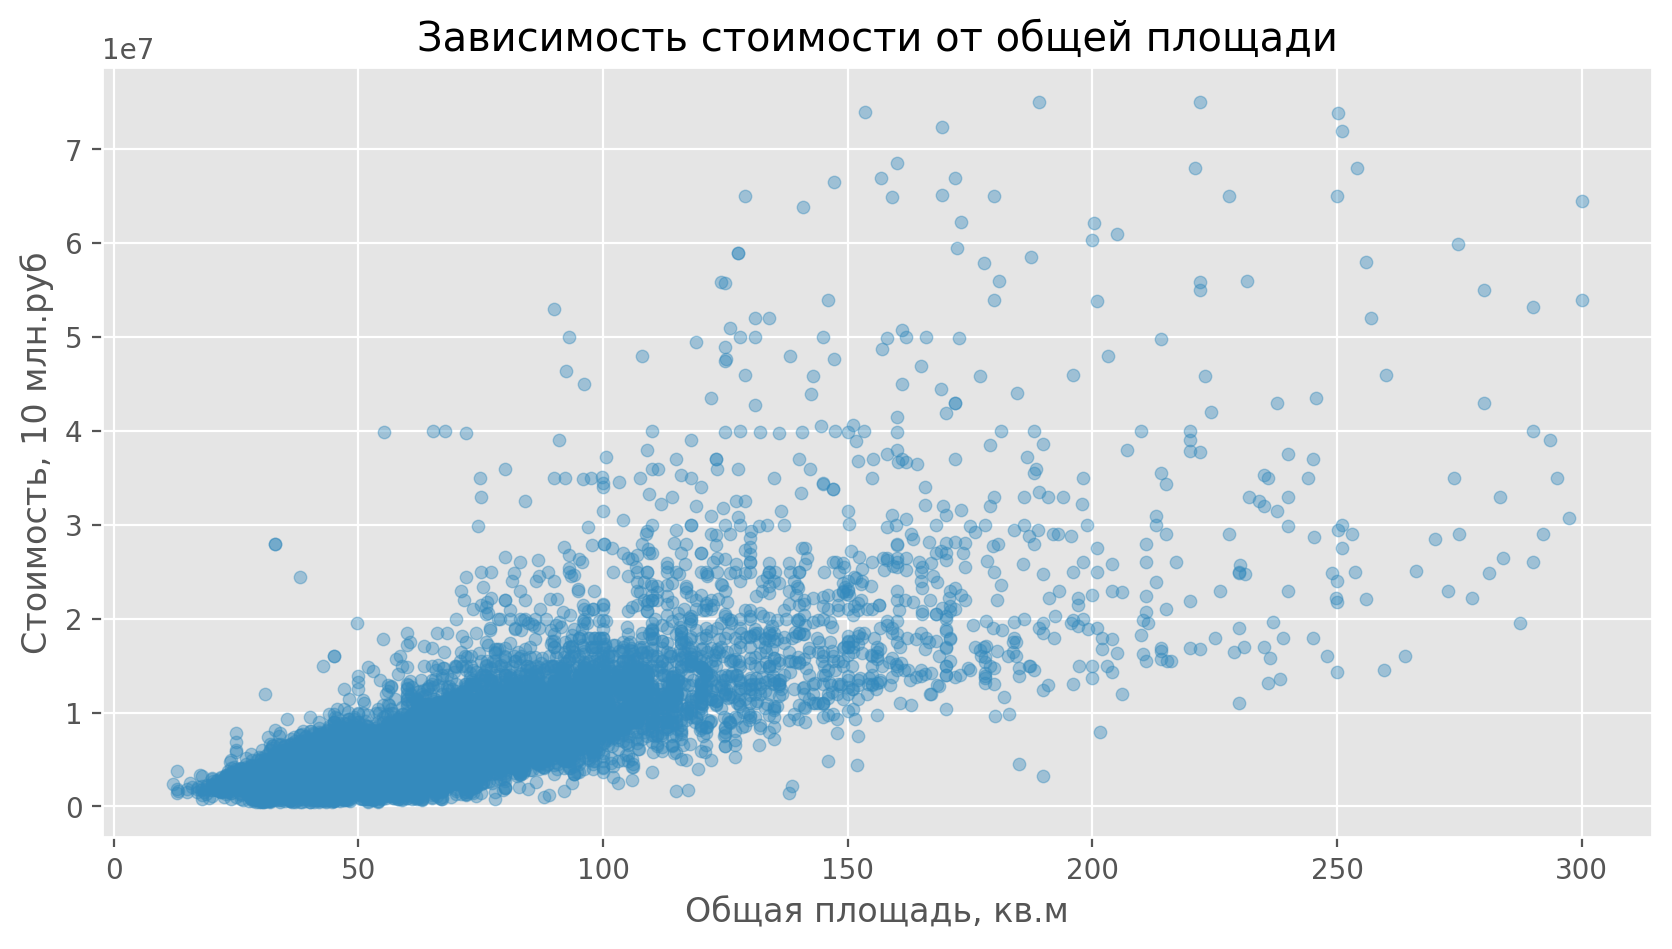

Коэффициент корреляции между общей площадью и ценой: 0.769


In [166]:
data.plot(x='total_area',
          y='last_price',
          kind='scatter',
          figsize=(10,5), 
          grid=True, 
          alpha=0.4, 
          xlabel ='Общая площадь, кв.м', 
          ylabel='Стоимость, 10 млн.руб',
         title='Зависимость стоимости от общей площади')
plt.show()
print('Коэффициент корреляции между общей площадью и ценой:', data['total_area'].corr(data['last_price']).round(3))

Наблюдаем положительную, достаточно выраженную **(0.769)** корреляцию. Встречаются аномалии - квартира менее 50 кв.м стоимостью около 30 млн., квартира ~180 кв.м. стоимостью до 5 млн., но в целом, **чем больше площадь - тем выше цена.** 

##### Жилая площадь

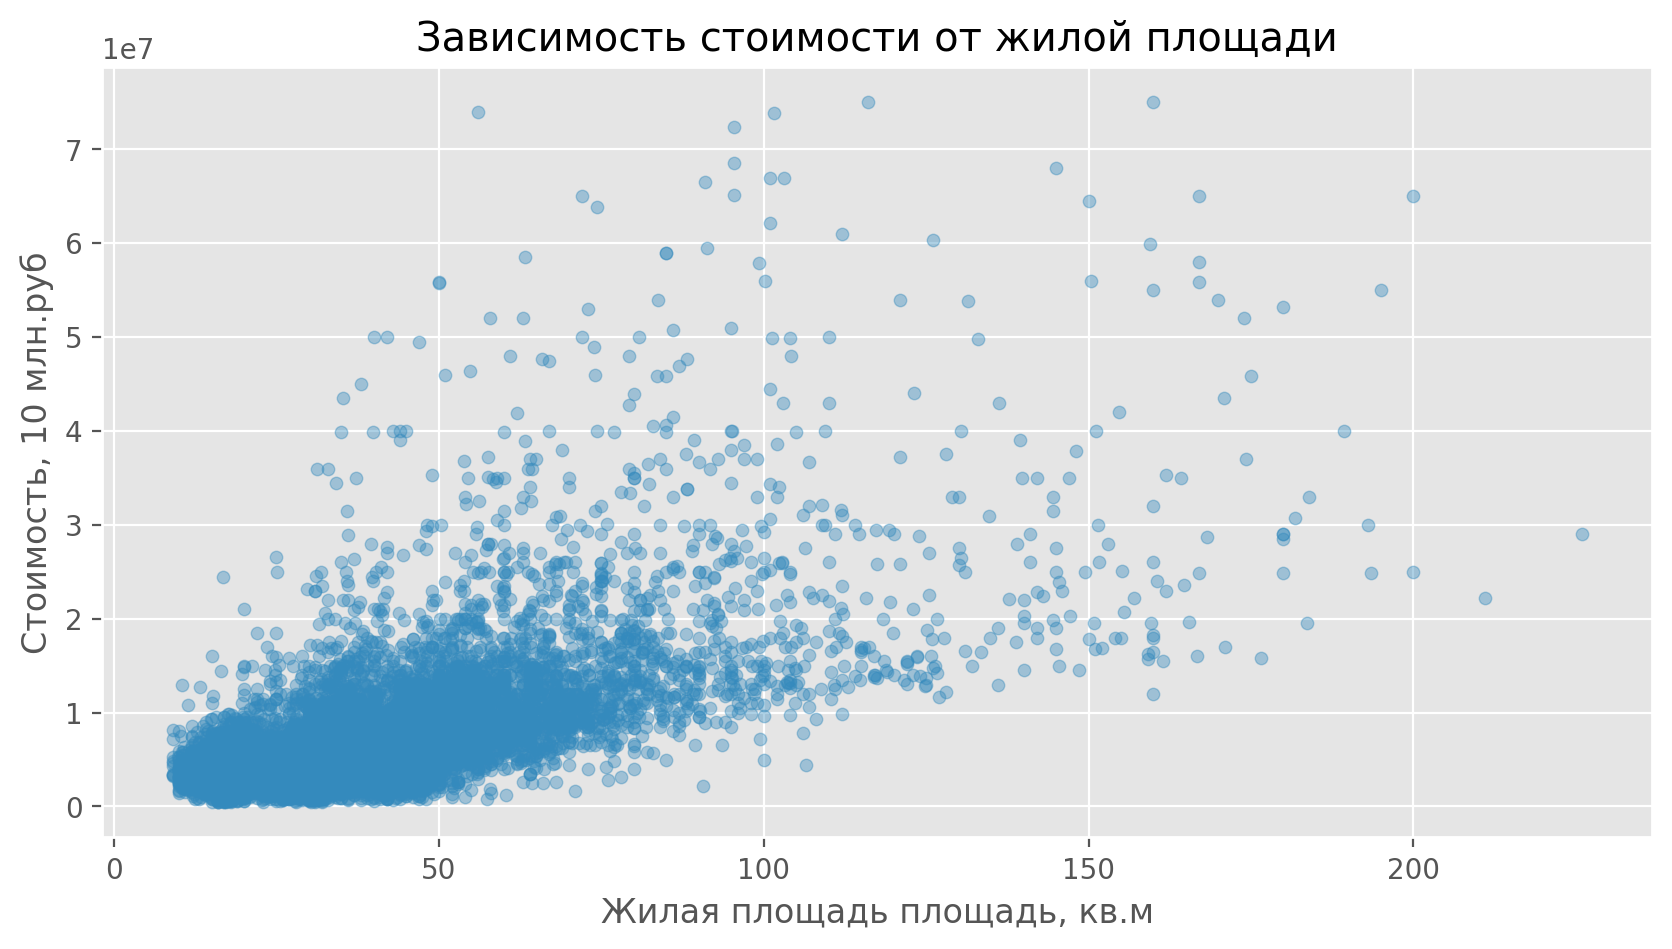

Коэффициент корреляции между жилой площадью и ценой: 0.675


In [168]:
data.plot(x='living_area',
          y='last_price', 
          kind='scatter', 
          figsize=(10,5),
          grid=True, 
          alpha=0.4, 
          xlabel ='Жилая площадь площадь, кв.м', 
          ylabel='Стоимость, 10 млн.руб',
          title='Зависимость стоимости от жилой площади')
plt.show()
print('Коэффициент корреляции между жилой площадью и ценой:', data['living_area'].corr(data['last_price']).round(3))

Для жилой площади корреляция со стоимостью выражена слабее, чем для общей: **0.675**. Общая тенденция (большая площадь=высокая цена) все еще  наблюдается, но здесь мы также видим следующее:

- если **общая площадь** объекта <50 кв.м. то его стоимость не превышает 10 млн.руб.(за редким исключением). Если размер <50 кв.м. имеет **жилая площадь**, то ее стоимость уже преимущественно лежит в пределах 20 млн.руб. Так же такие объекты могут стоит более 30 млн. руб., а объекты с общей площадью до 50кв.м. - нет

- для объектов с **жилой площадью 50-100 кв.м**. чаще встречается стоимсоть выше 50 млн., в то время как для объектов с такой же **общей площадью** такая стоимость - единичный случай

- объекты с **жилой площадью > 100 кв.м.** и объекты с такой же **общей площадью** имеют схожее распределение цены

##### Площадь кухни

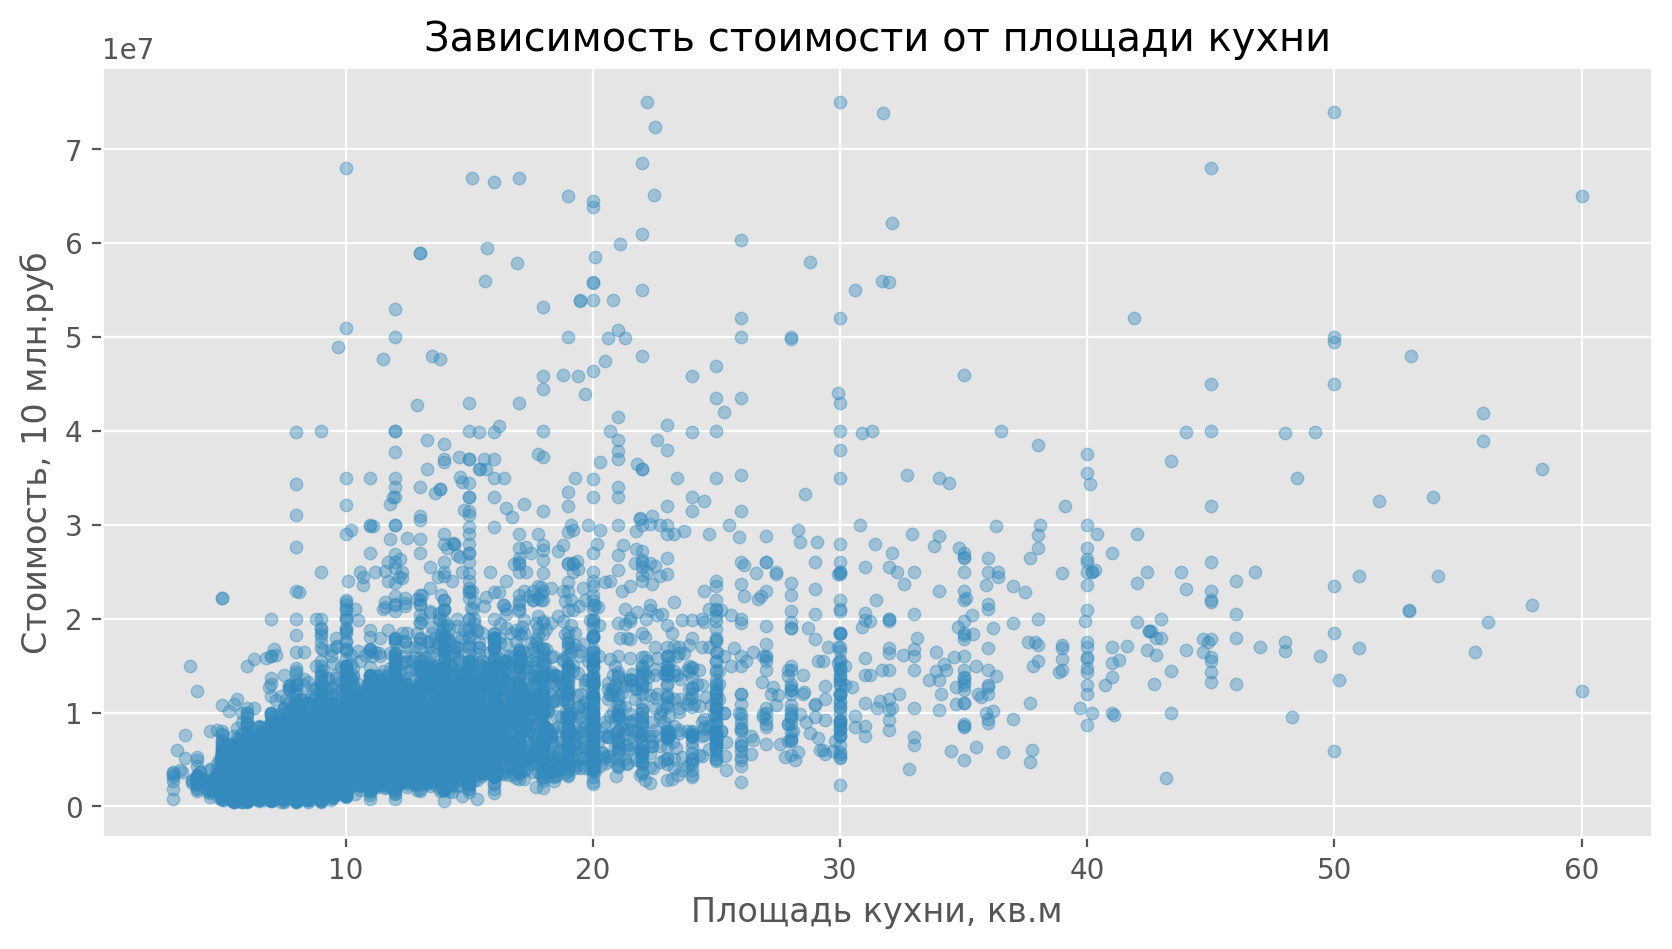

Коэффициент корреляции между площадью кухни и ценой: 0.581


In [170]:
data.plot(x='kitchen_area',
          y='last_price', 
          kind='scatter', 
          figsize=(10,5), 
          grid=True, 
          alpha=0.4,
          xlabel ='Площадь кухни, кв.м', 
          ylabel='Стоимость, 10 млн.руб',
          title='Зависимость стоимости от площади кухни')
plt.show()
print('Коэффициент корреляции между площадью кухни и ценой:', data['kitchen_area'].corr(data['last_price']).round(3))

Положительная корреляция все еще есть, но выражена еще слабее: **0,581**. Объекты с маленькими кухнями (до 5кв.м) практически никогда не стоят дороже 10 млн.руб, самый популярный размер кухни в нашем наборе данных - 10-20 кв.м, объекты с такими кухнями имеют большой диапазон цен - чаще всего они стоят до 20 млн.руб, но цены могу доходить и до 60 млн.руб

По анализу зависимости цены от площади можно отметить, что в **большей степени цена зависит от общей площади, площадь кухни и жилая - скорее сопутствующие факторы**

#### Зависимость от числа комнат

Коэффициент корреляции количества комнат и цены: 0.48


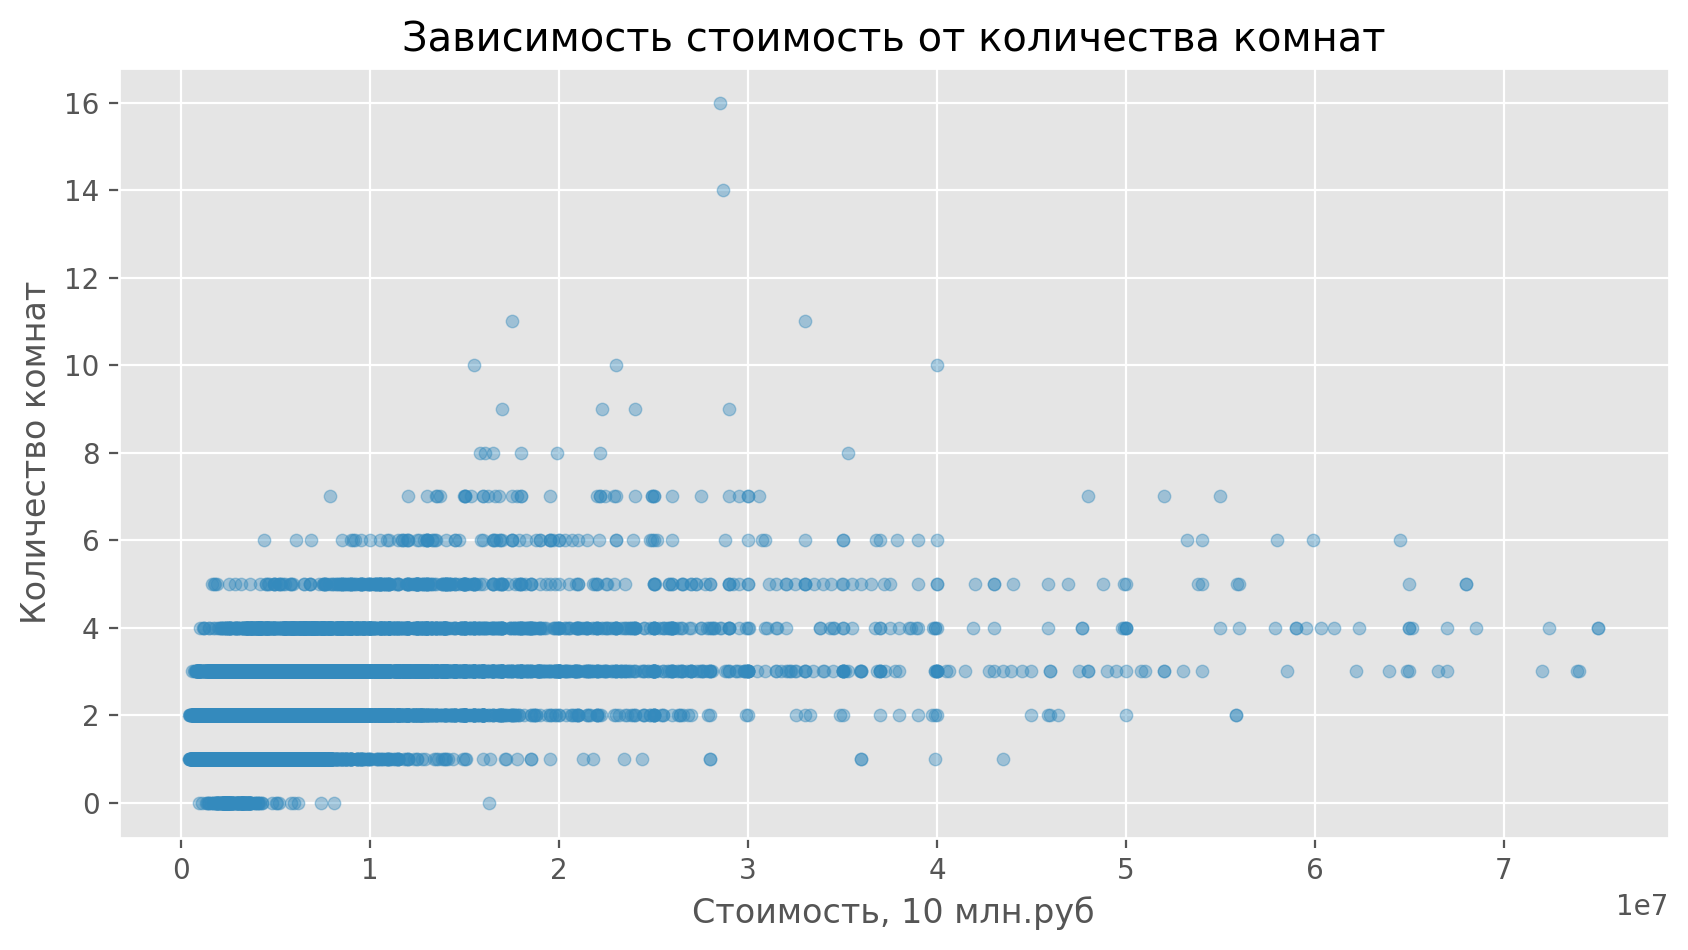

In [171]:
data.plot(x='last_price',
          y='rooms', 
          kind='scatter', 
          figsize=(10,5), 
          grid=True, 
          alpha=0.4,
          ylabel ='Количество комнат', 
          xlabel='Стоимость, 10 млн.руб',
          title ='Зависимость стоимость от количества комнат')

print('Коэффициент корреляции количества комнат и цены:', data['rooms'].corr(data['last_price']).round(3))

Наблюдаем положительный коэффициент корреляции: **0.48**. Корреляция выражена не явно, можем заметить, что в ценовом диапазоне до 10 млн.руб практически одинаково часто встречаются и однокомнатные, и двух-, и трех-, и даже четырехкомнатные объекты. Удивительным выглядит факт,что самые высокие цены не связаны с большим числом комнат: объекты стоимостью 40-80 млн.руб ограничиваются 7 комнатами максимум. Посмотрим на медианные и средние значения стоимости.

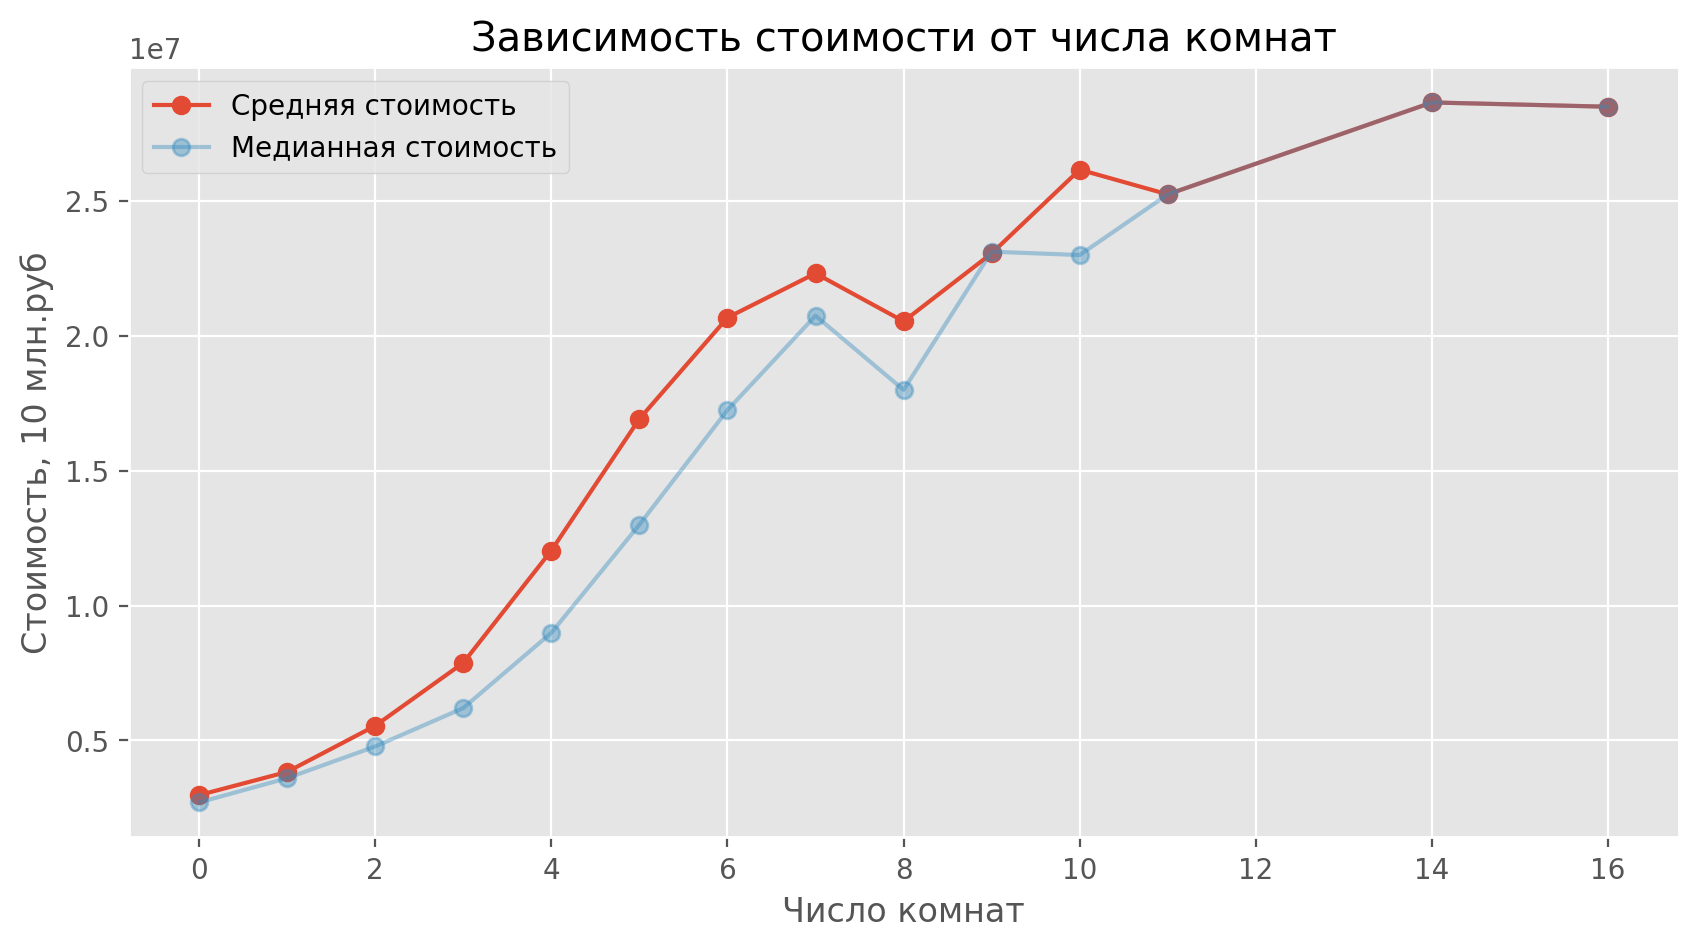

In [174]:
ax = data.pivot_table(index='rooms',values='last_price').plot(y='last_price', grid=True, style='o-', label='Средняя стоимость')
    
(
    data.pivot_table(index='rooms',values='last_price', aggfunc='median')
        .plot(y='last_price',
              kind='line',
              grid=True, 
              figsize=(10,5), 
              alpha= 0.4,
              style='o-', 
              ax=ax,
              label='Медианная стоимость', 
              title='Зависимость стоимости от числа комнат',
             xlabel='Число комнат',
             ylabel='Стоимость, 10 млн.руб')
);

Для квартир, имеющих до шести комнат, выделяется следующая закономерность: чем **больше комнат, тем выше и средняя и медианная стоимости**.

#### Зависимость от типа этажа

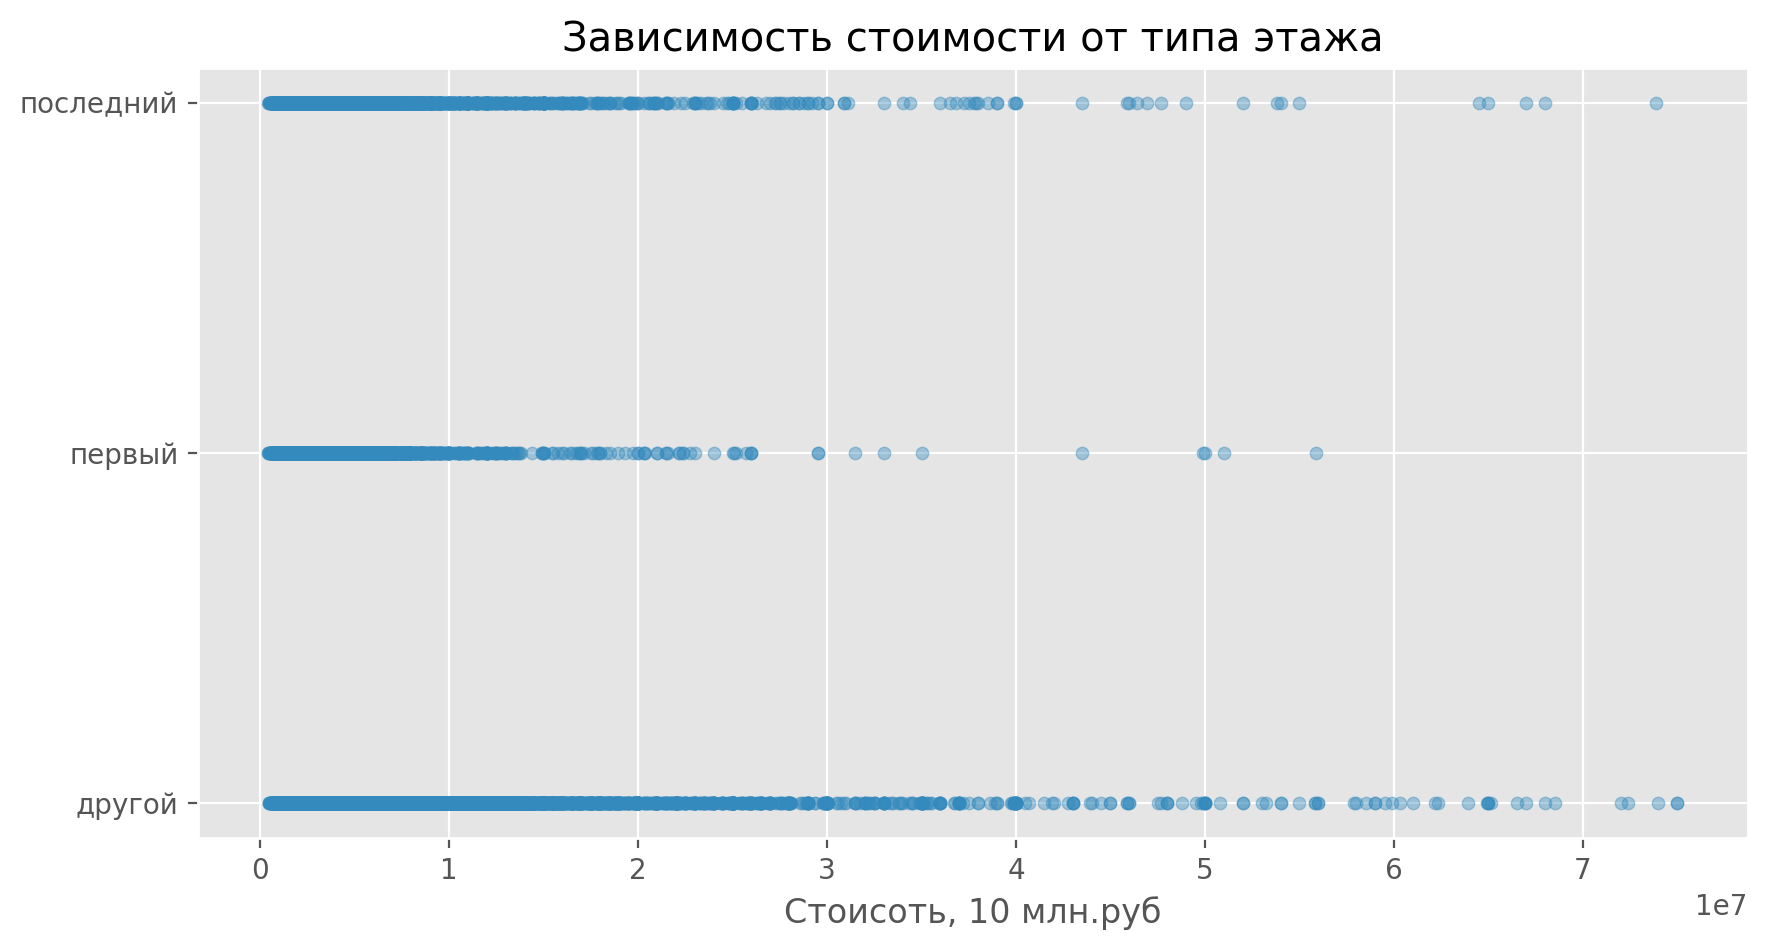

In [198]:
data.plot(x='last_price',
          y='floor_type', 
          kind='scatter', 
          figsize=(10,5), 
          grid=True, 
          alpha=0.4,
          title = 'Зависимость стоимости от типа этажа',
          ylabel ='', 
          xlabel='Стоисоть, 10 млн.руб',
         );

* **объекты с типом  этажа 'другой'** могут иметь любую стоимость, такие объекты всречаются во всех ценовых диапазонах. Более того, доргие объекты стоимостью > 30 млн. руб преимущественно располагаются только на этом типе этажа
* **объекты на первом этаже** редко стоят более 20 млн.руб, в основном сгруппированы в диапазоне 0-10 млн.руб. Встречается всего 7 вариантов дороже 30 млн.руб
* **объекты на последнем этаже** преимущественно расположены в диапазоне до 20 млн. руб., имеют более высокую чем объекты на первом плотность в диапазоне 20-30 млн. руб. Встречаются также объекты дороже 30 млн.руб

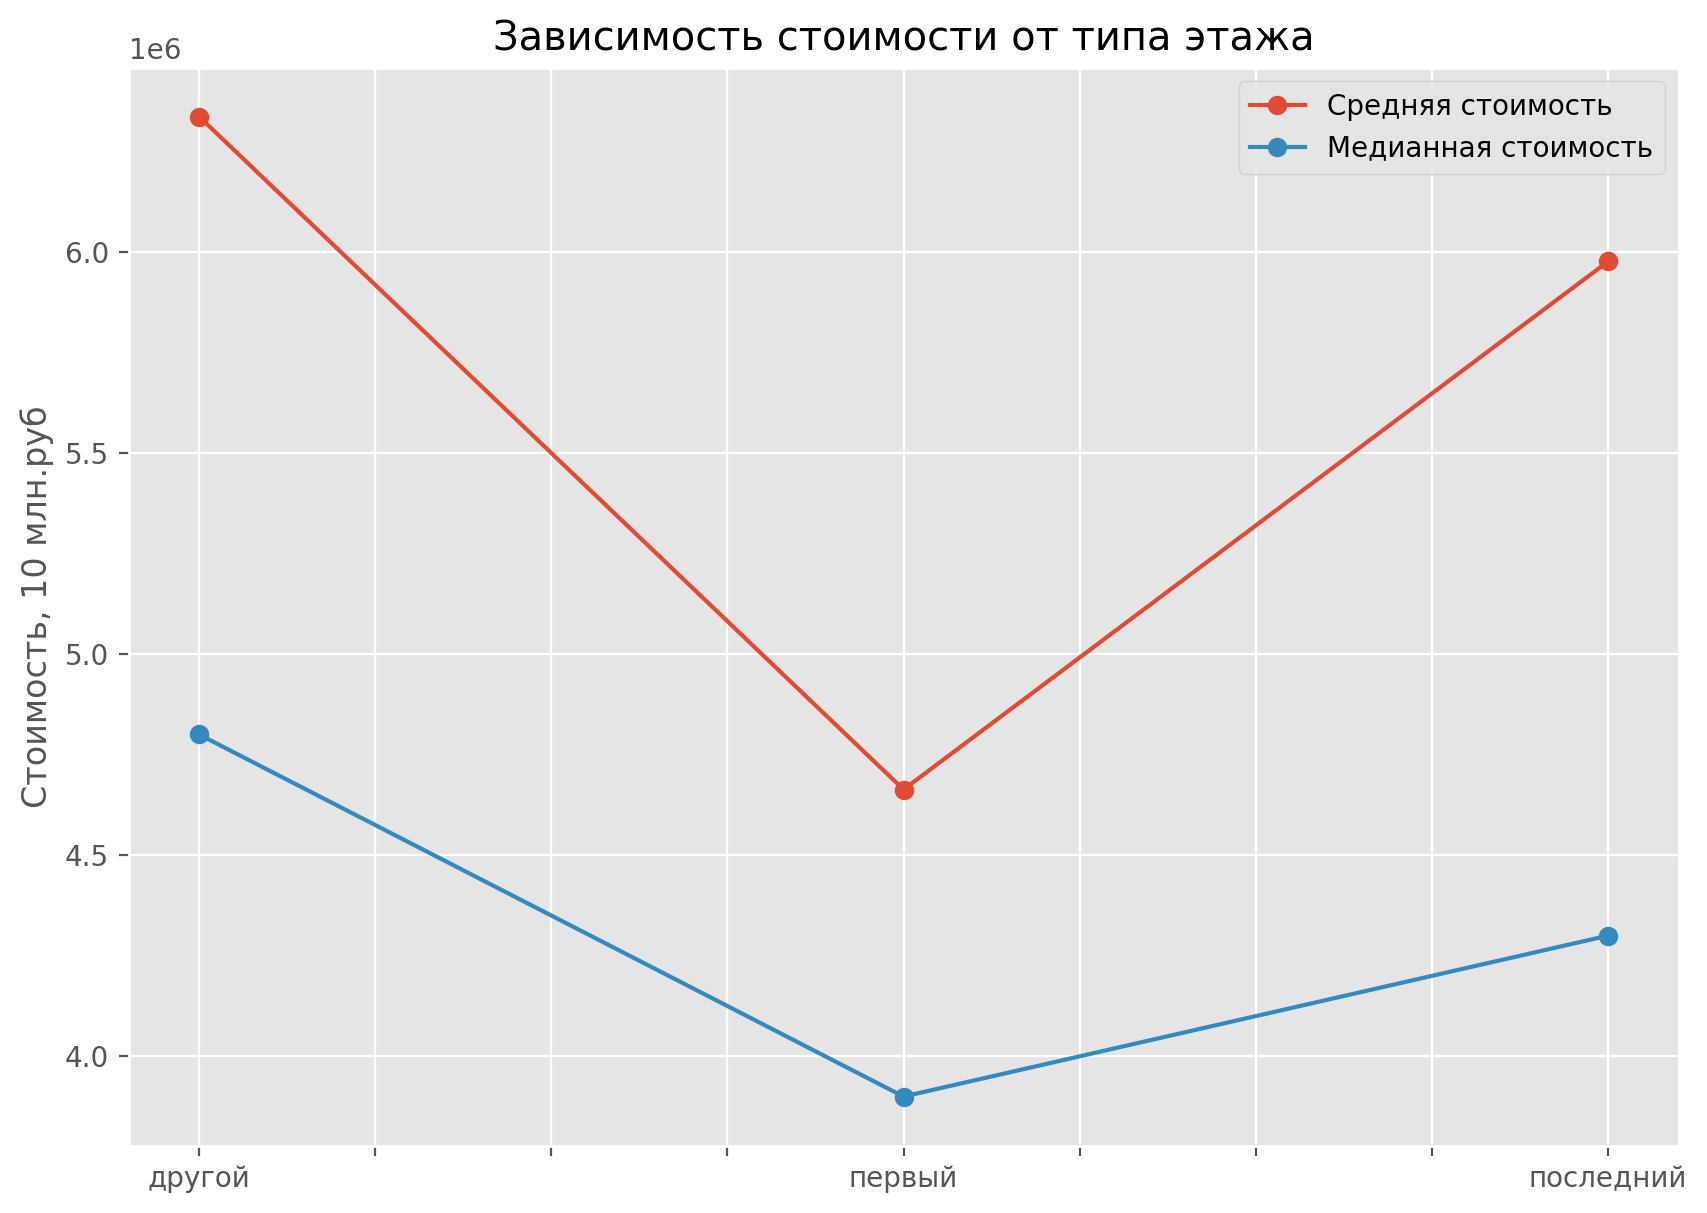

In [197]:
ax = data.pivot_table(index='floor_type',values='last_price').plot(y='last_price',
                                                                   grid=True, style='o-',label='Средняя стоимость')
    
data.pivot_table(index='floor_type',values='last_price', aggfunc='median')\
    .plot(y='last_price',
           kind='line',
           grid=True, 
           figsize=(10,7), 
           style='o-', 
           ax=ax,
           label='Медианная стоимость', 
           title='Зависимость стоимости от типа этажа',
           xlabel='',
           ylabel='Стоимость, 10 млн.руб');


Выводы из анализа средней и медианной стоимости:
* **этаж типа 'другой'** имеет самые высокие медианную и среднюю стоимости - около 4,75 млн.руб и 6,4 млн.руб соответсвенно
* у **последнего этажа** эти значения уже существенно ниже: медиана составляет около 4,3 млн.руб, а с реднее 6 млн.руб
* **первый этаж** имеет самые низкие значения - медианная стоимость не достигает 4 млн.руб, а средняя составляет около 4,6 млн.руб

#### Зависимость от даты публикации

##### Зависимость от дня недели

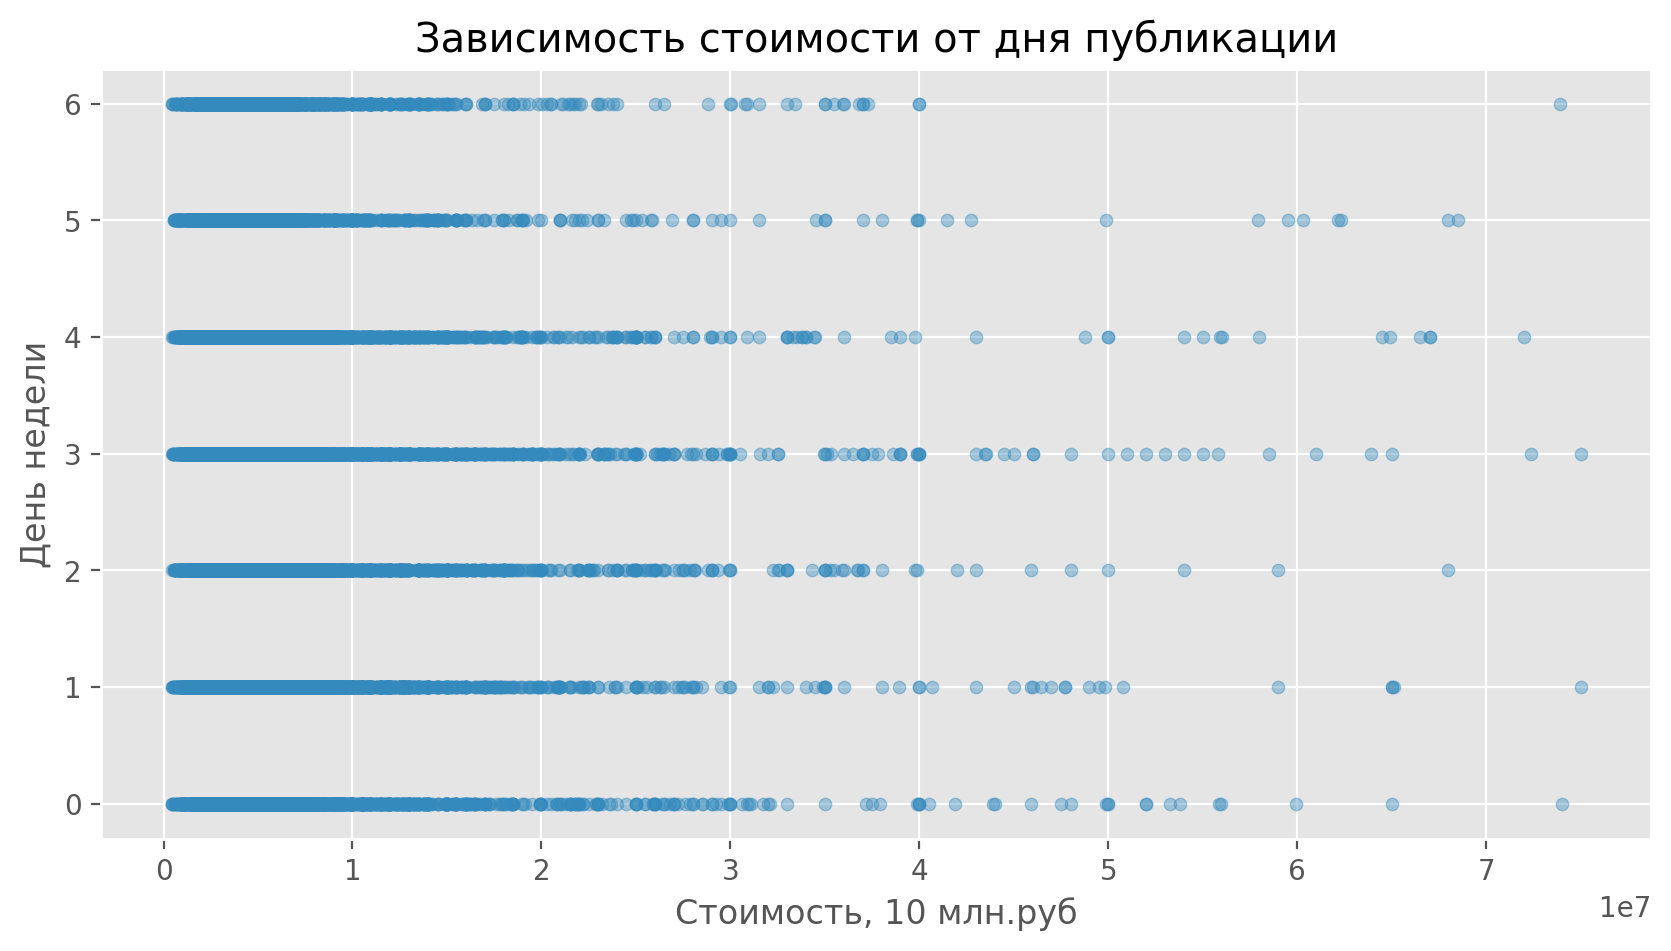

Коэффициент корреляции между днем недели и стоимостью: -0.014


In [201]:
data.plot(x='last_price',
          y='week_day', 
          kind='scatter', 
          figsize=(10,5), 
          grid=True, 
          alpha=0.4,
          title = 'Зависимость стоимости от дня публикации',
          ylabel ='День недели', 
          xlabel='Стоимость, 10 млн.руб',
         )
plt.show()
print('Коэффициент корреляции между днем недели и стоимостью:', data['week_day'].corr(data['last_price']).round(3))

Наблюдаем небольшой, слабо выраженный отрицательный коэффициент корреляции: **-0.014**

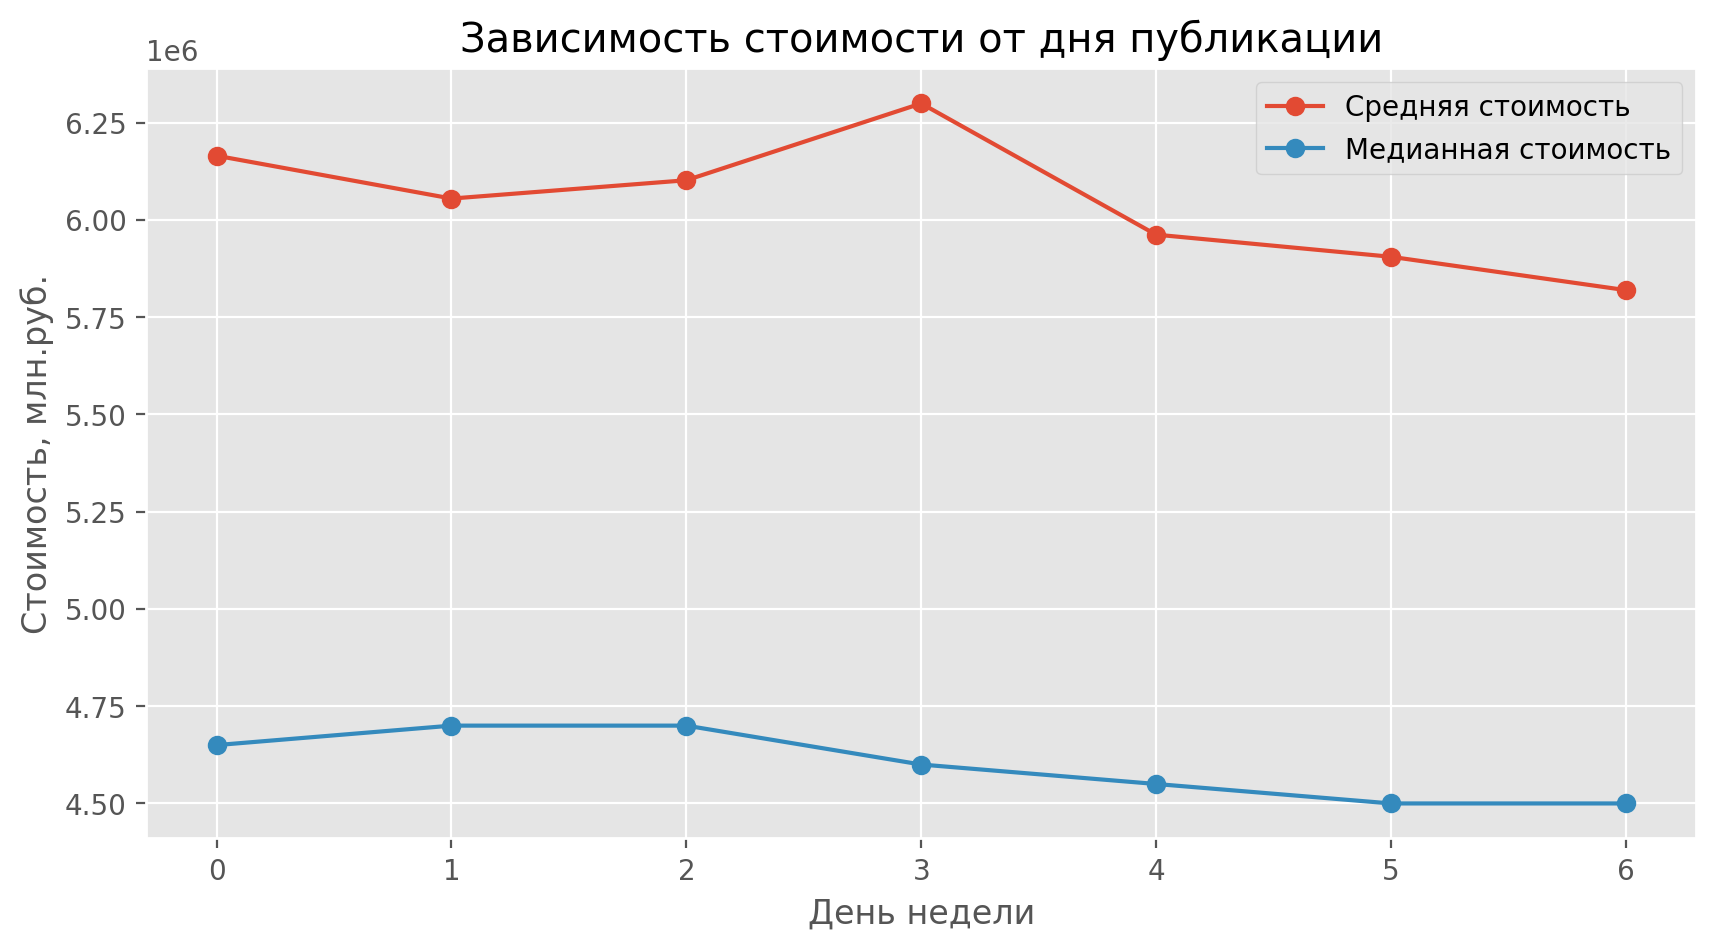

In [205]:
ax = data.pivot_table(index='week_day',values='last_price').plot(y='last_price', kind='line', style='o-', 
                                                                 label='Средняя стоимость')
(
    data.pivot_table(index='week_day', values='last_price',aggfunc='median')
        .plot(y='last_price',
              kind='line', 
              ax=ax,
              figsize=(10,5),
              style='o-', 
              label='Медианная стоимость',
              grid=True, 
              ylabel ='Стоимость, млн.руб.', 
              xlabel='День недели',
              title='Зависимость стоимости от дня публикации')
);

Видимой зависимость от дня недели публикации **не наблюдается**.

##### Зависимость от месяца публикации

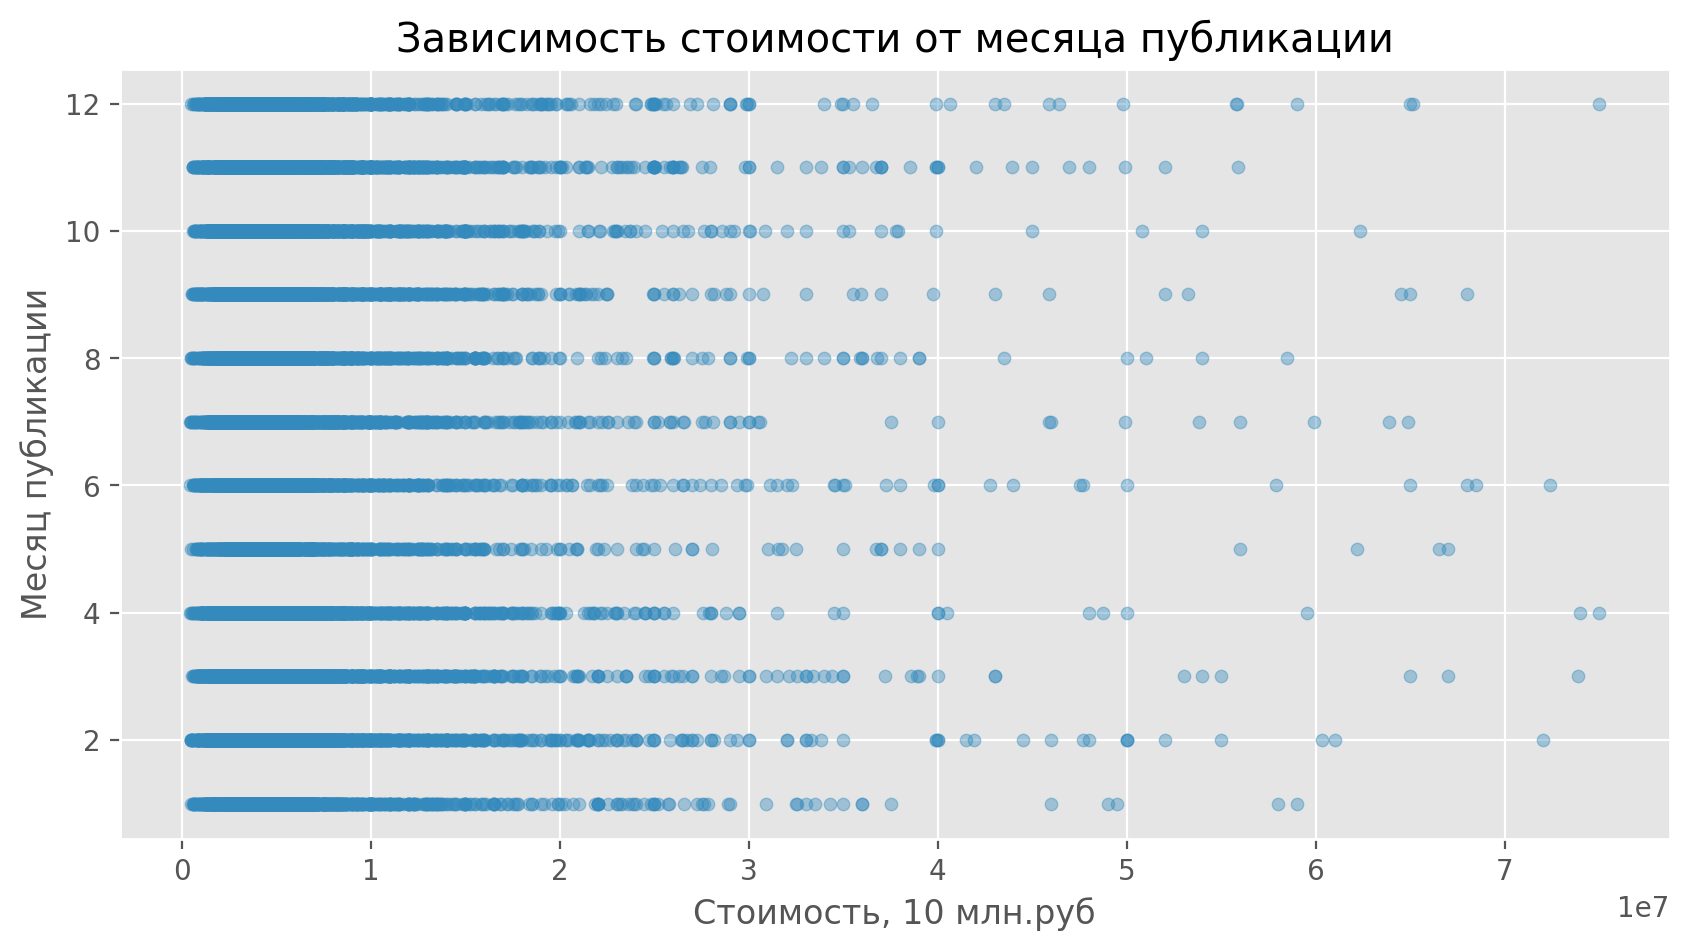

Коэффициент корреляции между месяцем публикации и стоимостью: 0.004


In [208]:
data.plot(x='last_price',
          y='month', 
          kind='scatter', 
          figsize=(10,5), 
          grid=True, 
          alpha=0.4,
          ylabel ='Месяц публикации', 
          xlabel='Стоимость, 10 млн.руб',
          title = 'Зависимость стоимости от месяца публикации'
         )
plt.show()
print('Коэффициент корреляции между месяцем публикации и стоимостью:', data['month'].corr(data['last_price']).round(3))

Коэффициент корреляции практически нулевой: **0.004**. Можно сказать, что зависимости нет.

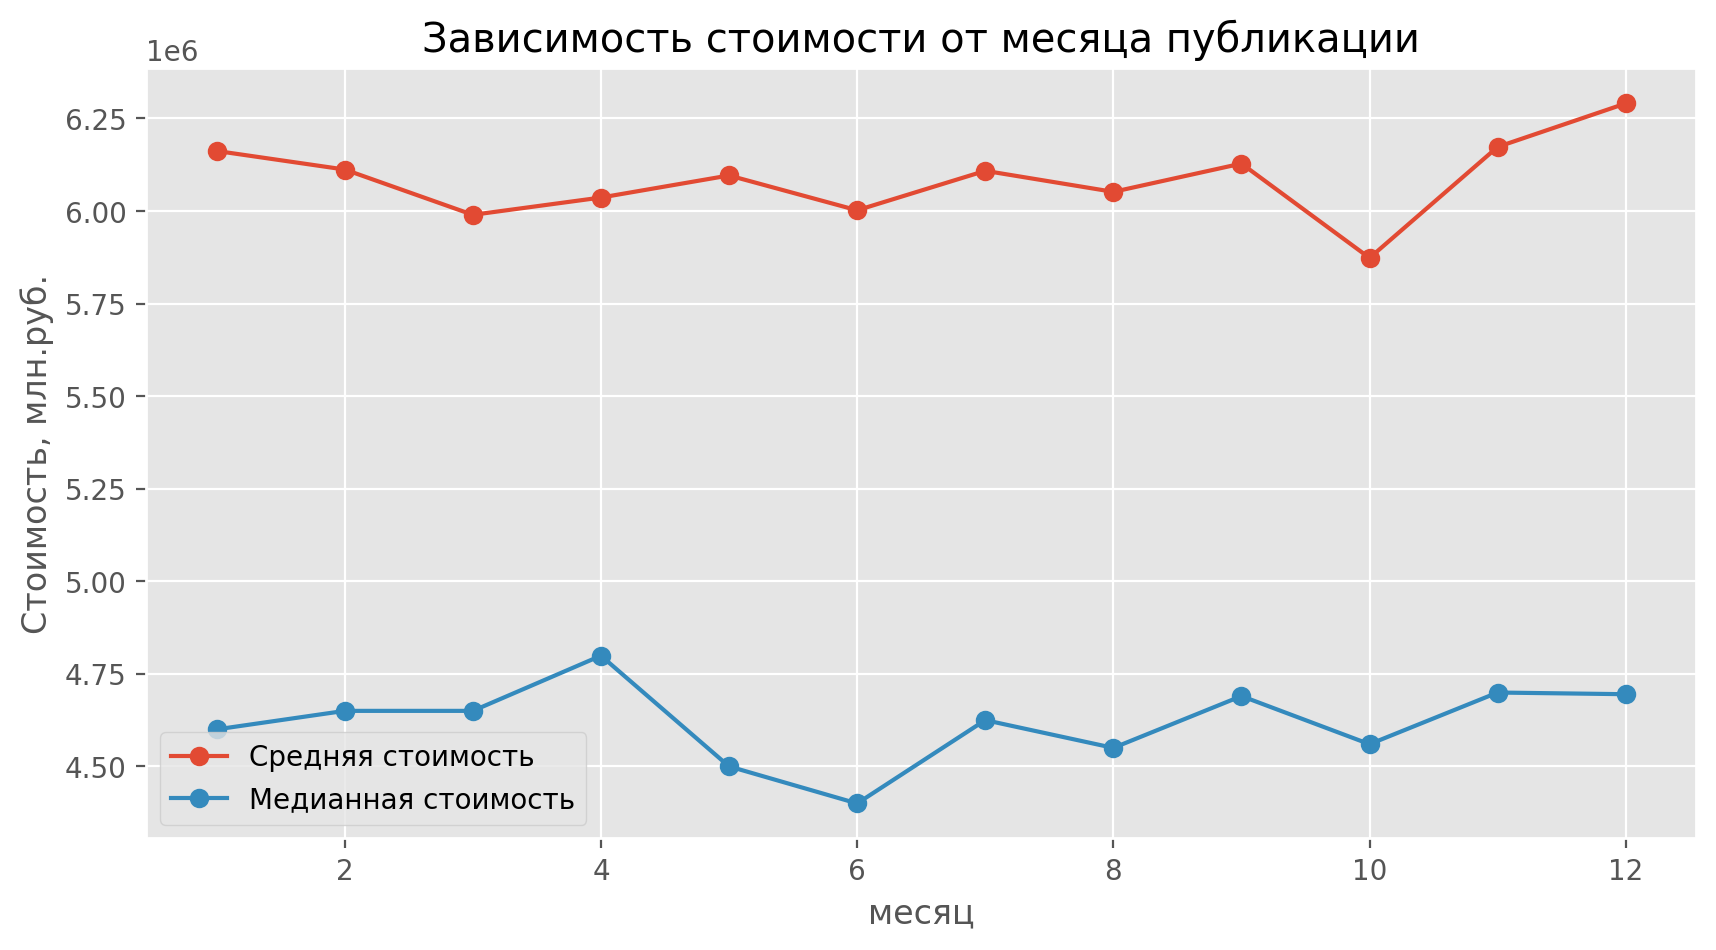

In [211]:
ax = data.pivot_table(index='month',values='last_price').plot(y='last_price', kind='line', style='o-', label='Средняя стоимость')
(
    data.pivot_table(index='month', values='last_price',aggfunc='median')
        .plot(y='last_price',
              kind='line', 
              ax=ax,
              figsize=(10,5),
              style='o-', 
              label='Медианная стоимость',
              grid=True, 
              ylabel ='Стоимость, млн.руб.', 
              xlabel='месяц',
              title='Зависимость стоимости от месяца публикации')
);

##### Зависимость от года публикации

In [212]:
print('Коэффициент корреляции количеством комнат и ценой:', data['year'].corr(data['last_price']).round(3))

Коэффициент корреляции количеством комнат и ценой: -0.051


Наблюдаем слабо выраженный отрицательный процент корреляции: **-0.051**.

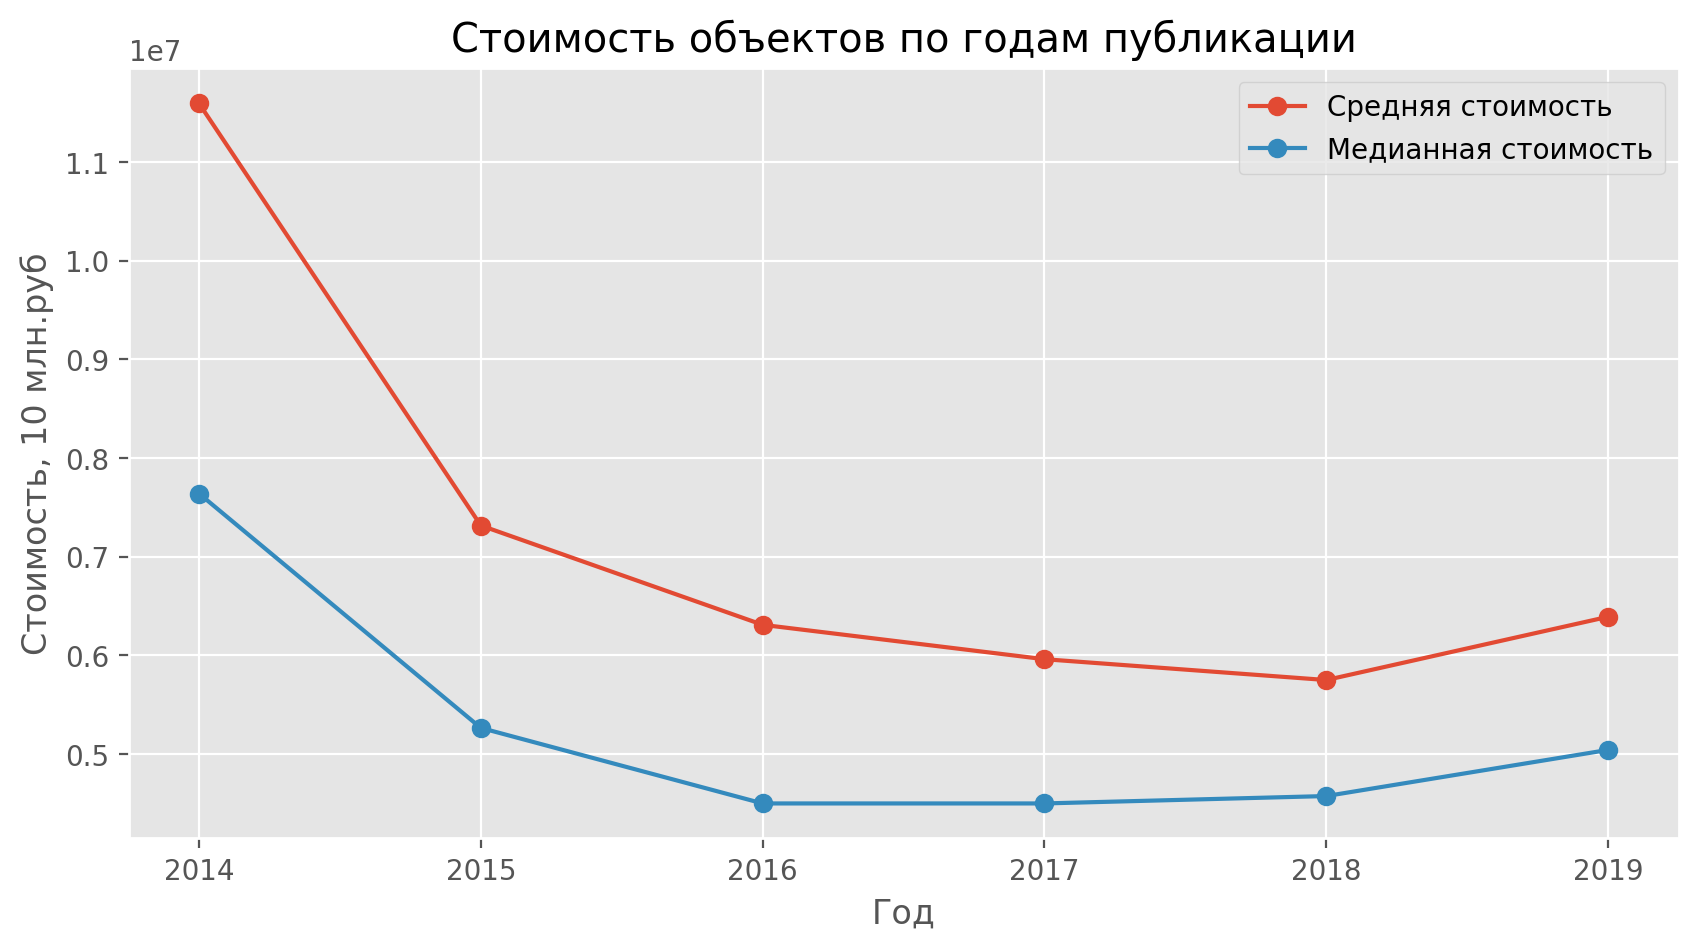

In [215]:
ax = data.pivot_table(index='year',values='last_price').plot(y='last_price', kind='line', style='o-', label='Средняя стоимость')
(
    data.pivot_table(index='year', values='last_price',aggfunc='median')
        .plot(y='last_price',
              kind='line', 
              ax=ax,
              figsize=(10,5),
              style='o-', 
              label='Медианная стоимость',
              grid=True, 
              ylabel ='Стоимость, 10 млн.руб', 
              xlabel='Год',
              title='Стоимость объектов по годам публикации')
);

Наблюдаем резкое падение стоимости относительно 2014 г. Ранее выявили, что стоимость объекта тесно связана с его площадью, посмотрим, как менялись средние и медианные значения общей площади в каждом году:

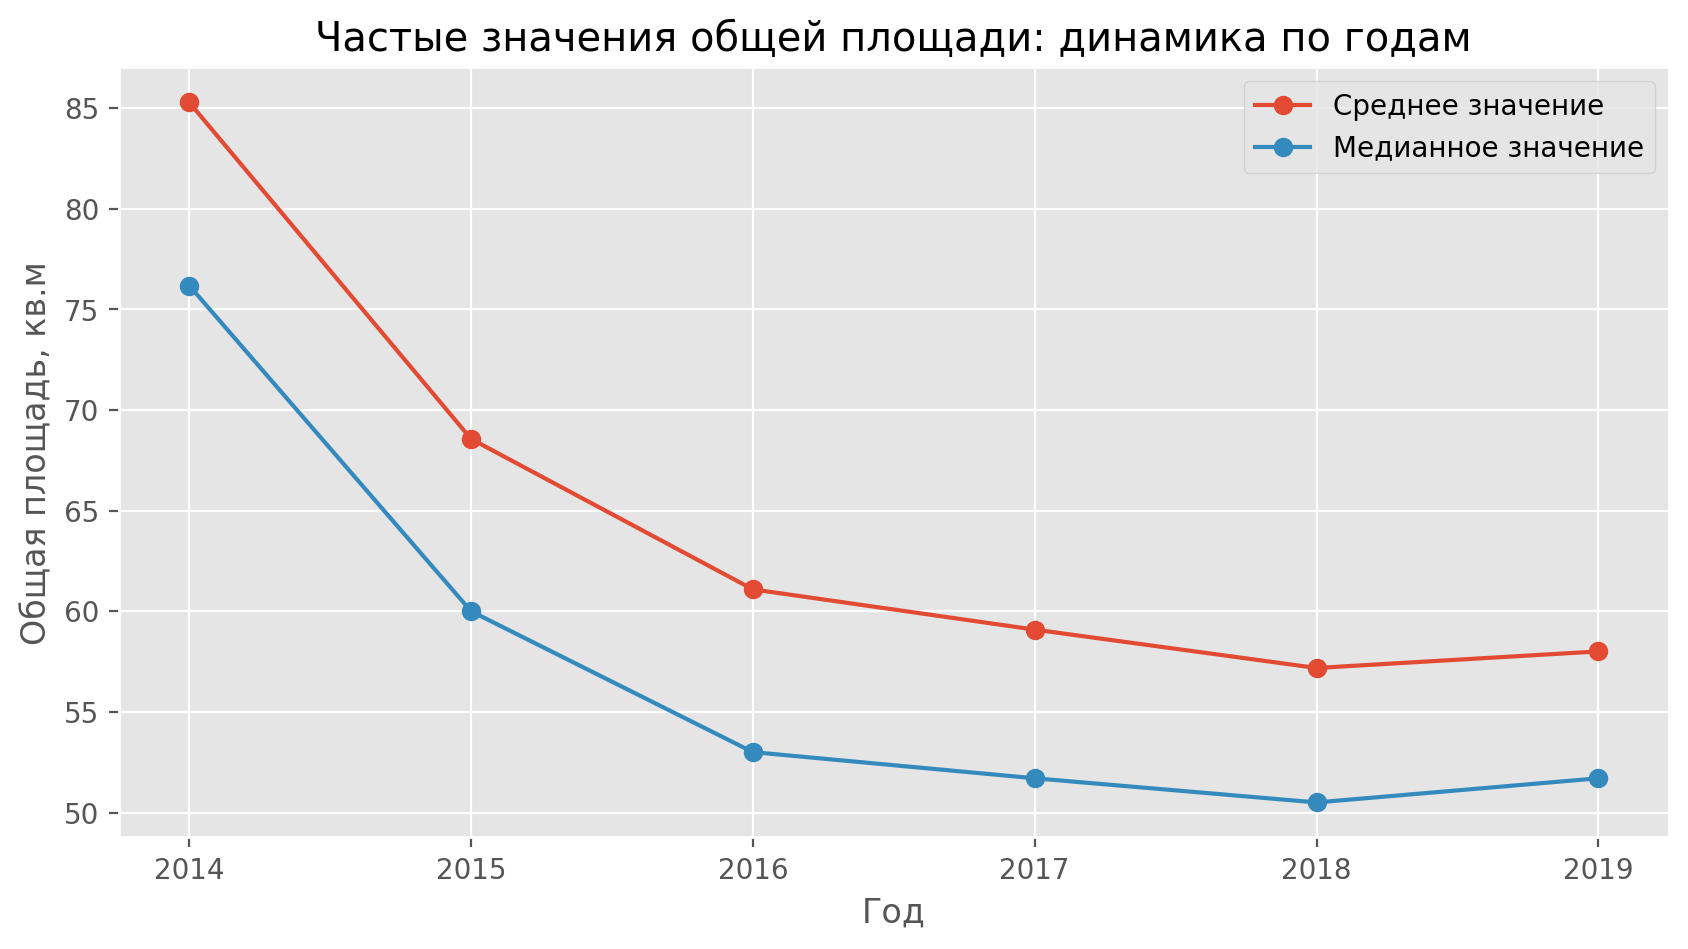

In [221]:
ax = data.pivot_table(index='year',values='total_area').plot(y='total_area', kind='line', style='o-', label='Среднее значение')
(
    data.pivot_table(index='year', values='total_area',aggfunc='median')
        .plot(y='total_area',
              kind='line', 
              ax=ax,
              figsize=(10,5),
              style='o-', 
              label='Медианное значение',
              grid=True, 
              ylabel ='Общая площадь, кв.м', 
              xlabel='Год',
              title='Частые значения общей площади: динамика по годам')
);

График зависимости от площади очень похож на график зависимости от цены - наблюдаем такое же резкое падение к 2015 г., небольшой прирост в 2018-2019. Цены снижаются вслед за снижением средних размеров площади.

**Самые высокие медианные и средние значения** цены наблюдаются у объявлений, опубликованных в 2014 году.

В 2015 году резко упали средние и медианные значения площади, если в 2014 г. средняя площадь продаваемых объектов составляла 85 кв.м, то в 2015 это значение составляет 70 кв.м. Такие негативные изменения неизбежно влекут за собой понижение средней стоимости от 11.5 млн к 7.5 млн. Медианная стоимость тоже соразмерно понижается.

Влоть до 2018 года средние размеры площади продолжали уменьшаться, средняя стоимость вслед за ними.

**В период с 2018 по 2019 и средняя, и медианная площади возросли**, цены, соответственно тоже показали прирост - средня цена около 6.5 млн.руб, медиана порядка 5 млн.руб

### Топ-10 городов с самым большим числом объявлений: анализ стоимости квадратного метра

                   per_square_price
locality_name                      
санкт-петербург           112949.78
пушкин                    102904.21
деревня кудрово            92473.55
поселок парголово          90205.42
поселок мурино             85602.71
поселок шушары             78577.02
колпино                    75352.48
гатчина                    68746.15
всеволожск                 68719.32
выборг                     58238.14


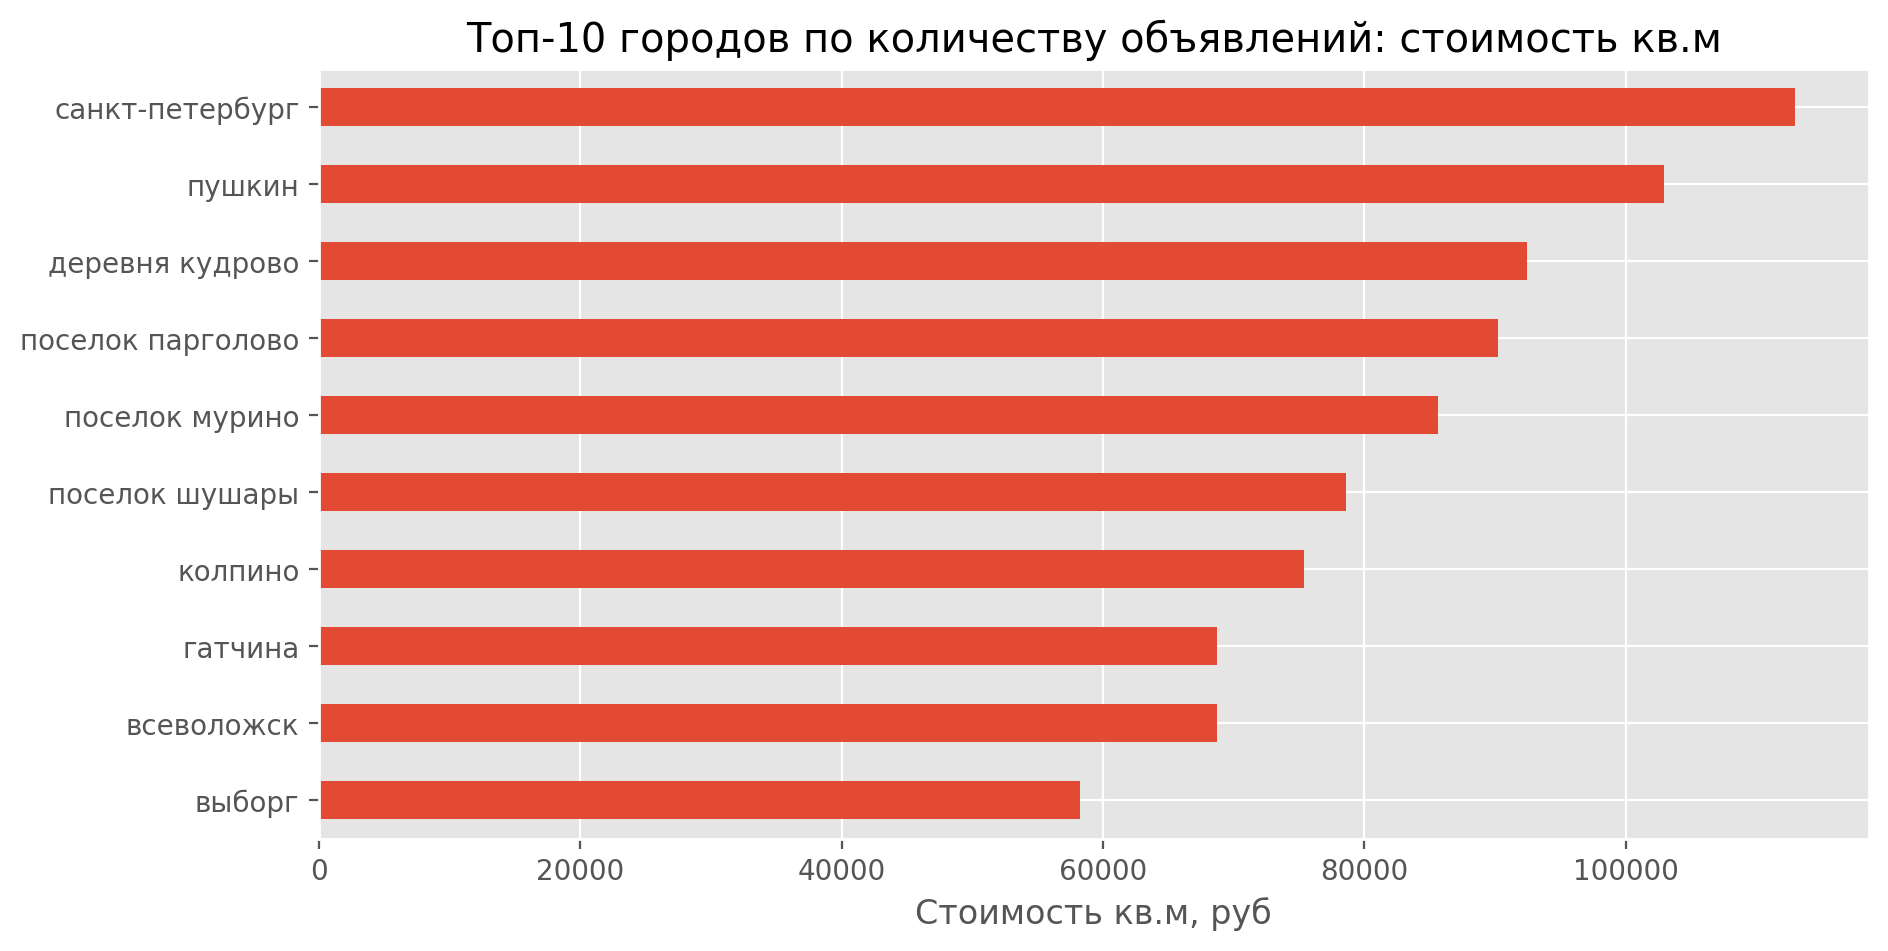

In [227]:
# создание переменной, содержащей название локаций и количество их значений, срез первых 10: 
top_10_cities = data['locality_name'].value_counts()[:10]

# создание сводной таблицы: срез исходной таблицы с условием'locality_name' содержит индексы 'locality_name',
# подсчет средней цены за кв.м. по выбранным локациям и сортировка по убыванию цены:
top_10 = data.query('locality_name in @top_10_cities.index')\
.pivot_table(index='locality_name',values='per_square_price')\
.sort_values(by='per_square_price', ascending= False)
#округление полученных цен до двух знаков после запятой:
top_10['per_square_price'] = top_10['per_square_price'].round(2)

print(top_10)
top_10.sort_values(by='per_square_price').plot(kind='barh', figsize=(10,5), legend=False)
plt.title('Топ-10 городов по количеству объявлений: стоимость кв.м')
plt.xlabel('Стоимость кв.м, руб')
plt.ylabel('')
plt.show()

В топ ожидаемо вошел Санкт-Петербург и близкие к нему города и поселки.

Самая высокая цена одного кв.м. в столице области - Санкт-Петербурге, 112.949 руб.

Замыкает рейтинг Выборг с ценой 58.238 руб./кв.м.

### Санкт-Петербург: зависимость стоимости от расстояния до центра города

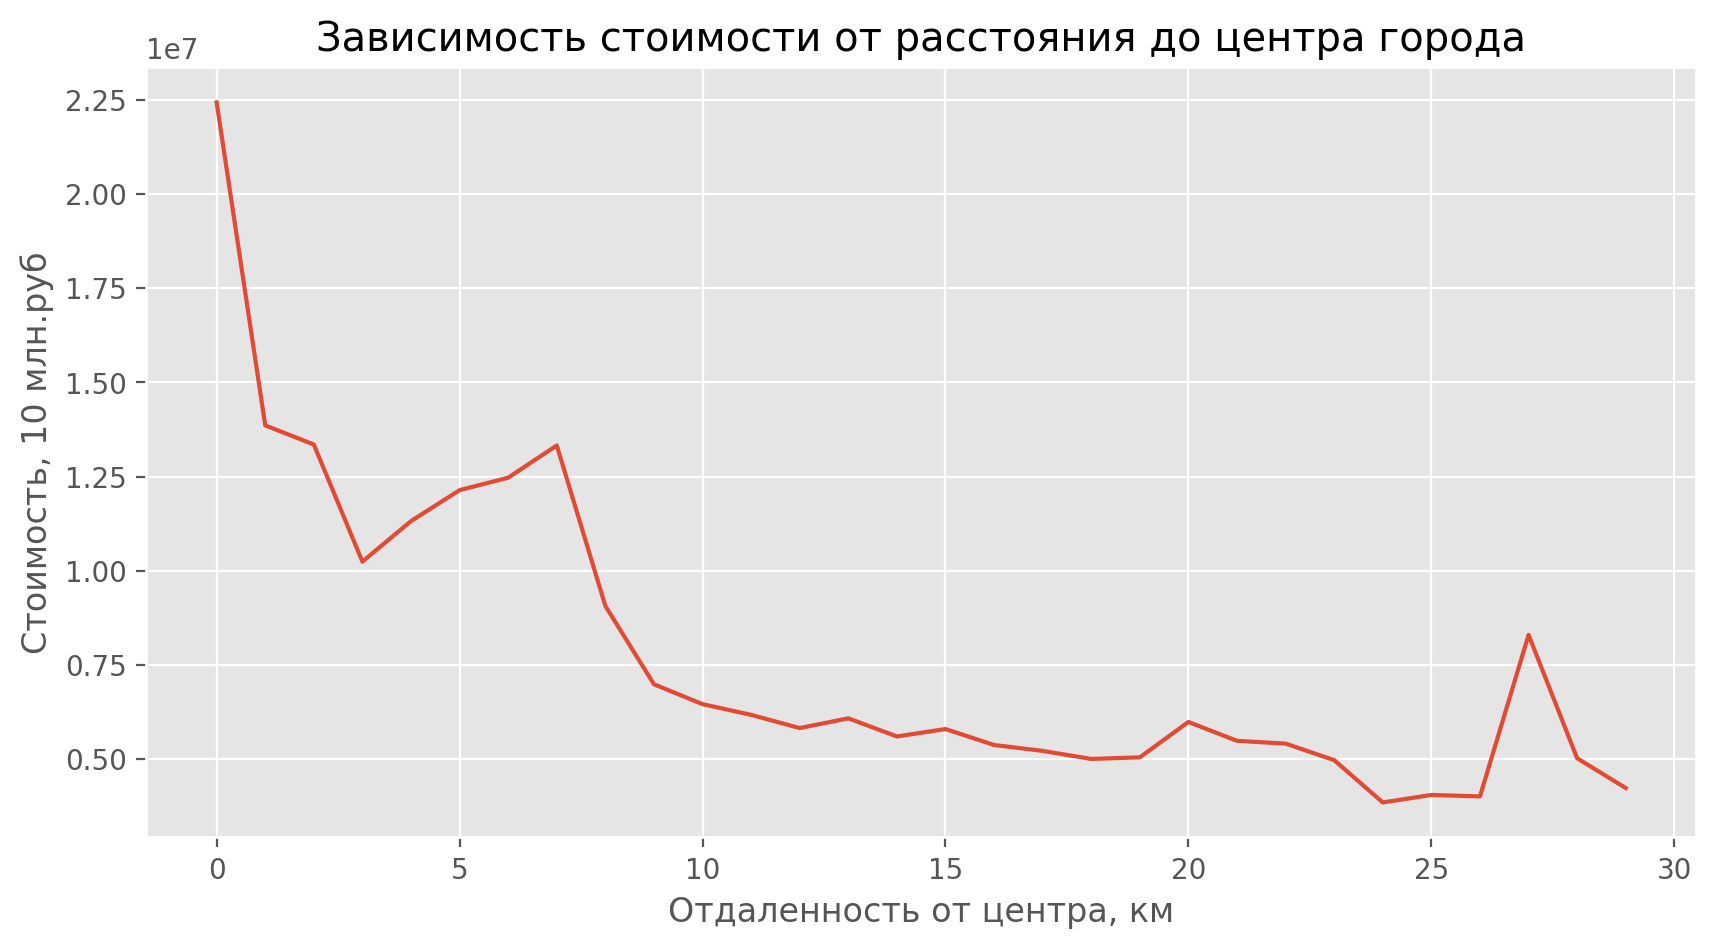

Коэффициент корреляции количеством комнат и ценой: -0.391


In [231]:
(
    data.query('locality_name == "санкт-петербург"')
    .pivot_table(
        index='city_centers_nearest_km',
        values='last_price',)
    .plot(kind='line',
          figsize=(10,5), 
          grid=True, 
          ylabel ='Стоимость, 10 млн.руб', 
          xlabel='Отдаленность от центра, км',
          title = 'Зависимость стоимости от расстояния до центра города',
         legend = False)
)
plt.show()
print('Коэффициент корреляции количеством комнат и ценой:', \
      data.query('locality_name == "санкт-петербург"')['city_centers_nearest_km']\
      .corr(data.query('locality_name == "санкт-петербург"')['last_price']).round(3))

Наблюдаем отрицательный процент корреляции **-0.391**

Неудивительно, что самая высокая средняя стоимость у объектов, находящихся в самом центре города: 22.5 млн.руб.
У объектов в радиусе 1-7 км от центра средняя стоимость колеблется от 10.5 до 14 млн.руб, стоимость более отдаленных объектов идет на убыль (за исключением некоторых пиков)

**Самые дорогие объекты в Санкт-Петербурге располагаются в центре  и в радиусе 3 км. от него**

## Общий вывод

После обработки данных от выбросов и аномальных значений число записей сократилось с 23 699 до 23 379.

Перед проведением исследовательского анализа данные были обработаны от нулевых и аномальных значений, изменены некорректные типы данных, обработаны дубликаты, расчитаны и внесены в таблицу новые необходимые значения (стоимость кв.м., типы этажа и др.). Устранены редкие значения и статистические выбросы

В исследовательском анализе участвовали объекты стоимостью от 0.43 до 75 млн.руб, общей площадью от 12 до 300 кв.м., опубликованные в период 2014-2019 г.



Проанализированы **основные параметры объектов:**

* *площадь* - медианные значения для расмматриваемых объектов: общая - 52 кв.м., жилая - 30 кв.м., кухни - 9.1 кв.м
* *стоимость* - медианная 4.6 млн.руб, средняя 6.07 млн.руб. Большинство объектов располагаются в диапазоне до 10 млн.руб
* чаще всего продаются квартиры с *одной или двумя комнатами*, чуть реже - трехкомнатные, большее число комнат встречается нечасто
* чаще всего объекты имеют *невысокий потолок*: 2.5-2.65 м
* объекты обычно расположены в *пятиэтажных и девятиэтажных домах*, в основном *не на первом и не на последнем этажах*
* порядка *17.8 тысяч объектов расположены в часе езды от центра и/или от аэропорта.* Обычно такие объекты расположены в 13км. от центра и 28 км. от аэропорта
* около 8 тысяч объектов имеют *парк на расстоянии менее часа ходьбы*, а 9 тысяч имеют *водоем в радиусе получаса ходьбы*.

**Скорость продажи квартиры** 

Самое позднее снятие объявлении с публикации - спустя 1580 дней.

Большинство объявлений снимается с публикации в течение 100 дней. **Обычно объекты продаются в течение 43-207 дней**. Чаще всего продажа происходит на **90-й день** с начала публикации
* **быстрые продажи** - до 43 дней
* **долгие продажи** - от 207 дней до двух лет
* **сверхдолгие продажи** - более двух лет

**Факторы, влияющие на стоимость объекта**

* Обнаружена **прямая зависимость стоимости от общего метража: больше квартира = выше цена**. Квартиры размером до 50 кв.м. практически не превышают стоимость до 10 млн.руб. Квартиры 50-100 кв.м. имеют размах цен уже до 20 млн.руб. Аномалии встречаются достаточно редко. Зависимость от размера жилой площади и площади кухни выражена уже слабее, все же **общая площадь играет бОльшую роль.**

* **Чем больше комнат, тем выше цена**. Прямая зависимость - однокомнатные квартиры в среднем стоят 3.8 млн.руб, трехкомнатные - 7.9 млн., шестикомнатные стоят уже порядка 20.7 млн. Медианные цены растут в схожих пропорциях

* Большое значение имеет **тип этажа**. Квартиры на *первом этаже стоят меньше всего* - средняя стоимость 4.6 млн.руб, квартиры  *на последнем этаже  чуть дороже* - 5.9 млн. Средняя стоимость объектов на других этажах - 6.3 млн.

* Выделяющейся зависимости от дня недели или месяца публикации нет. 

* В 2014 году отмечены *самые высокие средние и медианные значения стоимости*: 11.6 млн.руб и 7.6 млн.руб соответственно.  **2015 год характеризуется резким падением обоих показателей**: средняя цена составляет уже 7.3 млн.руб, медиана 5.2 млн. Такое падение определенно связано с тем, что резко упала средняя площадь продаваемых объектов. **Цена тесно связана с площадью, меньше средняя площадь - меньше средня стоимость**, отсюда и падение цен  вплоть до 2018 года. **В период с 2018 по 2019 средние значения площади начали расти**: неразрывно с этим фактом  повысилась и медианная стоимость (+0,5 млн. до 5млн.), и средняя (на 0,65 млн до 6,4 млн)


**Топ-10 городов**

Больше всего объявлений опубликовано в следующих городах и поселках:
* Санкт-Петербург           
* Пушкин                    
* деревня Кудрово            
* поселок Парголово         
* поселок Мурино            
* поселок Шушары            
* Колпино                    
* Гатчина                    
* Всеволожск                 
* Выборг 
Самая высокая цена за квадратный метр у Санкт-Петербурга: почти 113 тыс.руб. у замыкающего топ Выборга  среднняя цена составляет 58,2 тыс за кв.м.

Для Санкт-Петербурга имеет значение отдаленность объекта от центра города. **Самые дорогие объекты располагаются в центре** - средняя стоимость 22.5 млн, объекты в радиусе 3 км в среднем стоят 13-22 млн, более отдаленные от центра квартиры стоят дешевле.